In [316]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [317]:
### Direct to the correct folder
path = 'D:/files/second_part/OLST_gait_csv_dataset'
filenames = os.listdir(path)   ### List the files name in the folder
sub_id = []                    ### Initialize the subject name list
value_list = []               ### Initialzie the value list

### Organize the information into different list and then integrate them together as a dataframe
for sub in filenames:
    curr_file = path + '/' + sub
    curr_csv = pd.read_csv(curr_file)
    value = list(curr_csv.loc[0])
    value_list.append(value)
    ID = str(curr_csv["sub_ID"][0]) ### -25: sub0?, -4: remove .csv
    sub_id.append(ID)
            
print("Current subject number: " + str(len(sub_id)) + '\n' + "Current features number: " + str(len(value)))

Current subject number: 241
Current features number: 71


In [318]:
### Create the correct columns name
col_names = list(curr_csv.columns)
all_col_names = ["sub_ID"] + col_names

In [319]:
### Create the correct metrix which is going to be convert to dataframe
all_list = []
for i in range(len(sub_id)):
    v = [(sub_id[i])] + value_list[i]
    all_list.append(v)

In [320]:
raw_df = pd.DataFrame(all_list, columns = all_col_names)
df = raw_df.iloc[:, 1:]

In [321]:
df["std_AP_aCOM"]

0      15753.7887
1      15405.7225
2      18458.2494
3      14452.1384
4      19492.3621
          ...    
236    21901.3358
237    52978.7351
238    22462.4068
239    13663.9470
240    32651.2594
Name: std_AP_aCOM, Length: 241, dtype: float64

## Checking dataset quality

* balance between group
* data type
* abnormal value because of the extraction from matlab 
* missing data
* outlier

In [322]:
print("In total " + str(df.shape[0]) + " steps")

In total 241 steps


In [323]:
df.groupby("target_performance").size()

target_performance
Bad          60
Good         75
Moderate    106
dtype: int64

In [324]:
for i in df.columns:
    if df[i].dtypes != "float64":
        print(i)

sub_ID
target_performance


In [325]:
df.describe().loc[["count", "mean", "std", "min", "max"],:]

std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
count  241.000000  241.000000        241.000000  241.000000  241.000000   
mean   191.940334    7.950631         10.710407  658.352802   28.229588   
std     16.421939    2.399667          1.767050   55.833645    8.080024   
min     49.546300    1.821500          6.167600  161.692600    5.937000   
max    246.591100   15.556100         17.535200  771.332200   51.564700   

       std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  max_ML_vCOM  \
count   241.000000   241.000000         241.000000   241.000000   241.000000   
mean    155.704841   191.838824         283.638323  2834.773766   355.563889   
std      35.961543    39.824085          63.883264   721.924845   115.172403   
min      60.500000   108.392600         180.601800  2102.406800   136.532900   
max     338.630300   369.267500         687.732100  7417.206800   833.812300   

       ...   min_AP_MOS  min_ML_MOS  ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  \
count  ...   241.000000  241.000000  241.000000  241.000000  235.000000   
mean   ...  -834.084782 -111.859429  541.934929  203.350565    0.426969   
std    ...   261.397241   32.968954  185.871811   44.288123    4.606883   
min    ... -1352.157000 -206.883500  186.108000   40.482400  -17.844900   
max    ...  -249.983700  -40.527300  860.777400  330.007700   31.740700   

       mean_ML_IA  std_AP_IA   std_ML_IA   ROM_AP_IA   ROM_ML_IA  
count  235.000000  235.00000  235.000000  235.000000  235.000000  
mean     0.009118    6.37190    1.663597   22.350528    6.781907  
std      3.154659    1.64898    0.769126    5.833247    3.043513  
min     -5.999000    0.00000    0.000000    0.000000    0.000000  
max      5.038600   11.92860    4.269200   38.868700   12.152100  

[5 rows x 69 columns]

In [326]:
df_without_na = df.copy()
for ID in df["sub_ID"].unique():
    grouped_df = df[df["sub_ID"] == ID]
    for col in grouped_df.columns:
        if grouped_df[col].isna().sum() != 0:
            mean = grouped_df[col].mean()
            df_without_na[df_without_na["sub_ID"] == ID] = grouped_df.fillna(mean)
print("Amount of nan in original table: " + str(df.isna().sum().sum()) + '\n' + "Amount of nan in current table: " + str(df_without_na.isna().sum().sum()))

Amount of nan in original table: 45
Amount of nan in current table: 0


In [327]:
df_without_na[round(df_without_na["std_AP_IA"]) == 0]

sub_ID  std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
12   sub01    192.7737     11.3547           10.8412    669.0143     38.9124   
51   sub03    195.5117      6.3226            8.9094    673.4834     21.0463   
130  sub10    188.5324     10.3879           12.2170    645.5730     36.1531   

     std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  ...  \
12      156.5735     176.4051           260.4909    2371.8551  ...   
51      128.5840     191.4749           259.1066    3230.8186  ...   
130     147.1112     219.2942           317.0306    3032.9412  ...   

     min_ML_MOS  ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  mean_ML_IA  std_AP_IA  \
12    -126.5829    711.4867    218.8189     10.8782      2.1931    0.48630   
51    -120.8830    532.1478    229.1337      4.9853      1.9516    0.44033   
130   -206.8835    652.7928    292.8243     11.7818      1.3630    0.00000   

     std_ML_IA  ROM_AP_IA  ROM_ML_IA  target_performance  
12     1.61410    2.21770    5.18880                Good  
51     0.20345    0.62273    0.28772                 Bad  
130    0.00000    0.00000    0.00000            Moderate  

[3 rows x 71 columns]

In [328]:
df_without_na[round(df_without_na["std_AP_IA"]) == 0]

sub_ID  std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
12   sub01    192.7737     11.3547           10.8412    669.0143     38.9124   
51   sub03    195.5117      6.3226            8.9094    673.4834     21.0463   
130  sub10    188.5324     10.3879           12.2170    645.5730     36.1531   

     std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  ...  \
12      156.5735     176.4051           260.4909    2371.8551  ...   
51      128.5840     191.4749           259.1066    3230.8186  ...   
130     147.1112     219.2942           317.0306    3032.9412  ...   

     min_ML_MOS  ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  mean_ML_IA  std_AP_IA  \
12    -126.5829    711.4867    218.8189     10.8782      2.1931    0.48630   
51    -120.8830    532.1478    229.1337      4.9853      1.9516    0.44033   
130   -206.8835    652.7928    292.8243     11.7818      1.3630    0.00000   

     std_ML_IA  ROM_AP_IA  ROM_ML_IA  target_performance  
12     1.61410    2.21770    5.18880                Good  
51     0.20345    0.62273    0.28772                 Bad  
130    0.00000    0.00000    0.00000            Moderate  

[3 rows x 71 columns]

In [329]:
df_without_outlier = df_without_na.drop(130, axis = 0)

In [330]:
std_vretical_xCOM_outlier_inx = df_without_na[(df_without_na["std_vretical_xCOM"]) > 5].index

df_without_outlier = df_without_na.drop(std_vretical_xCOM_outlier_inx, axis = 0)

In [331]:
df_without_outlier.describe().loc[["count", "mean", "std", "min", "max"],:]

std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
count  241.000000  241.000000        241.000000  241.000000  241.000000   
mean   191.940334    7.950631         10.710407  658.352802   28.229588   
std     16.421939    2.399667          1.767050   55.833645    8.080024   
min     49.546300    1.821500          6.167600  161.692600    5.937000   
max    246.591100   15.556100         17.535200  771.332200   51.564700   

       std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  max_ML_vCOM  \
count   241.000000   241.000000         241.000000   241.000000   241.000000   
mean    155.704841   191.838824         283.638323  2834.773766   355.563889   
std      35.961543    39.824085          63.883264   721.924845   115.172403   
min      60.500000   108.392600         180.601800  2102.406800   136.532900   
max     338.630300   369.267500         687.732100  7417.206800   833.812300   

       ...   min_AP_MOS  min_ML_MOS  ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  \
count  ...   241.000000  241.000000  241.000000  241.000000  241.000000   
mean   ...  -834.084782 -111.859429  541.934929  203.350565    0.580403   
std    ...   261.397241   32.968954  185.871811   44.288123    4.653882   
min    ... -1352.157000 -206.883500  186.108000   40.482400  -17.844900   
max    ...  -249.983700  -40.527300  860.777400  330.007700   31.740700   

       mean_ML_IA   std_AP_IA   std_ML_IA   ROM_AP_IA   ROM_ML_IA  
count  241.000000  241.000000  241.000000  241.000000  241.000000  
mean     0.172955    6.377328    1.786243   21.958147    6.777127  
std      3.286140    1.640806    1.099227    6.266687    3.012014  
min     -5.999000    0.000000    0.000000    0.000000    0.000000  
max      8.143719   11.928600    8.143719   38.868700   12.152100  

[5 rows x 69 columns]

In [332]:
df_without_outlier.head()

sub_ID  std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
0  sub01    222.0303     11.5551           13.2731    771.3322     41.2216   
1  sub01    216.8333      7.2496           12.2758    752.0835     26.3500   
2  sub01    213.8804      9.8786           11.8177    742.0267     35.2855   
3  sub01    215.0370      9.1052           13.4473    746.7915     33.7573   
4  sub01    219.4860      9.5536           12.3955    760.9980     33.6603   

   std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  ...  min_ML_MOS  \
0     152.2738     203.8720           294.1876    2587.0779  ...    -96.3895   
1     159.7622     191.2233           278.3887    2509.5189  ...    -98.2740   
2     160.9655     179.6173           257.9273    2324.6588  ...   -123.0453   
3     133.3705     222.2879           338.7492    3262.7174  ...   -118.8073   
4     177.4913     171.9744           308.4665    3399.5510  ...   -121.5907   

   ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  mean_ML_IA  std_AP_IA  std_ML_IA  \
0    570.2679    209.1615    -0.54091      4.0367     7.7195     1.8989   
1    364.0124    209.7202    -0.75006     -4.0370     7.6126     2.0575   
2    780.4818    212.4239    17.52730     -5.9990     2.4649     1.1439   
3    392.3153    245.2896    -1.18750      3.7987     6.9206     1.8781   
4    820.4689    221.1380    -0.32082     -3.9979     7.8221     1.9359   

   ROM_AP_IA  ROM_ML_IA  target_performance  
0    27.3466    10.9849                Good  
1    27.0974    10.2275                Good  
2     7.6002     3.8675                Good  
3    24.8303    10.5839                Good  
4    28.0002     9.8822                Good  

[5 rows x 71 columns]

In [333]:
df_without_outlier.columns

Index(['sub_ID', 'std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
       'std_AP_aCOM', 'std_ML_aCOM', 'std_vretical_aCOM', 'max_AP_aCOM',
       'max_ML_aCOM', 'ROM_AP_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance',
       'std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 'std_AP_vCOP',
       'std_ML_vCOP', 'max_AP_vCOP', 'max_ML_vCOP', 'ROM_AP_vCOP',
       'ROM_ML_vCOP', 'std_AP_aCOP', 'std_ML_aCOP', 'max_AP_aCOP',
       'max_ML_aCOP', 'ROM_AP_aCOP', 'ROM_ML_aCOP', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',

In [334]:
from sklearn import preprocessing
normalized_df = pd.DataFrame()
for col in df_without_outlier.columns[:]:
    try:
        normalized_df[col] = preprocessing.normalize(np.array(df_without_outlier[col]).reshape(1, -1))[0]
    except:
        normalized_df[col] = df_without_outlier[col]

In [335]:
#normalized_df

In [336]:
all_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
       'std_AP_aCOM', 'std_ML_aCOM', 'std_vretical_aCOM', 'max_AP_aCOM',
       'max_ML_aCOM', 'ROM_AP_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance',
       'std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 'std_AP_vCOP',
       'std_ML_vCOP', 'max_AP_vCOP', 'max_ML_vCOP', 'ROM_AP_vCOP',
       'ROM_ML_vCOP', 'std_AP_aCOP', 'std_ML_aCOP', 'max_AP_aCOP',
       'max_ML_aCOP', 'ROM_AP_aCOP', 'ROM_ML_aCOP', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',
       'max_AP_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_AP_MOS',
       'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'ROM_AP_IA', 'ROM_ML_IA', 'target_performance']]
spatiotemporal_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
       'std_AP_aCOM', 'std_ML_aCOM', 'std_vretical_aCOM', 'max_AP_aCOM',
       'max_ML_aCOM', 'ROM_AP_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance', 'target_performance'
       ]]
COP_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 'std_AP_vCOP',
       'std_ML_vCOP', 'max_AP_vCOP', 'max_ML_vCOP', 'ROM_AP_vCOP',
       'ROM_ML_vCOP', 'std_AP_aCOP', 'std_ML_aCOP', 'max_AP_aCOP',
       'max_ML_aCOP', 'ROM_AP_aCOP', 'ROM_ML_aCOP', 'target_performance'
       ]]
advanced_df = df_without_outlier[['std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',
       'max_AP_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_AP_MOS',
       'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'ROM_AP_IA', 'ROM_ML_IA', 'target_performance'
       ]]

In [337]:
#x = spatiotemporal_df[spatiotemporal_df["std_AP_aCOM"] < 60000]["std_AP_aCOM"]
#x.hist()

In [338]:
#fig = plt.figure(figsize = (15,25))
#ax = fig.gca()
#spatiotemporal_df.hist(ax = ax)

In [339]:
#fig = plt.figure(figsize = (15,25))
#ax = fig.gca()
#COP_df.hist(ax = ax)

In [340]:
#fig = plt.figure(figsize = (15,25))
#ax = fig.gca()
#advanced_df.hist(ax = ax)

In [341]:
#fig = plt.figure(figsize = (15,25))
#ax = fig.gca()
#spatiotemporal_clear_df.hist(ax = ax)

In [342]:
all_clear_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
        'std_ML_aCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance', 'std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 
       'std_ML_vCOP', 'max_ML_vCOP', 'ROM_ML_vCOP', 'std_ML_aCOP', 'max_ML_aCOP', 'ROM_AP_aCOP','std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',
       'max_AP_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_AP_MOS',
       'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'ROM_AP_IA', 'ROM_ML_IA','target_performance']]
spatiotemporal_clear_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
        'std_ML_aCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance', 'target_performance'
       ]]
COP_clear_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 
       'std_ML_vCOP', 'max_ML_vCOP', 'ROM_ML_vCOP', 'std_ML_aCOP', 'max_ML_aCOP', 'ROM_AP_aCOP', 'target_performance'
       ]]
advanced_clear_df = df_without_outlier[['std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',
       'max_AP_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_AP_MOS',
       'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'ROM_AP_IA', 'ROM_ML_IA', 'target_performance'
       ]]

## Statistical analysis

In [343]:
corr_df = spatiotemporal_df.corr()
high_corr_df = corr_df[corr_df > 0.8].fillna(0)
mid_corr_df_1 = corr_df[corr_df < 0.8]
mid_corr_df = mid_corr_df_1[corr_df > 0.5].fillna(0)
low_corr_df = corr_df[corr_df < 0.5].fillna(0)

Text(0.5, 1.0, 'high correlation variable')

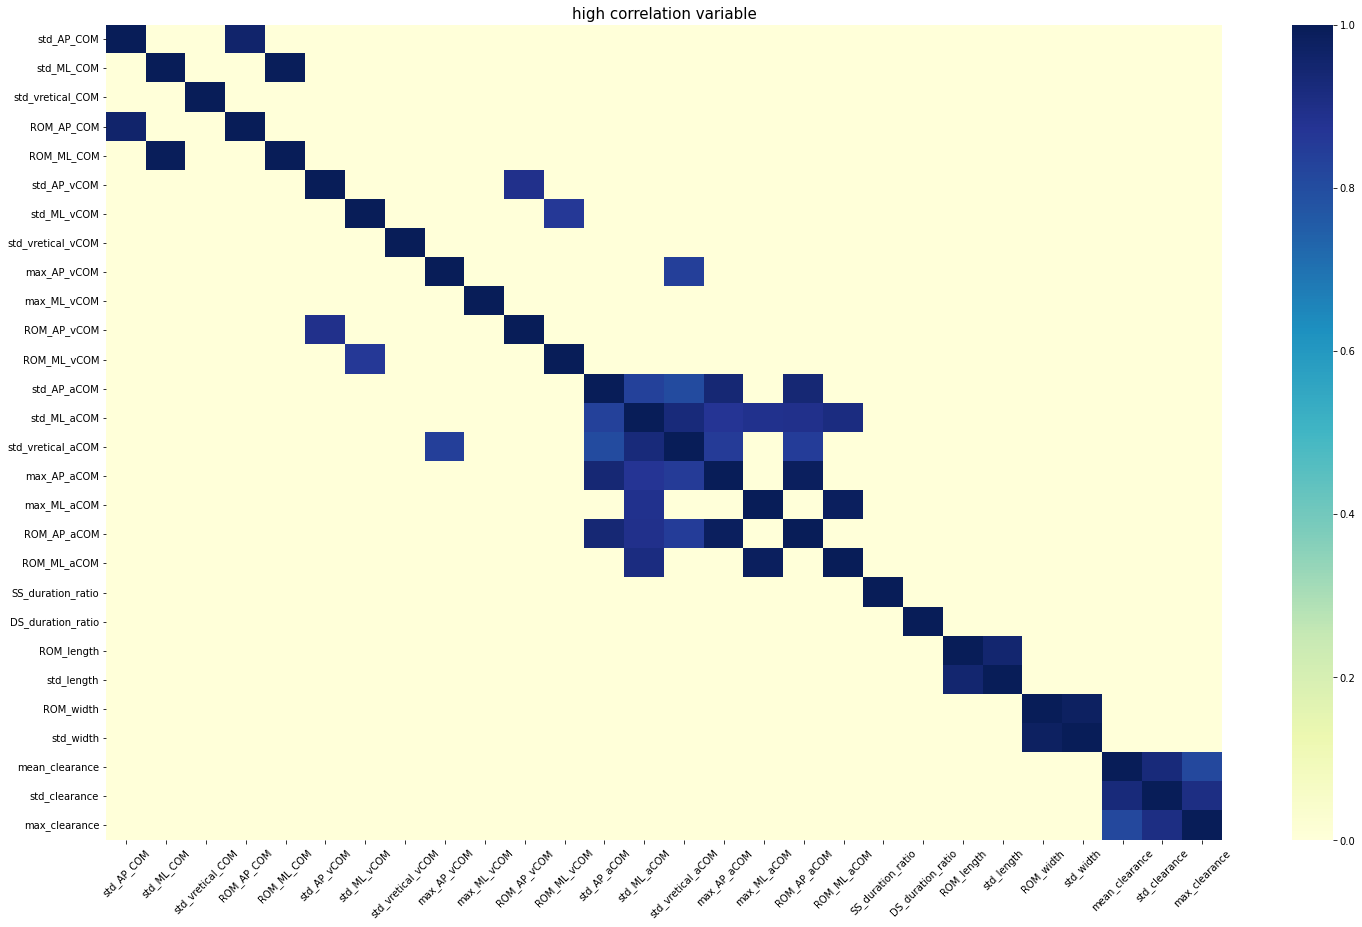

In [344]:
import seaborn as sns

fig = plt.figure(figsize = (25,15))
sns.heatmap(high_corr_df, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.title('high correlation variable', fontsize = 15)

In [345]:
corr_df = COP_clear_df.corr()
high_corr_df = corr_df[corr_df > 0.9].fillna(0)
mid_corr_df_1 = corr_df[corr_df < 0.9]
mid_corr_df = mid_corr_df_1[corr_df > 0.5].fillna(0)
low_corr_df = corr_df[corr_df < 0.5].fillna(0)

Text(0.5, 1.0, 'high correlation variable')

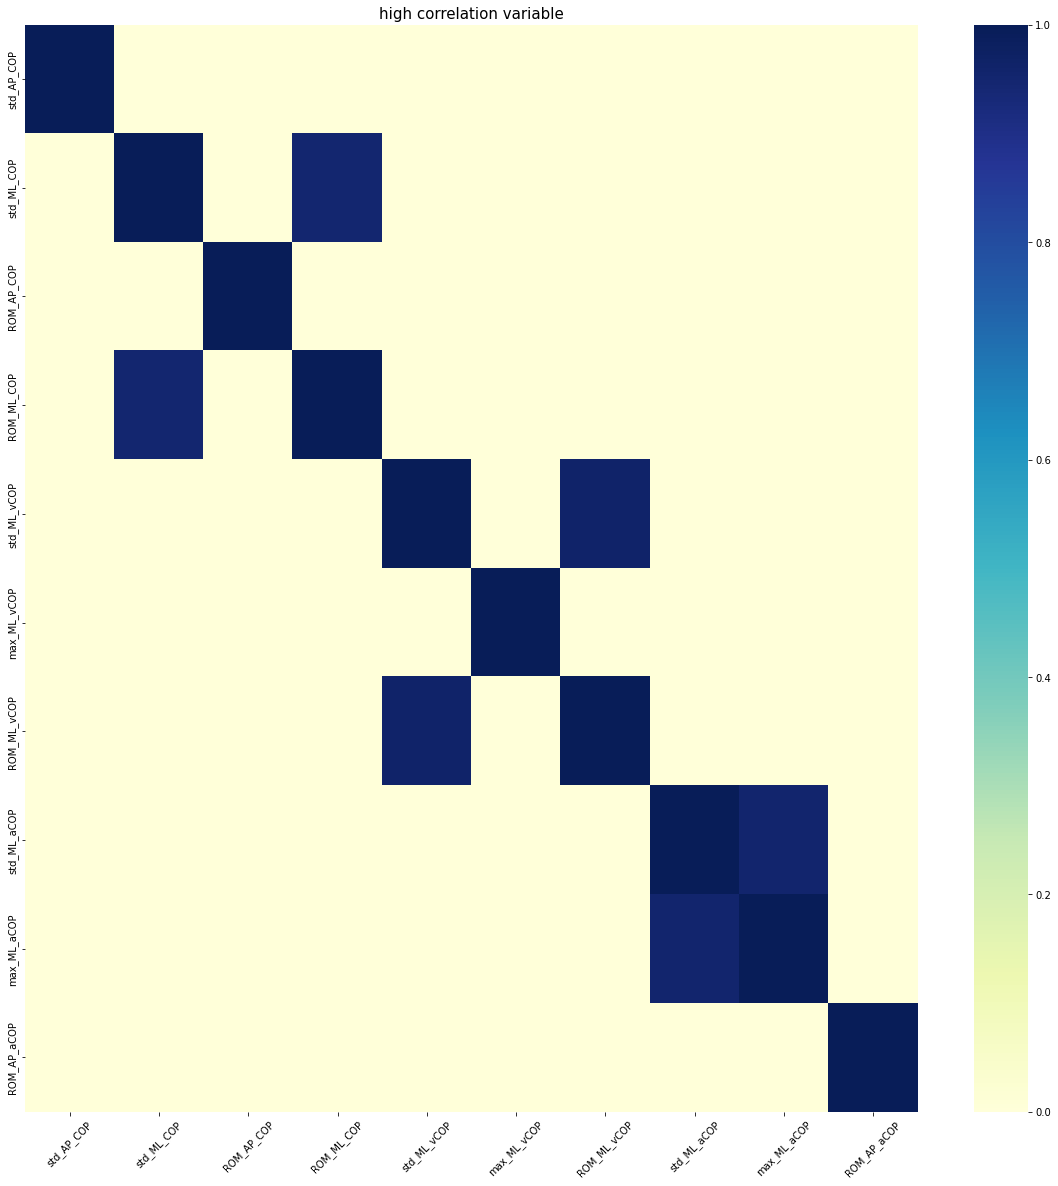

In [346]:
import seaborn as sns

fig = plt.figure(figsize = (20,20))
sns.heatmap(high_corr_df, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.title('high correlation variable', fontsize = 15)

In [347]:
corr_df = advanced_clear_df.corr()
high_corr_df = corr_df[corr_df > 0.9].fillna(0)
mid_corr_df_1 = corr_df[corr_df < 0.9]
mid_corr_df = mid_corr_df_1[corr_df > 0.5].fillna(0)
low_corr_df = corr_df[corr_df < 0.5].fillna(0)

Text(0.5, 1.0, 'high correlation variable')

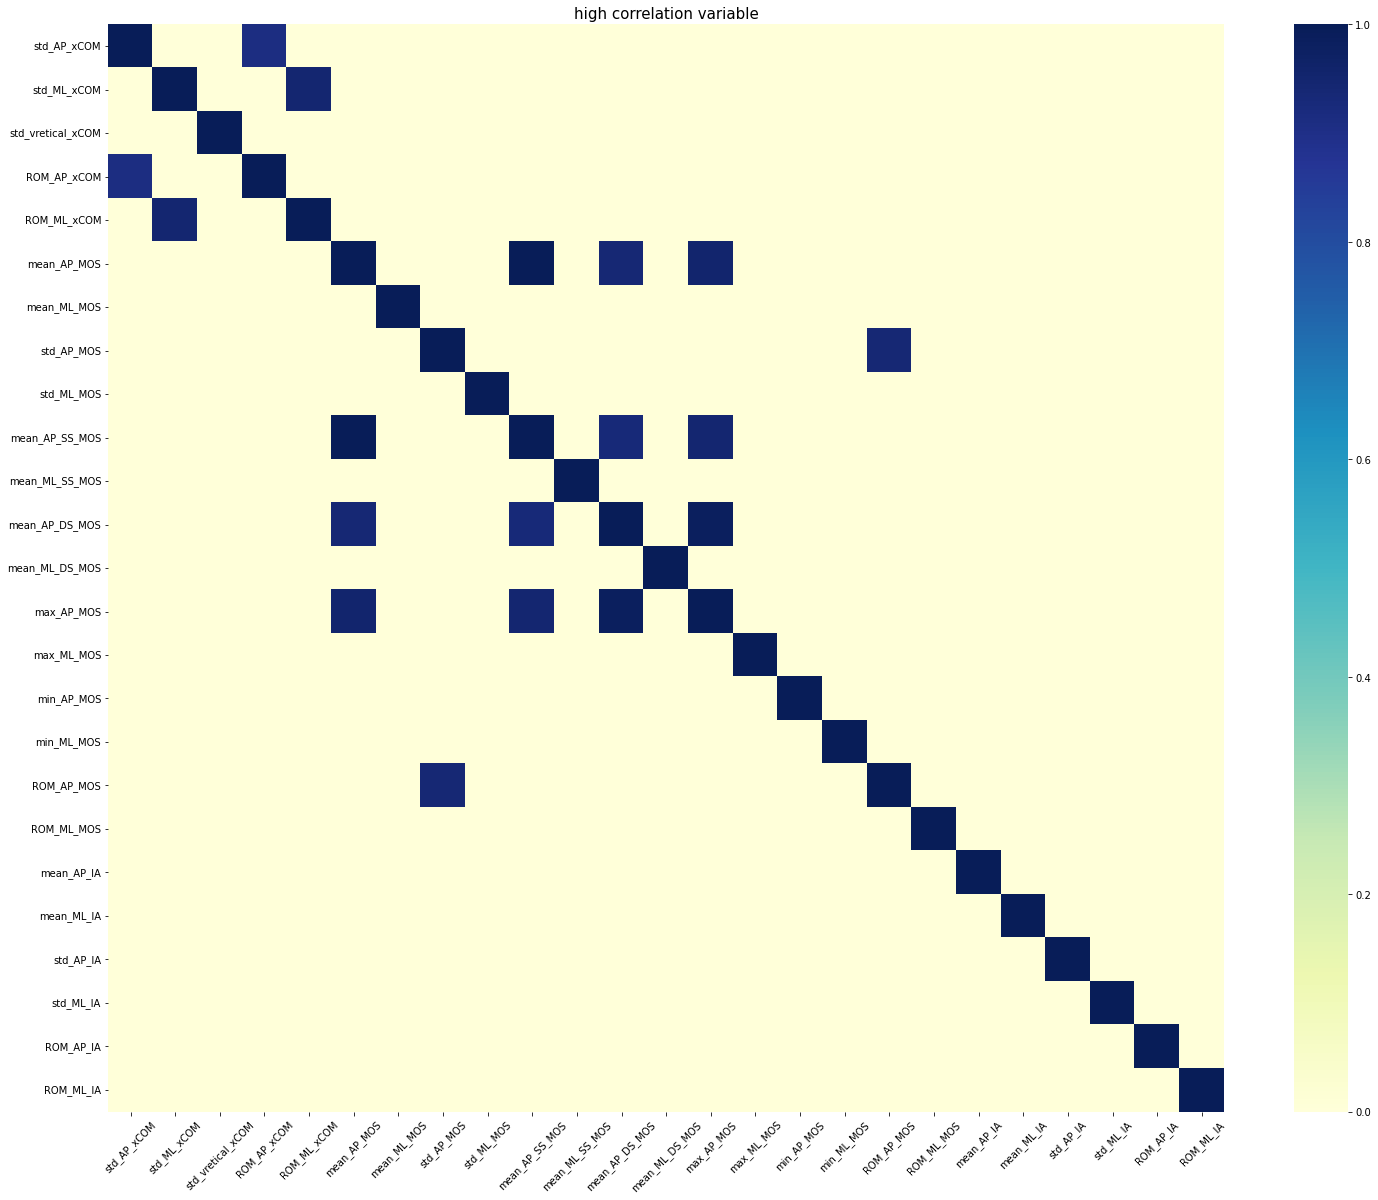

In [348]:
import seaborn as sns

fig = plt.figure(figsize = (25,20))
sns.heatmap(high_corr_df, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.title('high correlation variable', fontsize = 15)

In [349]:
all_clear_corr_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'std_AP_xCOM', 'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA','target_performance']]

spatiotemporal_clear_corr_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'target_performance'
       ]]

COP_clear_corr_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'target_performance'
       ]]

advanced_clear_corr_df = df_without_outlier[['std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'target_performance'
       ]]
spa_cop_corr_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP','target_performance'
       ]]
spa_adv_corr_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA', 'target_performance'
       ]]
cop_adv_corr_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA','target_performance'
       ]]
kinematic_corr_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'std_AP_xCOM', 'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS','target_performance']]
non_kinematic_corr_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'std_AP_xCOM', 'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'target_performance'
       ]]

Text(0.5, 1.0, 'high correlation variable')

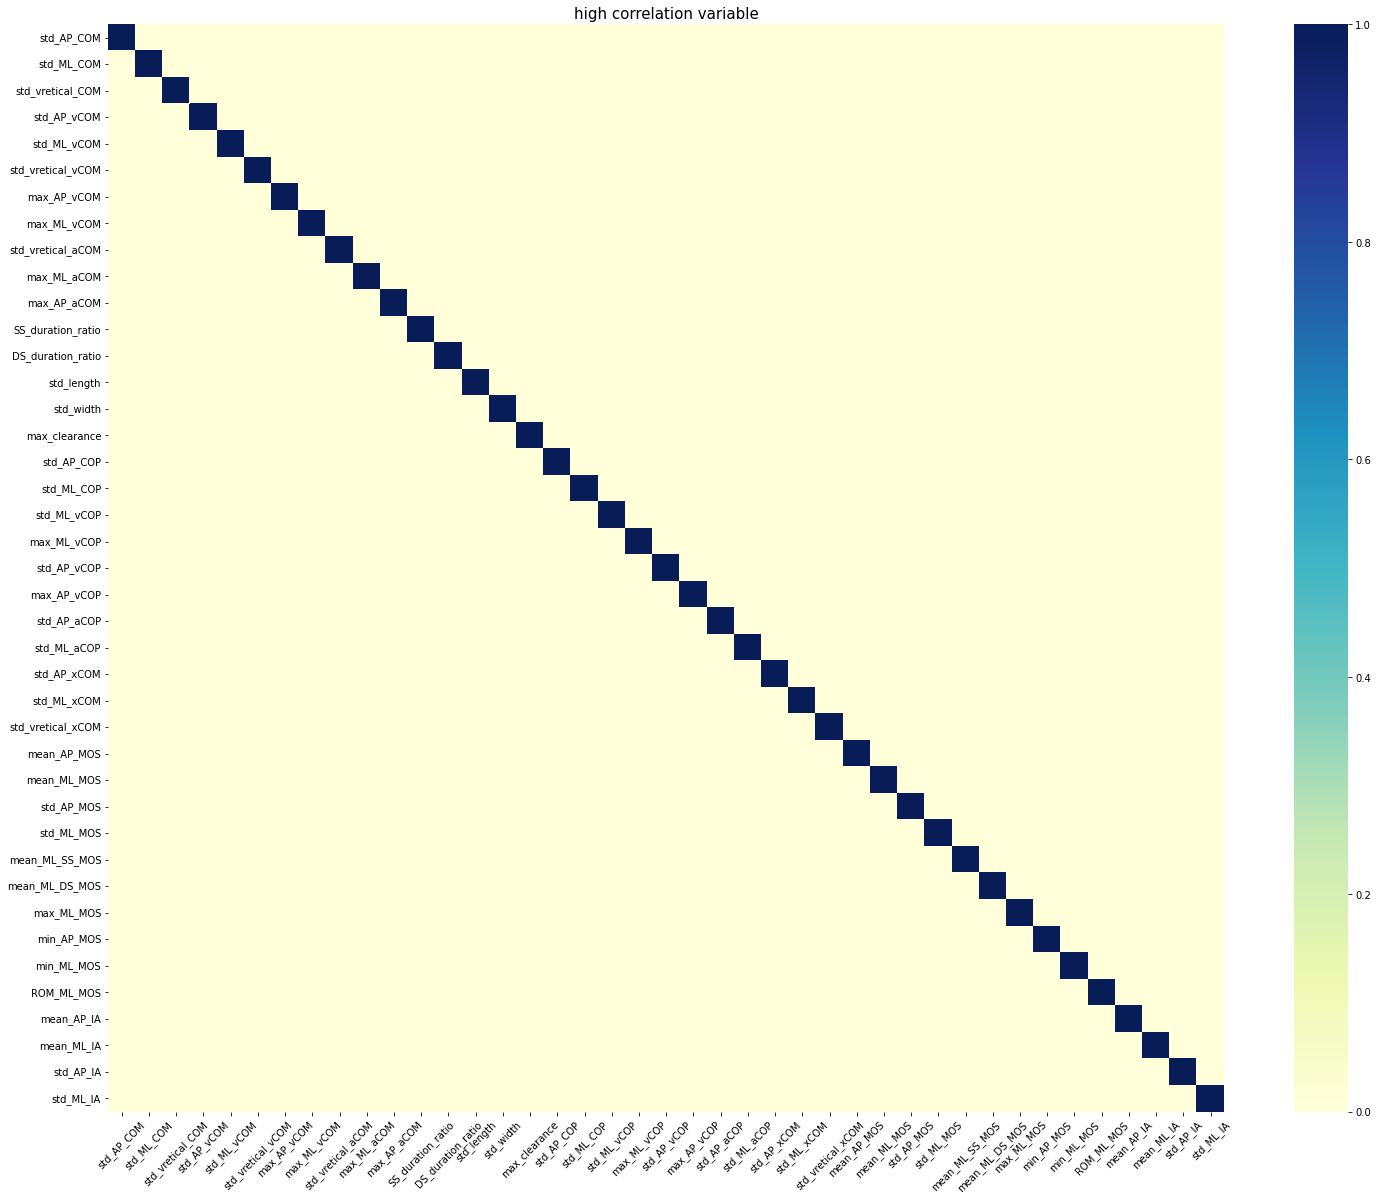

In [350]:
corr_df = all_clear_corr_df.corr()
high_corr_df = corr_df[corr_df > 0.9].fillna(0)
mid_corr_df_1 = corr_df[corr_df < 0.9]
mid_corr_df = mid_corr_df_1[corr_df > 0.5].fillna(0)
low_corr_df = corr_df[corr_df < 0.5].fillna(0)

fig = plt.figure(figsize = (25,20))
sns.heatmap(high_corr_df, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.title('high correlation variable', fontsize = 15)

C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<AxesSubplot:title={'center':'std_AP_COM'}>,
        <AxesSubplot:title={'center':'std_ML_COM'}>,
        <AxesSubplot:title={'center':'std_vretical_COM'}>,
        <AxesSubplot:title={'center':'std_AP_vCOM'}>],
       [<AxesSubplot:title={'center':'std_ML_vCOM'}>,
        <AxesSubplot:title={'center':'std_vretical_vCOM'}>,
        <AxesSubplot:title={'center':'max_AP_vCOM'}>,
        <AxesSubplot:title={'center':'max_ML_vCOM'}>],
       [<AxesSubplot:title={'center':'std_vretical_aCOM'}>,
        <AxesSubplot:title={'center':'max_ML_aCOM'}>,
        <AxesSubplot:title={'center':'max_AP_aCOM'}>,
        <AxesSubplot:title={'center':'SS_duration_ratio'}>],
       [<AxesSubplot:title={'center':'DS_duration_ratio'}>,
        <AxesSubplot:title={'center':'std_length'}>,
        <AxesSubplot:title={'center':'std_width'}>,
        <AxesSubplot:title={'center':'max_clearance'}>]], dtype=object)

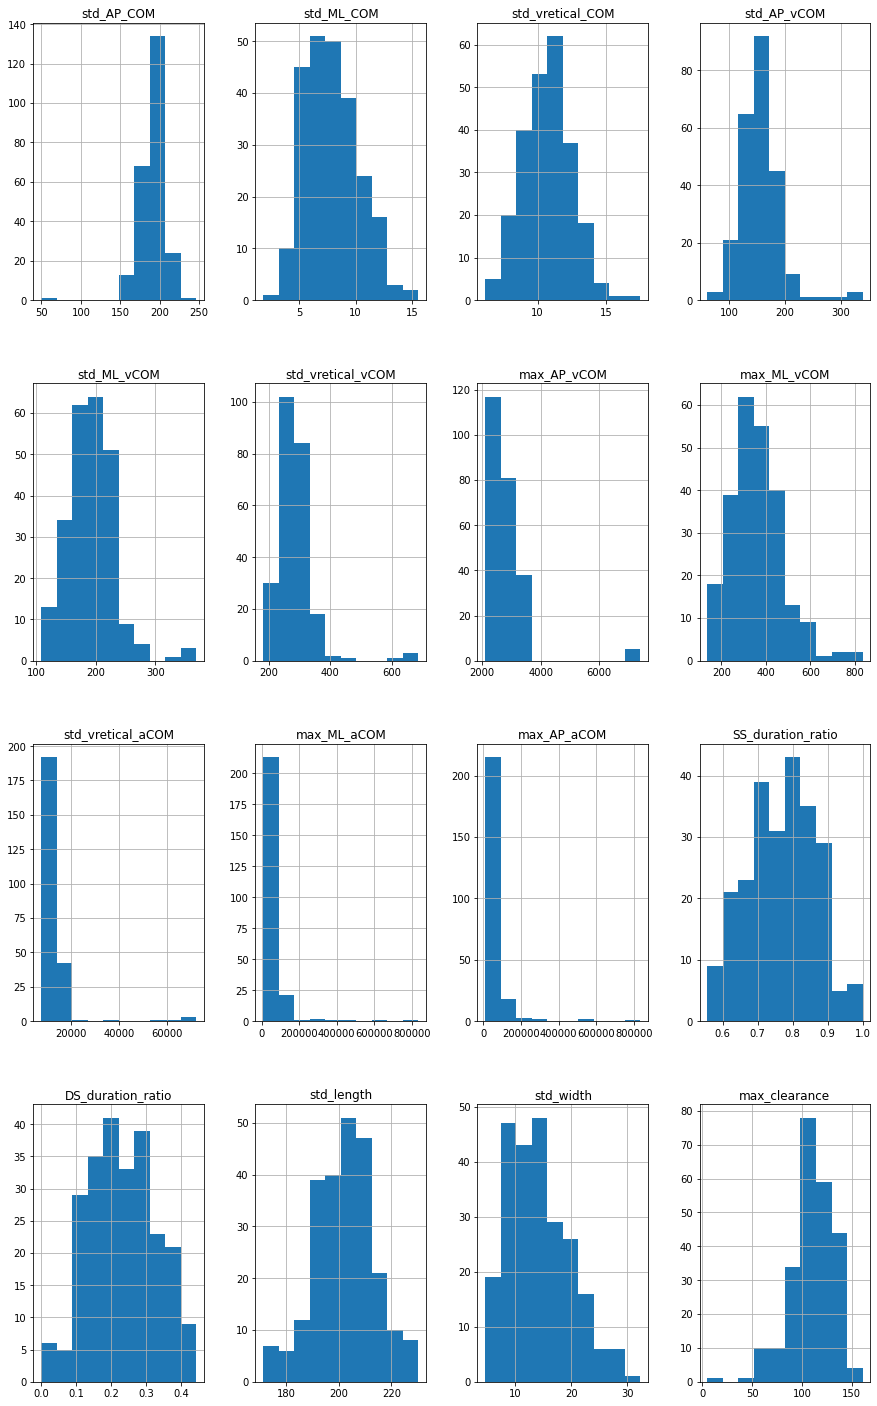

In [351]:
fig = plt.figure(figsize = (15,25))
ax = fig.gca()
spatiotemporal_clear_corr_df.hist(ax = ax)

In [352]:
spatiotemporal_clear_corr_df.groupby("target_performance").describe().SS_duration_ratio

count      mean       std      min       25%       50%  \
target_performance                                                           
Bad                  60.0  0.795021  0.090203  0.64706  0.725618  0.777295   
Good                 75.0  0.756755  0.095380  0.57895  0.666670  0.769910   
Moderate            106.0  0.760111  0.099306  0.55556  0.685573  0.772810   

                         75%      max  
target_performance                     
Bad                 0.854908  1.00000  
Good                0.827255  0.97030  
Moderate            0.837770  0.94444

## Data processing

In [353]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [354]:
scaler = StandardScaler()
desired_dataset = all_clear_corr_df

In [355]:
input_df = desired_dataset.iloc[:,0:-1]
target_df = desired_dataset["target_performance"]

In [356]:
inputs = scaler.fit_transform(input_df)
targets = np.array(target_df)

In [357]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=42)

In [358]:
x_train.shape

(168, 41)

In [359]:
[uni_name, count] = np.unique(y_train, return_counts=True)
print("Training dataset: " + "\n" + uni_name[0] + " "  + str(count[0]) + "\n" + uni_name[1] + " "  + str(count[1]) + "\n" + uni_name[2] + " "  + str(count[2]) )

Training dataset: 
Bad 43
Good 54
Moderate 71


In [360]:
[uni_name, count] = np.unique(y_test, return_counts=True)
print("Testing dataset: " + "\n" + uni_name[0] + " "  + str(count[0]) + "\n" + uni_name[1] + " "  + str(count[1]) + "\n" + uni_name[2] + " "  + str(count[2]) )

Testing dataset: 
Bad 17
Good 21
Moderate 35


In [361]:
a = ['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'std_AP_xCOM', 'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA','target_performance']
spa_para = list(range(0, 16))
cop_para = list(range(16, 24))
advanced = list(range(24, 41))
spa_cop = spa_para + cop_para
spa_adv = spa_para + advanced
cop_adv = cop_para + advanced
kine_para = spa_para + list(range(24,37))
non_kine_para = cop_para + list(range(37,41))

In [362]:
input_df.columns[37:41]

Index(['mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA'], dtype='object')

In [363]:
all_input_df = input_df
all_input_df.columns = ['std_AP_COM', 'std_ML_COM', 'std_vertical_COM', 'std_AP_vCOM',
       'std_ML_vCOM', 'std_vertical_vCOM', 'max_AP_vCOM', 'max_ML_vCOM',
       'std_vertical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance',
       'std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP',
       'max_AP_vCOP', 'std_AP_aCOP', 'std_ML_aCOP', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vertical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS',
       'std_AP_MOS', 'std_ML_MOS', 'mean_ML_SS_MOS', 'mean_ML_DS_MOS',
       'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA',
       'mean_ML_IA', 'std_AP_IA', 'std_ML_IA']
spa_input_df = input_df.iloc[:,spa_para]
cop_input_df = input_df.iloc[:,cop_para]
adv_input_df = input_df.iloc[:,advanced]
spa_cop_input_df = input_df.iloc[:,spa_cop]
spa_adv_input_df = input_df.iloc[:,spa_adv]
cop_adv_input_df = input_df.iloc[:,cop_adv]
kine_input_df = input_df.iloc[:,kine_para]
non_kine_input_df = input_df.iloc[:,non_kine_para]

all_x_train = x_train
spa_x_train = x_train[:,spa_para]
cop_x_train = x_train[:,cop_para]
adv_x_train = x_train[:,advanced]
spa_cop_x_train = x_train[:,spa_cop]
spa_adv_x_train = x_train[:,spa_adv]
cop_adv_x_train = x_train[:,cop_adv]
kine_x_train = x_train[:,kine_para]
non_kine_x_train = x_train[:,non_kine_para]

all_x_test = x_test
spa_x_test = x_test[:,spa_para]
cop_x_test = x_test[:,cop_para]
adv_x_test = x_test[:,advanced]
spa_cop_x_test = x_test[:,spa_cop]
spa_adv_x_test = x_test[:,spa_adv]
cop_adv_x_test = x_test[:,cop_adv]
kine_x_test = x_test[:,kine_para]
non_kine_x_test = x_test[:,non_kine_para]

In [364]:
cop_adv_x_train.shape

(168, 25)

## Model training

In [365]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

SVC_reg = SVC()
DT_reg = DecisionTreeClassifier()
Log_reg = LogisticRegression()
RF_reg = RandomForestClassifier()

In [366]:
from sklearn.model_selection import GridSearchCV

SVC_para = {
    "C":[1,1.2,2,2.5,3],
    "kernel":['linear', 'poly', 'rbf', 'sigmoid'],
    "degree":[2,3,4,5],
    "probability":[True]
}

DT_para = {
    "criterion": ["gini", "entropy"],
    'max_depth': [1,2,3,4,5], 
    'max_leaf_nodes': [8,9,10,15]
}

Log_para = {
    "penalty": ['l2', 'none'],
    "C":[1,1.2,2,2.5,3],
    "max_iter":[200, 300, 400],
    "solver":['lbfgs']
}

RF_para = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [1,2,3], 
    'max_leaf_nodes': [8,9,10,15], 
    'n_estimators': [ 100, 200, 300]
}


### All features

In [367]:
all_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
all_SVC_grid_search.fit(all_x_train, y_train.ravel())
all_SVC_grid_search.best_params_

{'C': 2.5, 'degree': 2, 'kernel': 'linear', 'probability': True}

In [368]:
all_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
all_DT_grid_search.fit(all_x_train, y_train)
all_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 10}

In [369]:
all_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
all_RF_grid_search.fit(all_x_train, y_train)
all_RF_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 15,
 'n_estimators': 100}

In [370]:
all_SVC_best_reg = all_SVC_grid_search.best_estimator_
all_DT_best_reg = all_DT_grid_search.best_estimator_
all_RF_best_reg = all_RF_grid_search.best_estimator_

In [371]:
all_SVC_best_reg.score(all_x_test, y_test.ravel())

0.8082191780821918

In [372]:
all_DT_best_reg.score(all_x_test, y_test.ravel())

0.8356164383561644

In [373]:
all_RF_best_reg.score(all_x_test, y_test.ravel())

0.821917808219178

[Text(922.44375, 2054.808, 'std_vertical_xCOM <= -0.582\nentropy = 1.555\nsamples = 168\nvalue = [43, 54, 71]\nclass = Bad'),
 Text(320.85, 1598.184, 'max_clearance <= 0.039\nentropy = 0.875\nsamples = 61\nvalue = [43, 18, 0]\nclass = Good'),
 Text(160.425, 1141.56, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0, 0]\nclass = Good'),
 Text(481.27500000000003, 1141.56, 'std_length <= -0.072\nentropy = 1.0\nsamples = 36\nvalue = [18, 18, 0]\nclass = Good'),
 Text(320.85, 684.9359999999999, 'entropy = 0.371\nsamples = 14\nvalue = [13, 1, 0]\nclass = Good'),
 Text(641.7, 684.9359999999999, 'ROM_ML_MOS <= 0.782\nentropy = 0.773\nsamples = 22\nvalue = [5, 17, 0]\nclass = Moderate'),
 Text(481.27500000000003, 228.3119999999999, 'entropy = 0.31\nsamples = 18\nvalue = [1, 17, 0]\nclass = Moderate'),
 Text(802.125, 228.3119999999999, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0, 0]\nclass = Good'),
 Text(1524.0375000000001, 1598.184, 'std_length <= -0.089\nentropy = 0.921\nsamples = 107\nvalue = [0, 

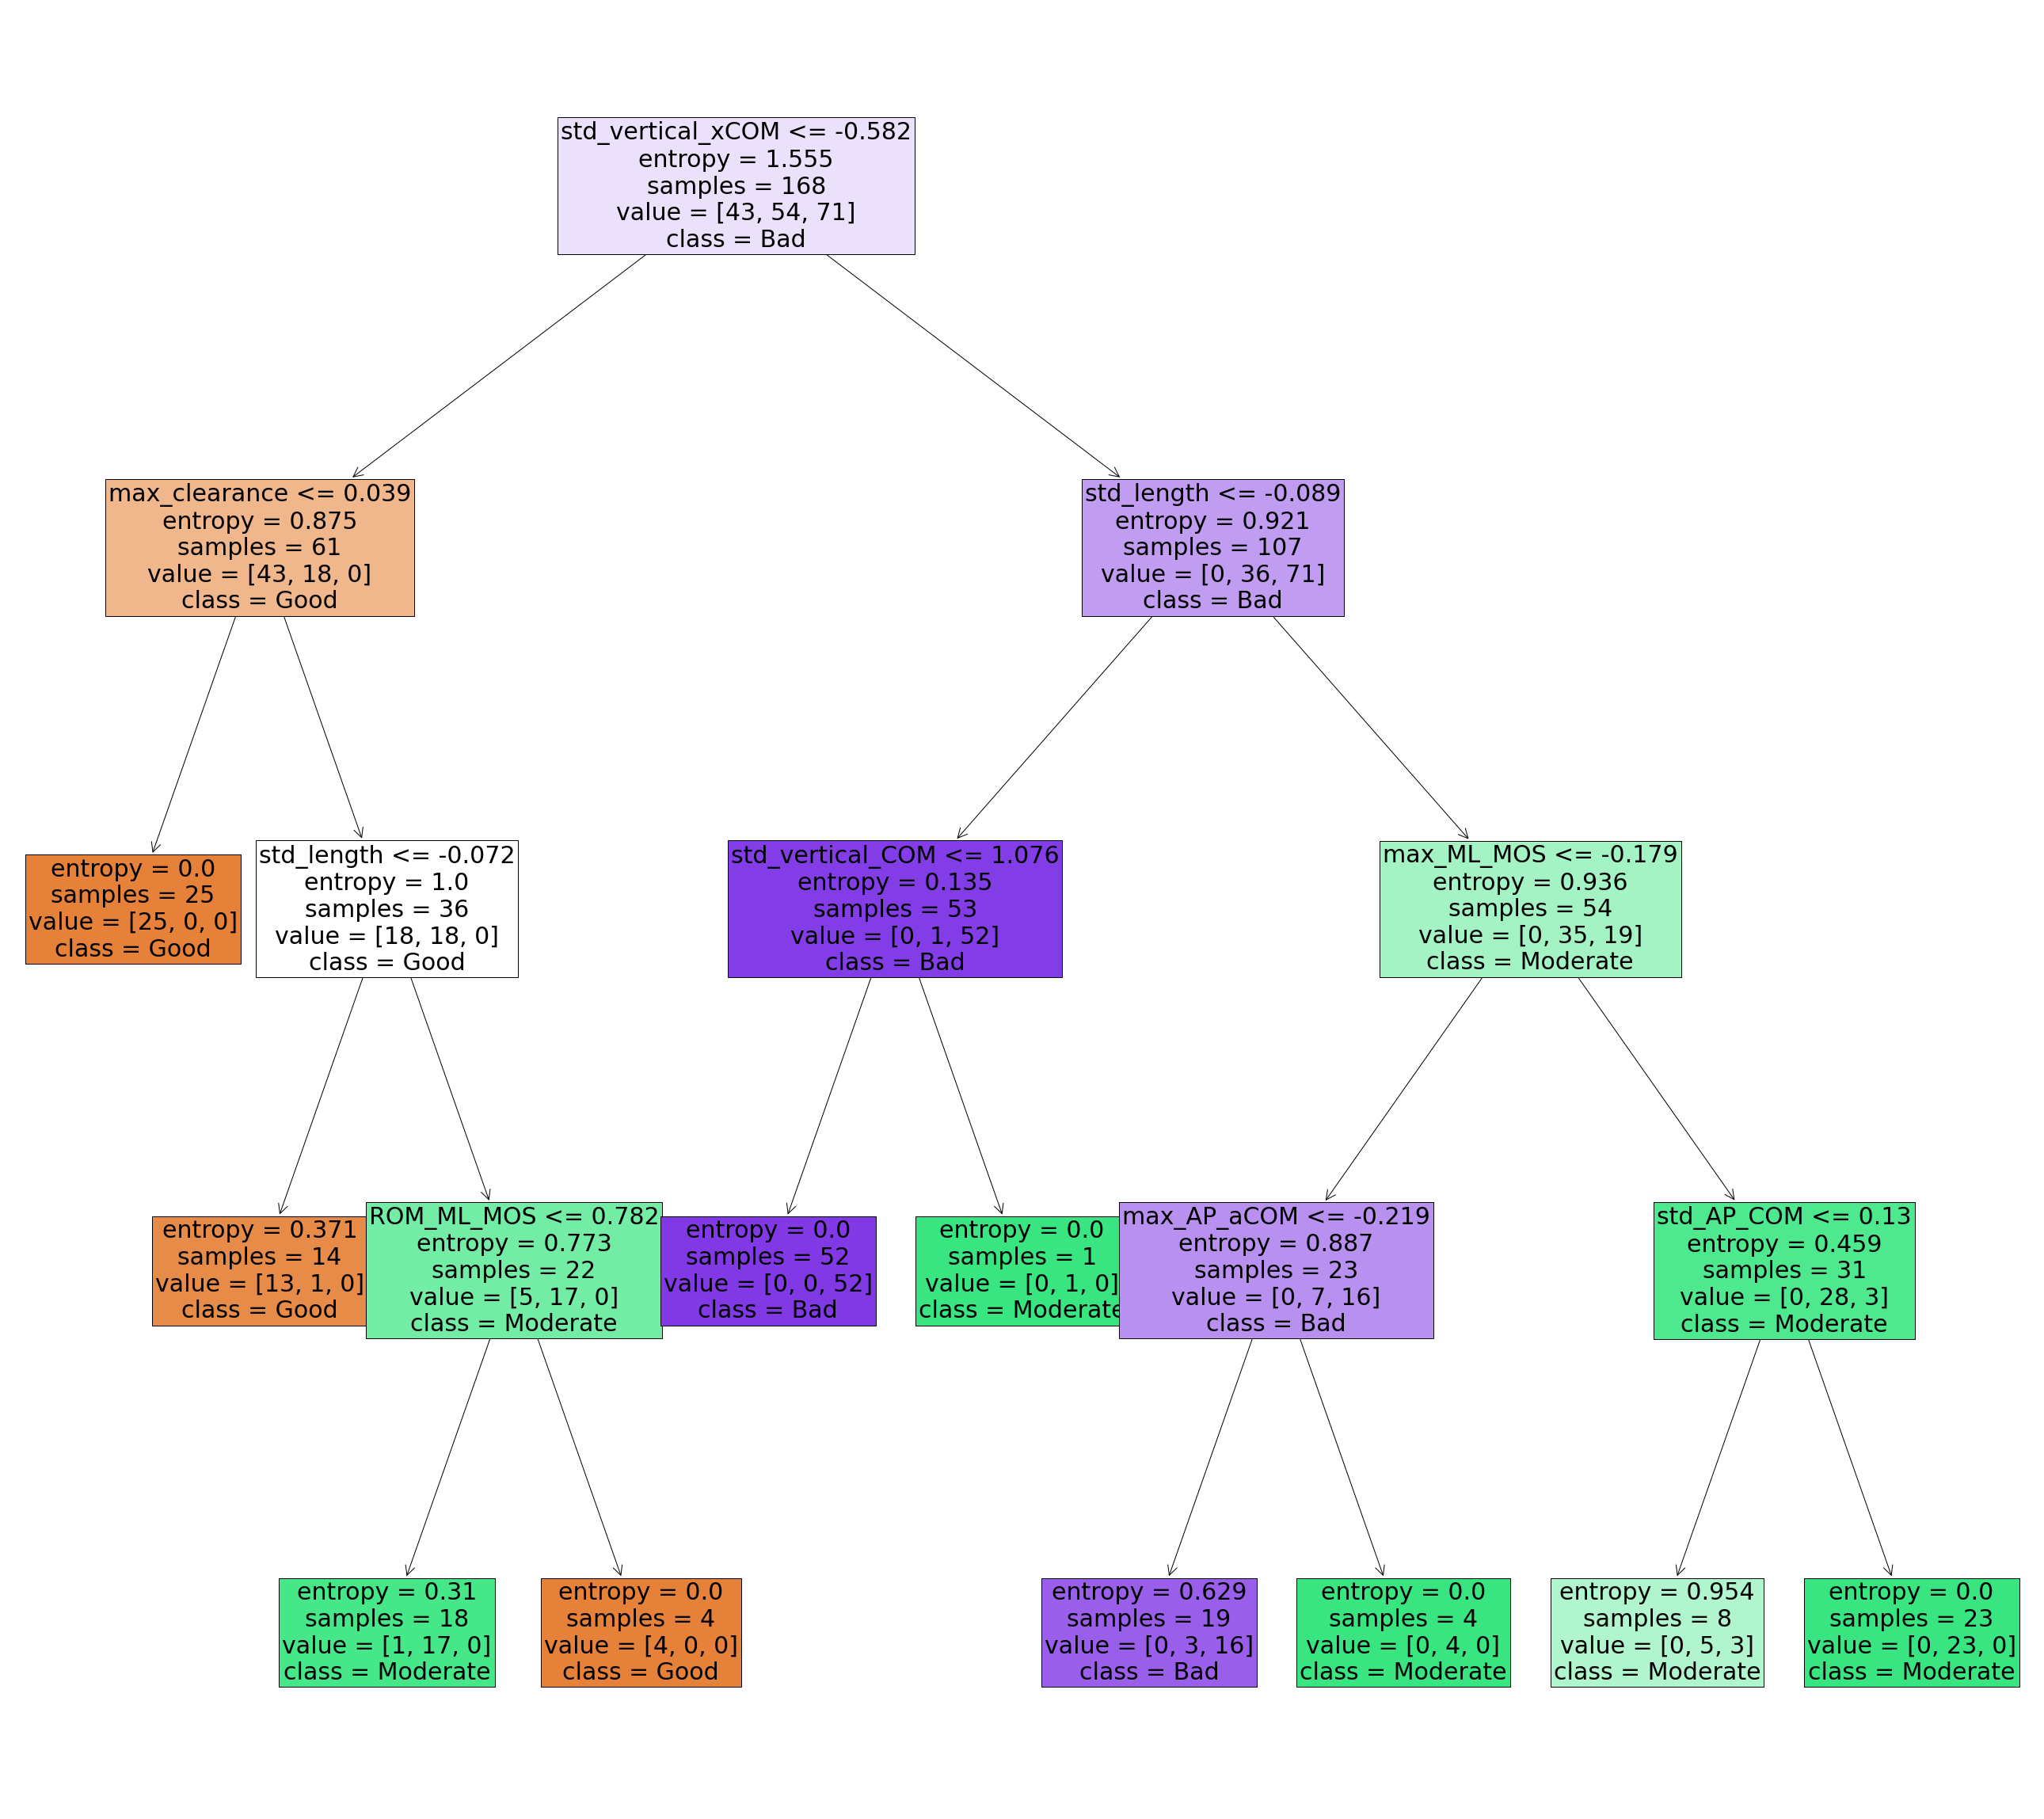

In [374]:
from sklearn import  tree
figure = plt.figure(figsize = (46,42))
tree.plot_tree(all_DT_best_reg, 
              feature_names=list(all_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
               fontsize=30, 
              filled=True)

[Text(767.25, 1189.125, 'mean_AP_MOS <= 0.466\ngini = 0.636\nsamples = 109\nvalue = [43, 45, 80]\nclass = Bad'),
 Text(418.5, 849.375, 'std_AP_MOS <= 1.861\ngini = 0.355\nsamples = 64\nvalue = [2, 21, 80]\nclass = Bad'),
 Text(279.0, 509.625, 'std_vertical_xCOM <= 1.09\ngini = 0.295\nsamples = 61\nvalue = [2, 15, 80]\nclass = Bad'),
 Text(139.5, 169.875, 'gini = 0.182\nsamples = 49\nvalue = [2, 6, 73]\nclass = Bad'),
 Text(418.5, 169.875, 'gini = 0.492\nsamples = 12\nvalue = [0, 9, 7]\nclass = Moderate'),
 Text(558.0, 509.625, 'gini = 0.0\nsamples = 3\nvalue = [0, 6, 0]\nclass = Moderate'),
 Text(1116.0, 849.375, 'std_width <= 0.836\ngini = 0.466\nsamples = 45\nvalue = [41, 24, 0]\nclass = Good'),
 Text(837.0, 509.625, 'std_AP_xCOM <= 0.882\ngini = 0.175\nsamples = 23\nvalue = [28, 3, 0]\nclass = Good'),
 Text(697.5, 169.875, 'gini = 0.0\nsamples = 15\nvalue = [21, 0, 0]\nclass = Good'),
 Text(976.5, 169.875, 'gini = 0.42\nsamples = 8\nvalue = [7, 3, 0]\nclass = Good'),
 Text(1395.0, 5

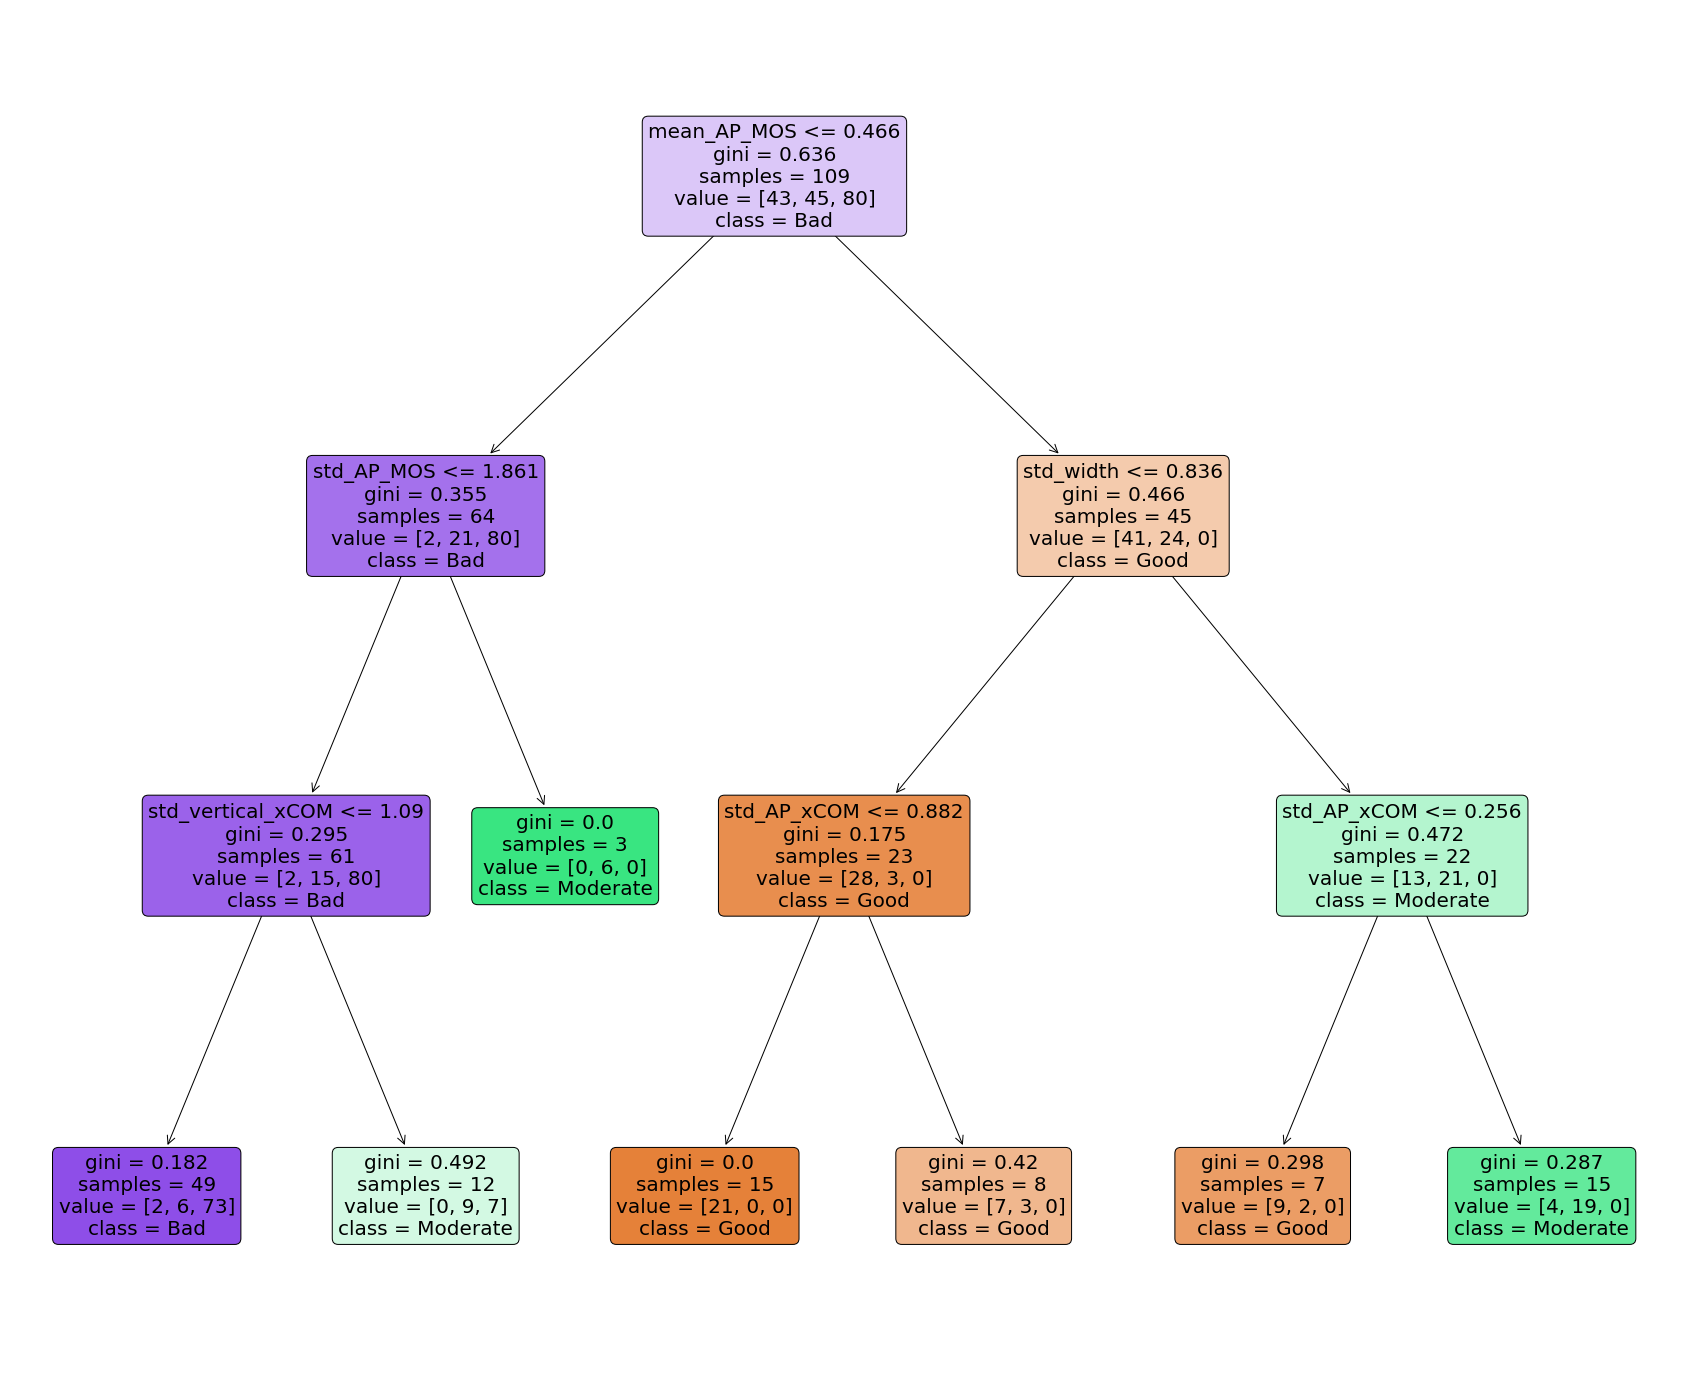

In [375]:
figure = plt.figure(figsize = (30,25))
tree.plot_tree(all_RF_best_reg.estimators_[0], 
              feature_names=list(all_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              fontsize=20, 
              rounded=True)


In [376]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [377]:
acc_3_t = accuracy_score(y_test.ravel(), all_SVC_best_reg.predict(all_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), all_SVC_best_reg.predict(all_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("all SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

all SVC
acc: 0.808
recall: 0.783
precision: 0.777


Text(0.5, 1.0, 'SVC confusion matrix')

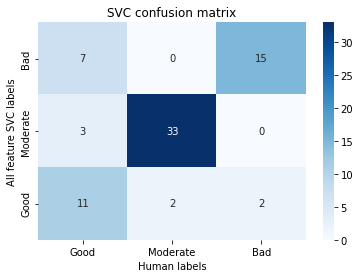

In [378]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), all_SVC_best_reg.predict(all_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), all_SVC_best_reg.predict(all_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('All feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [379]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("All feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

All feature SVC Sensitivity: 
 Good prediction: 52.38095238095239 
 Moderate prediction 94.28571428571428 
 Bad prediction 88.23529411764706


In [380]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("All feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


All feature SVC Precision: 
 Good prediction: 73.33333333333333 
 Moderate prediction 91.66666666666666 
 Bad prediction 68.18181818181817


In [381]:
acc_3_t = accuracy_score(y_test.ravel(), all_DT_best_reg.predict(all_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), all_DT_best_reg.predict(all_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("all DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

all DT
acc: 0.836
recall: 0.811
precision: 0.816


Text(0.5, 1.0, 'DT confusion matrix')

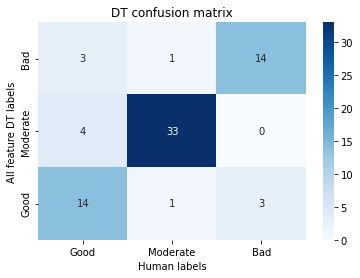

In [382]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), all_DT_best_reg.predict(all_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), all_DT_best_reg.predict(all_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('All feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [383]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("All feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

All feature DT Sensitivity: 
 Good prediction: 66.66666666666666 
 Moderate prediction 94.28571428571428 
 Bad prediction 82.35294117647058


In [384]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("All feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


All feature DT Precision: 
 Good prediction: 77.77777777777779 
 Moderate prediction 89.1891891891892 
 Bad prediction 77.77777777777779


In [385]:
acc_3_t = accuracy_score(y_test.ravel(), all_RF_best_reg.predict(all_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), all_RF_best_reg.predict(all_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("all RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

all RF
acc: 0.822
recall: 0.79
precision: 0.82


Text(0.5, 1.0, 'RF confusion matrix')

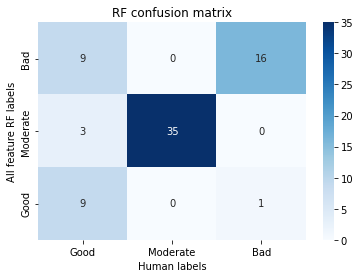

In [386]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), all_RF_best_reg.predict(all_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), all_RF_best_reg.predict(all_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('All feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [387]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("All feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

All feature RF Sensitivity: 
 Good prediction: 42.857142857142854 
 Moderate prediction 100.0 
 Bad prediction 94.11764705882352


In [388]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("All feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


All feature RF Precision: 
 Good prediction: 90.0 
 Moderate prediction 92.10526315789474 
 Bad prediction 64.0


### spatiotemporal features

In [389]:
spa_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
spa_SVC_grid_search.fit(spa_x_train, y_train.ravel())
spa_SVC_grid_search.best_params_

{'C': 2.5, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [390]:
spa_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
spa_DT_grid_search.fit(spa_x_train, y_train)
spa_DT_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 9}

In [391]:
spa_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
spa_RF_grid_search.fit(spa_x_train, y_train)
spa_RF_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 8,
 'n_estimators': 100}

In [392]:
spa_SVC_best_reg = spa_SVC_grid_search.best_estimator_
spa_DT_best_reg =spa_DT_grid_search.best_estimator_
spa_RF_best_reg = spa_RF_grid_search.best_estimator_

In [393]:
spa_SVC_best_reg.score(spa_x_test, y_test.ravel())

0.7808219178082192

In [394]:
spa_DT_best_reg.score(spa_x_test, y_test.ravel())

0.8082191780821918

In [395]:
spa_RF_best_reg.score(spa_x_test, y_test.ravel())

0.8356164383561644

[Text(472.15384615384613, 978.48, 'max_AP_aCOM <= -0.217\ngini = 0.653\nsamples = 168\nvalue = [43, 54, 71]\nclass = Bad'),
 Text(171.69230769230768, 761.0400000000001, 'std_length <= -0.089\ngini = 0.405\nsamples = 87\nvalue = [3, 20, 64]\nclass = Bad'),
 Text(85.84615384615384, 543.6, 'gini = 0.0\nsamples = 45\nvalue = [0, 0, 45]\nclass = Bad'),
 Text(257.53846153846155, 543.6, 'SS_duration_ratio <= 0.617\ngini = 0.563\nsamples = 42\nvalue = [3, 20, 19]\nclass = Moderate'),
 Text(171.69230769230768, 326.1600000000001, 'gini = 0.528\nsamples = 29\nvalue = [3, 18, 8]\nclass = Moderate'),
 Text(343.38461538461536, 326.1600000000001, 'std_AP_vCOM <= 0.388\ngini = 0.26\nsamples = 13\nvalue = [0, 2, 11]\nclass = Bad'),
 Text(257.53846153846155, 108.72000000000003, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11]\nclass = Bad'),
 Text(429.23076923076917, 108.72000000000003, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = Moderate'),
 Text(772.6153846153845, 761.0400000000001, 'std_length 

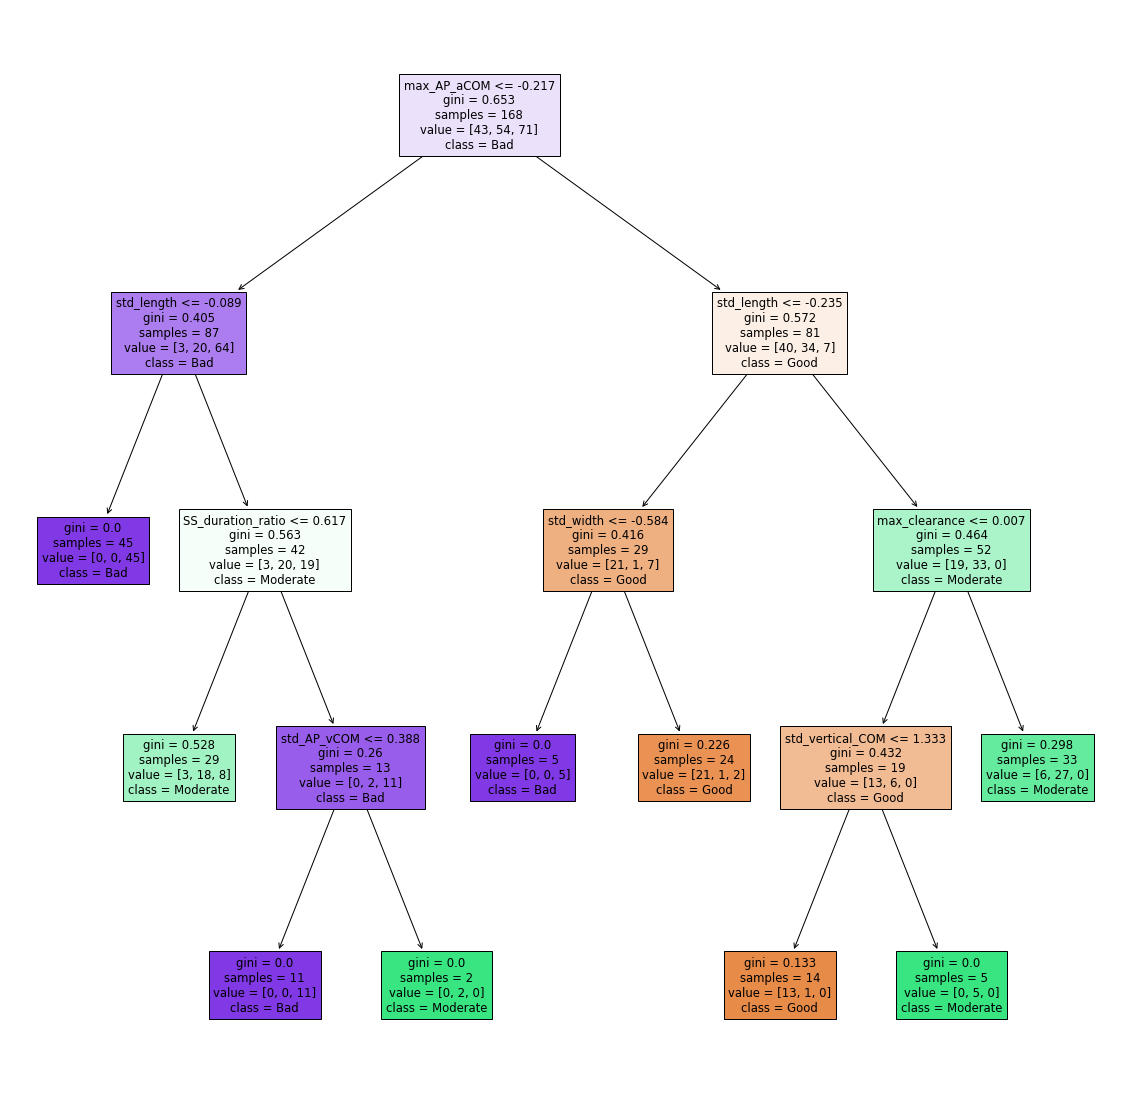

In [396]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_DT_best_reg, 
              feature_names=list(spa_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'max_AP_aCOM <= -0.154\nentropy = 1.572\nsamples = 109\nvalue = [47, 56, 65]\nclass = Bad'),
 Text(279.0, 679.5, 'std_length <= 0.244\nentropy = 1.095\nsamples = 60\nvalue = [5, 22, 62]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'std_vertical_vCOM <= 0.482\nentropy = 0.27\nsamples = 34\nvalue = [1, 1, 51]\nclass = Bad'),
 Text(69.75, 135.89999999999998, 'entropy = 0.0\nsamples = 32\nvalue = [0, 0, 51]\nclass = Bad'),
 Text(209.25, 135.89999999999998, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1, 0]\nclass = Good'),
 Text(418.5, 407.70000000000005, 'std_vertical_aCOM <= -0.079\nentropy = 1.328\nsamples = 26\nvalue = [4, 21, 11]\nclass = Moderate'),
 Text(348.75, 135.89999999999998, 'entropy = 1.477\nsamples = 19\nvalue = [4, 9, 11]\nclass = Bad'),
 Text(488.25, 135.89999999999998, 'entropy = 0.0\nsamples = 7\nvalue = [0, 12, 0]\nclass = Moderate'),
 Text(837.0, 679.5, 'std_vertical_vCOM <= -0.417\nentropy = 1.187\nsamples = 49\nvalue = [42, 34, 3]\ncl

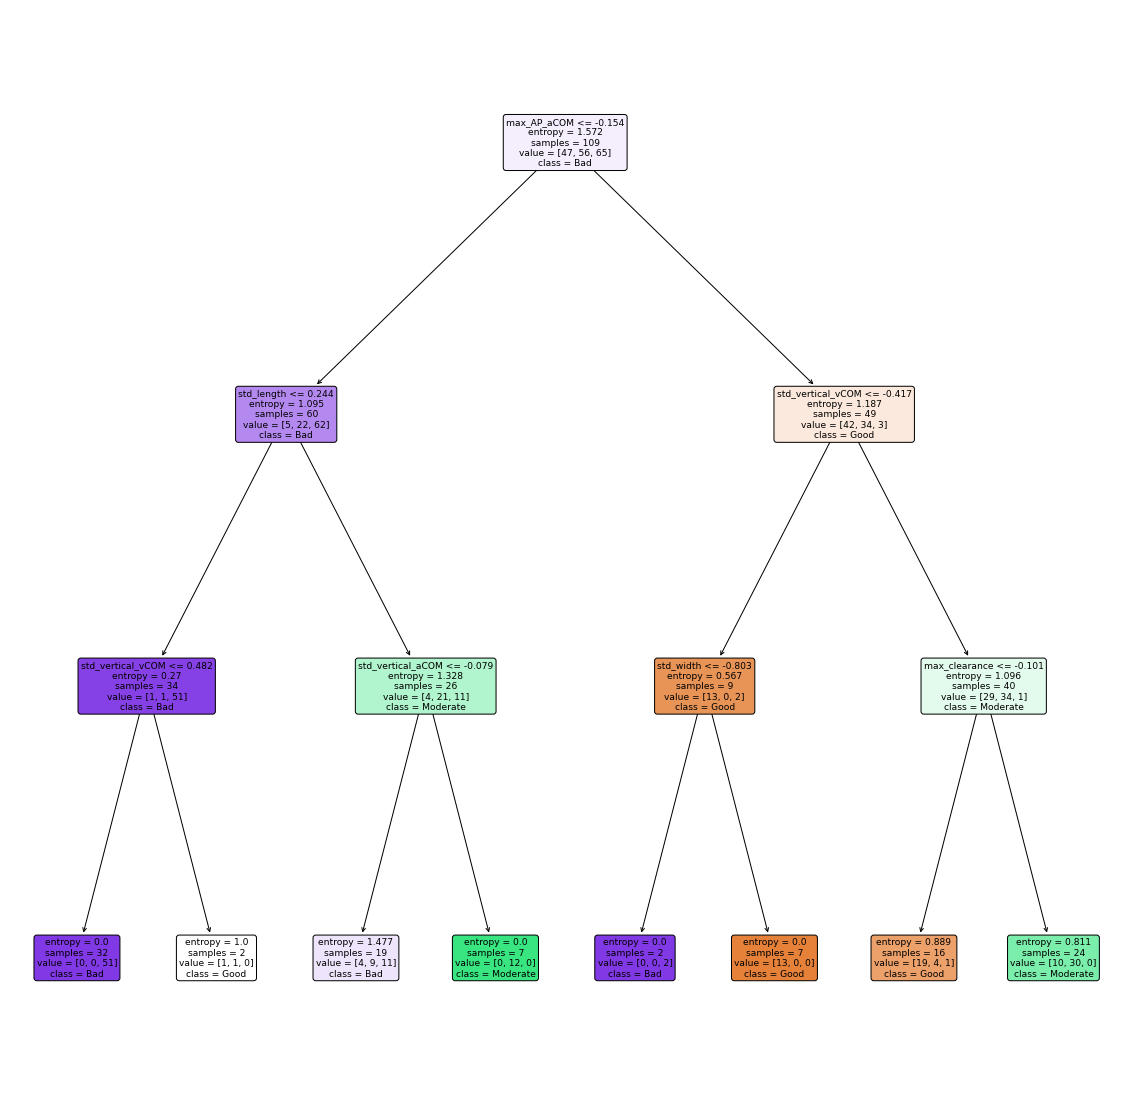

In [397]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_RF_best_reg.estimators_[0], 
              feature_names=list(spa_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [398]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [399]:
acc_3_t = accuracy_score(y_test.ravel(), spa_SVC_best_reg.predict(spa_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_SVC_best_reg.predict(spa_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spatiotemporal SVC" + "\n" + "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spatiotemporal SVC
acc: 0.781
recall: 0.736
precision: 0.762


Text(0.5, 1.0, 'SVC confusion matrix')

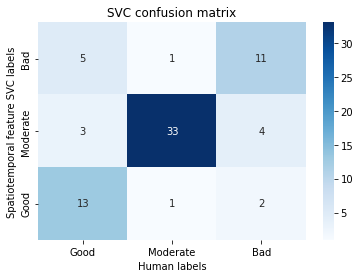

In [400]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_SVC_best_reg.predict(spa_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_SVC_best_reg.predict(spa_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Spatiotemporal feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [401]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Spatiotemporal feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Spatiotemporal feature SVC Sensitivity: 
 Good prediction: 61.904761904761905 
 Moderate prediction 94.28571428571428 
 Bad prediction 64.70588235294117


In [402]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Spatiotemporal feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Spatiotemporal feature SVC Precision: 
 Good prediction: 81.25 
 Moderate prediction 82.5 
 Bad prediction 64.70588235294117


In [403]:
acc_3_t = accuracy_score(y_test.ravel(), spa_DT_best_reg.predict(spa_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_DT_best_reg.predict(spa_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spatiotemporal DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spatiotemporal DT
acc: 0.808
recall: 0.777
precision: 0.805


Text(0.5, 1.0, 'DT confusion matrix')

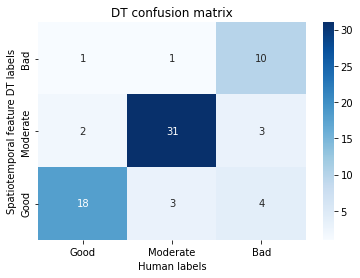

In [404]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_DT_best_reg.predict(spa_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_DT_best_reg.predict(spa_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Spatiotemporal feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [405]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Spatiotemporal feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Spatiotemporal feature DT Sensitivity: 
 Good prediction: 85.71428571428571 
 Moderate prediction 88.57142857142857 
 Bad prediction 58.82352941176471


In [406]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Spatiotemporal feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Spatiotemporal feature DT Precision: 
 Good prediction: 72.0 
 Moderate prediction 86.11111111111111 
 Bad prediction 83.33333333333334


In [407]:
acc_3_t = accuracy_score(y_test.ravel(), spa_RF_best_reg.predict(spa_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_RF_best_reg.predict(spa_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spatiotemporal RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spatiotemporal RF
acc: 0.836
recall: 0.79
precision: 0.844


Text(0.5, 1.0, 'RF confusion matrix')

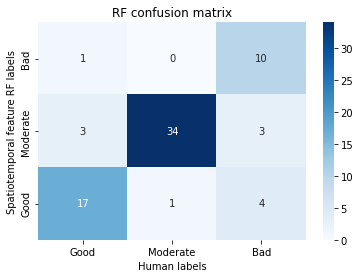

In [408]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_RF_best_reg.predict(spa_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_RF_best_reg.predict(spa_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Spatiotemporal feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [409]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Spatiotemporal feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Spatiotemporal feature RF Sensitivity: 
 Good prediction: 80.95238095238095 
 Moderate prediction 97.14285714285714 
 Bad prediction 58.82352941176471


In [410]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Spatiotemporal feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Spatiotemporal feature RF Precision: 
 Good prediction: 77.27272727272727 
 Moderate prediction 85.0 
 Bad prediction 90.9090909090909


### cop features

In [411]:
COP_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
COP_SVC_grid_search.fit(cop_x_train, y_train.ravel())
COP_SVC_grid_search.best_params_

{'C': 2, 'degree': 2, 'kernel': 'linear', 'probability': True}

In [412]:
COP_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
COP_DT_grid_search.fit(cop_x_train, y_train)
COP_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 9}

In [413]:
COP_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
COP_RF_grid_search.fit(cop_x_train, y_train)
COP_RF_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 15,
 'n_estimators': 200}

In [414]:
COP_SVC_best_reg = COP_SVC_grid_search.best_estimator_
COP_DT_best_reg = COP_DT_grid_search.best_estimator_
COP_RF_best_reg = COP_RF_grid_search.best_estimator_

In [415]:
COP_SVC_best_reg.score(cop_x_test, y_test.ravel())

0.6575342465753424

In [416]:
COP_DT_best_reg.score(cop_x_test, y_test.ravel())

0.6712328767123288

In [417]:
COP_RF_best_reg.score(cop_x_test, y_test.ravel())

0.6575342465753424

[Text(643.8461538461538, 978.48, 'std_AP_aCOP <= -0.184\nentropy = 1.555\nsamples = 168\nvalue = [43, 54, 71]\nclass = Bad'),
 Text(429.23076923076917, 761.0400000000001, 'std_AP_vCOP <= -0.434\nentropy = 1.252\nsamples = 96\nvalue = [8, 29, 59]\nclass = Bad'),
 Text(257.53846153846155, 543.6, 'std_ML_vCOP <= -0.87\nentropy = 1.531\nsamples = 28\nvalue = [6, 12, 10]\nclass = Moderate'),
 Text(171.69230769230768, 326.1600000000001, 'max_AP_vCOP <= -0.277\nentropy = 1.55\nsamples = 23\nvalue = [6, 7, 10]\nclass = Bad'),
 Text(85.84615384615384, 108.72000000000003, 'entropy = 1.441\nsamples = 20\nvalue = [3, 7, 10]\nclass = Bad'),
 Text(257.53846153846155, 108.72000000000003, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = Good'),
 Text(343.38461538461536, 326.1600000000001, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5, 0]\nclass = Moderate'),
 Text(600.9230769230769, 543.6, 'std_ML_COP <= 1.197\nentropy = 0.99\nsamples = 68\nvalue = [2, 17, 49]\nclass = Bad'),
 Text(515.07692307692

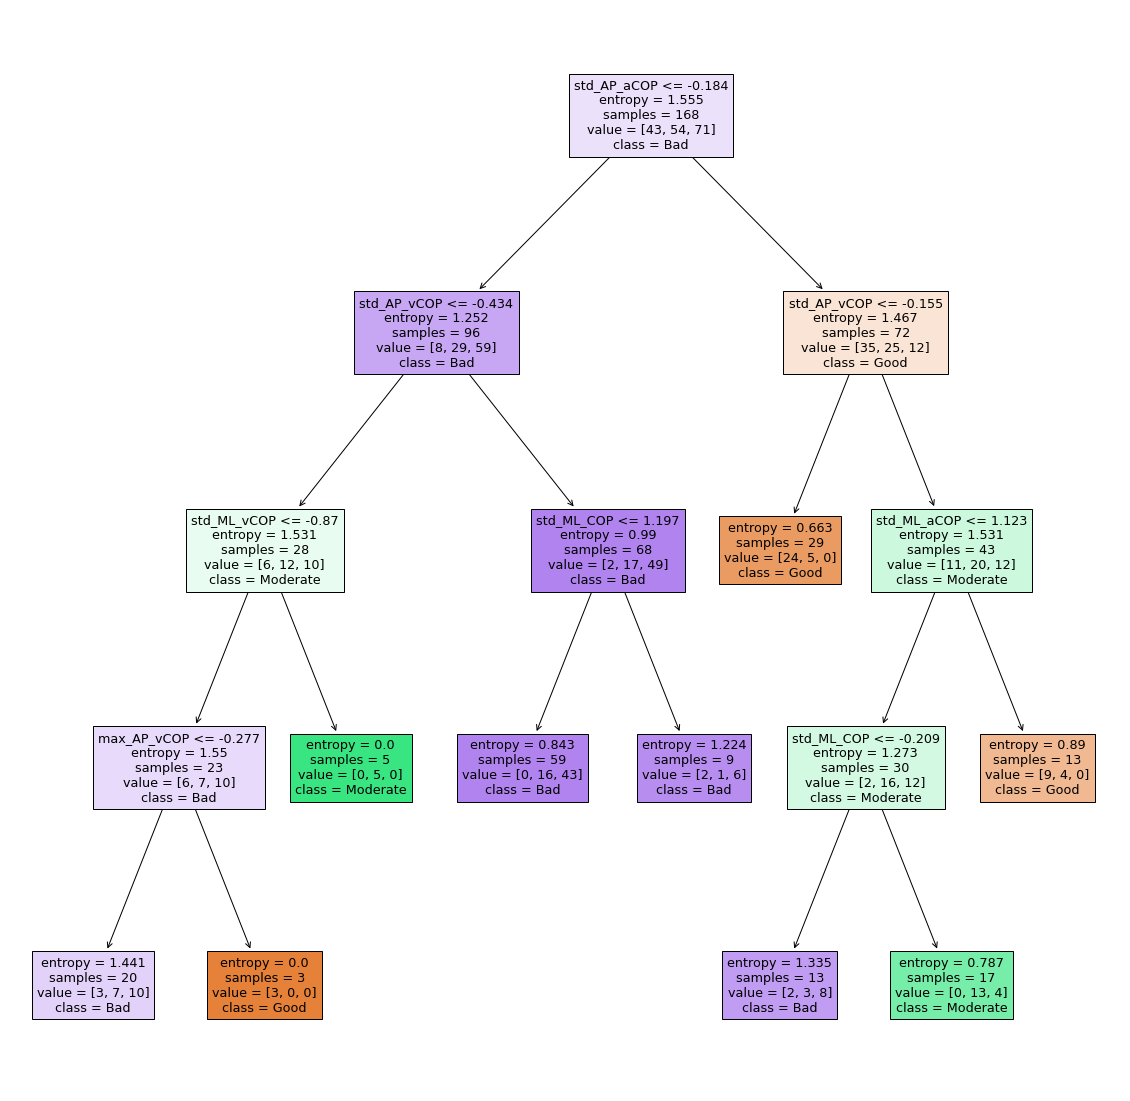

In [418]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(COP_DT_best_reg, 
              feature_names=list(cop_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'std_AP_aCOP <= -0.187\nentropy = 1.526\nsamples = 102\nvalue = [38, 53, 77]\nclass = Bad'),
 Text(279.0, 679.5, 'std_ML_vCOP <= -1.01\nentropy = 1.172\nsamples = 58\nvalue = [5, 32, 61]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'std_ML_vCOP <= -1.142\nentropy = 1.572\nsamples = 10\nvalue = [5, 7, 6]\nclass = Moderate'),
 Text(69.75, 135.89999999999998, 'entropy = 1.429\nsamples = 9\nvalue = [2, 7, 6]\nclass = Moderate'),
 Text(209.25, 135.89999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [3, 0, 0]\nclass = Good'),
 Text(418.5, 407.70000000000005, 'std_ML_aCOP <= 0.067\nentropy = 0.896\nsamples = 48\nvalue = [0, 25, 55]\nclass = Bad'),
 Text(348.75, 135.89999999999998, 'entropy = 0.85\nsamples = 46\nvalue = [0, 21, 55]\nclass = Bad'),
 Text(488.25, 135.89999999999998, 'entropy = 0.0\nsamples = 2\nvalue = [0, 4, 0]\nclass = Moderate'),
 Text(837.0, 679.5, 'std_AP_aCOP <= -0.032\nentropy = 1.519\nsamples = 44\nvalue = [33, 21, 16]\nclass = Good')

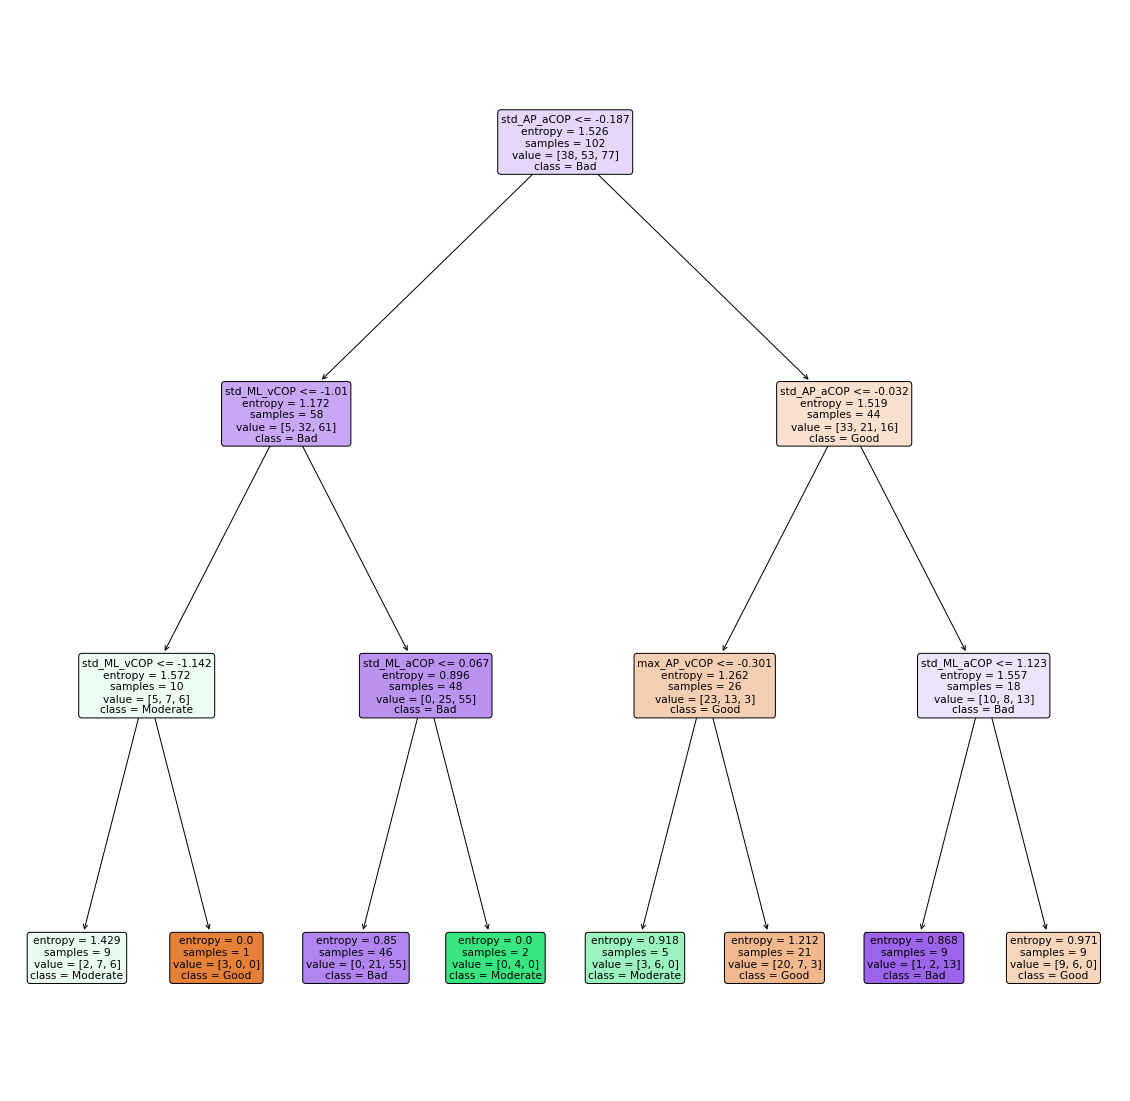

In [419]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(COP_RF_best_reg.estimators_[0], 
              feature_names=list(cop_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [420]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [421]:
acc_3_t = accuracy_score(y_test.ravel(), COP_SVC_best_reg.predict(cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), COP_SVC_best_reg.predict(cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("forceplates SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

forceplates SVC
acc: 0.658
recall: 0.589
precision: 0.633


Text(0.5, 1.0, 'SVC confusion matrix')

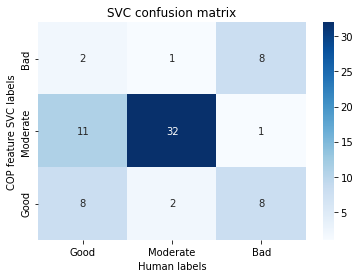

In [422]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), COP_SVC_best_reg.predict(cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), COP_SVC_best_reg.predict(cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('COP feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [423]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("COP feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

COP feature SVC Sensitivity: 
 Good prediction: 38.095238095238095 
 Moderate prediction 91.42857142857143 
 Bad prediction 47.05882352941176


In [424]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("COP feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


COP feature SVC Precision: 
 Good prediction: 44.44444444444444 
 Moderate prediction 72.72727272727273 
 Bad prediction 72.72727272727273


In [425]:
acc_3_t = accuracy_score(y_test.ravel(), COP_DT_best_reg.predict(cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), COP_DT_best_reg.predict(cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("forceplates DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

forceplates DT
acc: 0.671
recall: 0.632
precision: 0.635


Text(0.5, 1.0, 'DT confusion matrix')

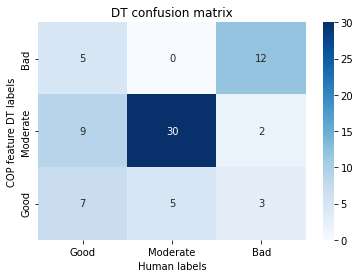

In [426]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), COP_DT_best_reg.predict(cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), COP_DT_best_reg.predict(cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('COP feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [427]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("COP feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

COP feature DT Sensitivity: 
 Good prediction: 33.33333333333333 
 Moderate prediction 85.71428571428571 
 Bad prediction 70.58823529411765


In [428]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("COP feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


COP feature DT Precision: 
 Good prediction: 46.666666666666664 
 Moderate prediction 73.17073170731707 
 Bad prediction 70.58823529411765


In [429]:
acc_3_t = accuracy_score(y_test.ravel(), COP_RF_best_reg.predict(cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), COP_RF_best_reg.predict(cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("forceplates RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

forceplates RF
acc: 0.658
recall: 0.629
precision: 0.623


Text(0.5, 1.0, 'RF confusion matrix')

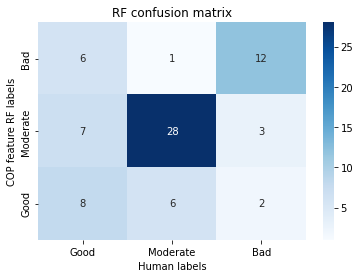

In [430]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), COP_RF_best_reg.predict(cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), COP_RF_best_reg.predict(cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('COP feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [431]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("COP feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

COP feature RF Sensitivity: 
 Good prediction: 38.095238095238095 
 Moderate prediction 80.0 
 Bad prediction 70.58823529411765


In [432]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("COP feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


COP feature RF Precision: 
 Good prediction: 50.0 
 Moderate prediction 73.68421052631578 
 Bad prediction 63.1578947368421


### advanced features

In [433]:
adv_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
adv_SVC_grid_search.fit(adv_x_train, y_train.ravel())
adv_SVC_grid_search.best_params_

{'C': 2, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [434]:
adv_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
adv_DT_grid_search.fit(adv_x_train, y_train)
adv_DT_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 15}

In [435]:
adv_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
adv_RF_grid_search.fit(adv_x_train, y_train)
adv_RF_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 10,
 'n_estimators': 300}

In [436]:
adv_SVC_best_reg = adv_SVC_grid_search.best_estimator_
adv_DT_best_reg = adv_DT_grid_search.best_estimator_
adv_RF_best_reg = adv_RF_grid_search.best_estimator_

In [437]:
adv_SVC_best_reg.score(adv_x_test, y_test.ravel())

0.7534246575342466

In [438]:
adv_DT_best_reg.score(adv_x_test, y_test.ravel())

0.6986301369863014

In [439]:
adv_RF_best_reg.score(adv_x_test, y_test.ravel())

0.7397260273972602

[Text(499.2631578947368, 996.6, 'std_vertical_xCOM <= -0.582\ngini = 0.653\nsamples = 168\nvalue = [43, 54, 71]\nclass = Bad'),
 Text(234.94736842105263, 815.4000000000001, 'std_AP_xCOM <= 0.686\ngini = 0.416\nsamples = 61\nvalue = [43, 18, 0]\nclass = Good'),
 Text(117.47368421052632, 634.2, 'std_AP_IA <= -2.848\ngini = 0.208\nsamples = 34\nvalue = [30, 4, 0]\nclass = Good'),
 Text(58.73684210526316, 453.0, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = Moderate'),
 Text(176.21052631578948, 453.0, 'gini = 0.062\nsamples = 31\nvalue = [30, 1, 0]\nclass = Good'),
 Text(352.42105263157896, 634.2, 'mean_AP_MOS <= 1.221\ngini = 0.499\nsamples = 27\nvalue = [13, 14, 0]\nclass = Moderate'),
 Text(293.6842105263158, 453.0, 'std_ML_MOS <= 0.1\ngini = 0.455\nsamples = 20\nvalue = [13, 7, 0]\nclass = Good'),
 Text(176.21052631578948, 271.79999999999995, 'ROM_ML_MOS <= -0.304\ngini = 0.375\nsamples = 8\nvalue = [2, 6, 0]\nclass = Moderate'),
 Text(117.47368421052632, 90.59999999999991, 'gin

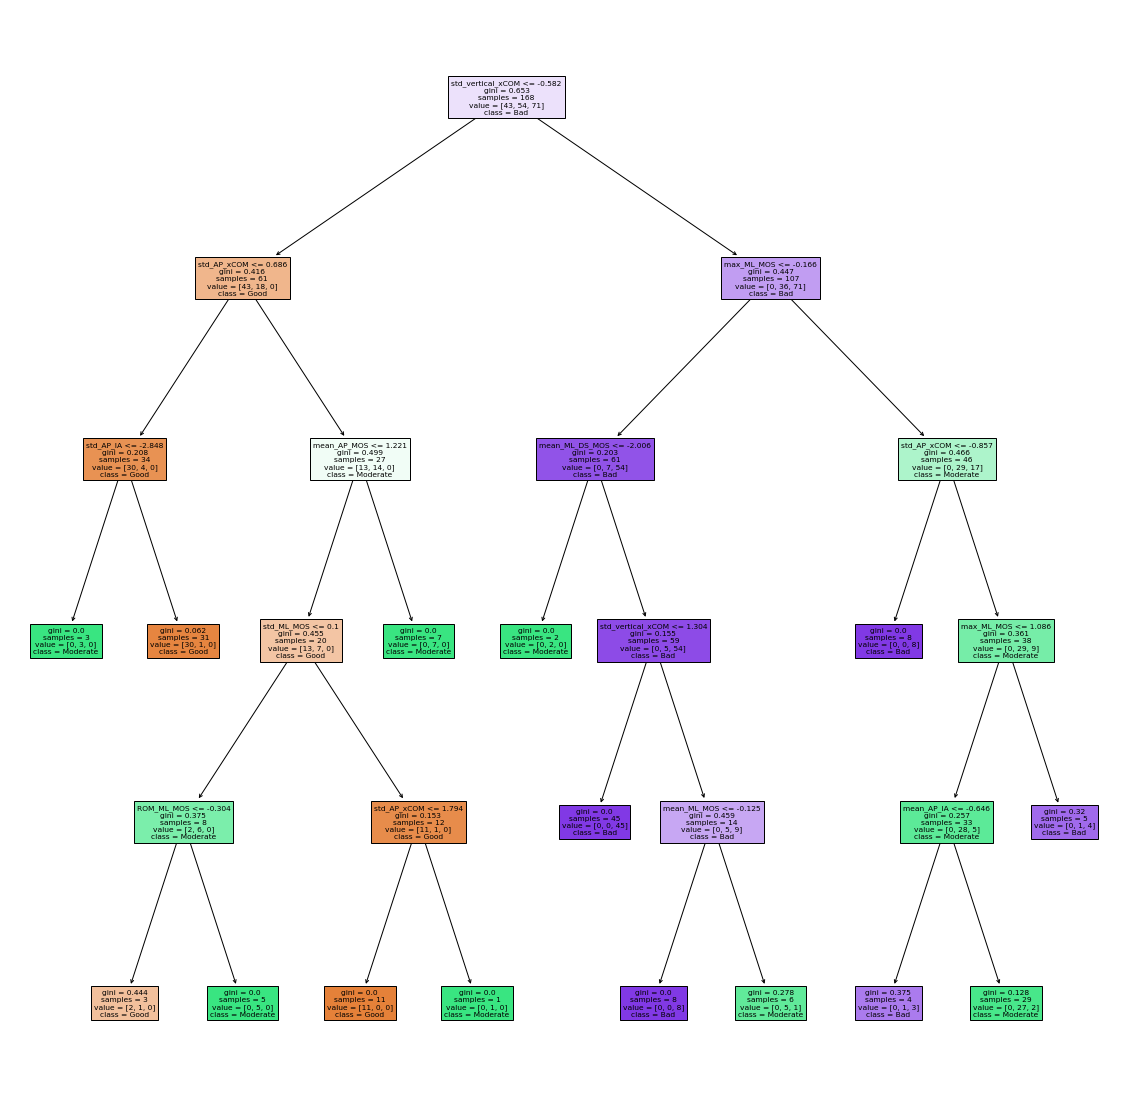

In [440]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(adv_DT_best_reg, 
              feature_names=list(adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'mean_AP_MOS <= 0.38\ngini = 0.644\nsamples = 104\nvalue = [40, 53, 75]\nclass = Bad'),
 Text(279.0, 679.5, 'min_AP_MOS <= -1.49\ngini = 0.454\nsamples = 68\nvalue = [3, 33, 75]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'mean_ML_MOS <= -0.973\ngini = 0.432\nsamples = 12\nvalue = [0, 13, 6]\nclass = Moderate'),
 Text(69.75, 135.89999999999998, 'gini = 0.278\nsamples = 4\nvalue = [0, 1, 5]\nclass = Bad'),
 Text(209.25, 135.89999999999998, 'gini = 0.142\nsamples = 8\nvalue = [0, 12, 1]\nclass = Moderate'),
 Text(418.5, 407.70000000000005, 'std_vertical_xCOM <= 1.072\ngini = 0.389\nsamples = 56\nvalue = [3, 20, 69]\nclass = Bad'),
 Text(348.75, 135.89999999999998, 'gini = 0.253\nsamples = 41\nvalue = [3, 7, 60]\nclass = Bad'),
 Text(488.25, 135.89999999999998, 'gini = 0.483\nsamples = 15\nvalue = [0, 13, 9]\nclass = Moderate'),
 Text(837.0, 679.5, 'std_AP_xCOM <= 0.356\ngini = 0.456\nsamples = 36\nvalue = [37, 20, 0]\nclass = Good'),
 Text(697.5, 407.

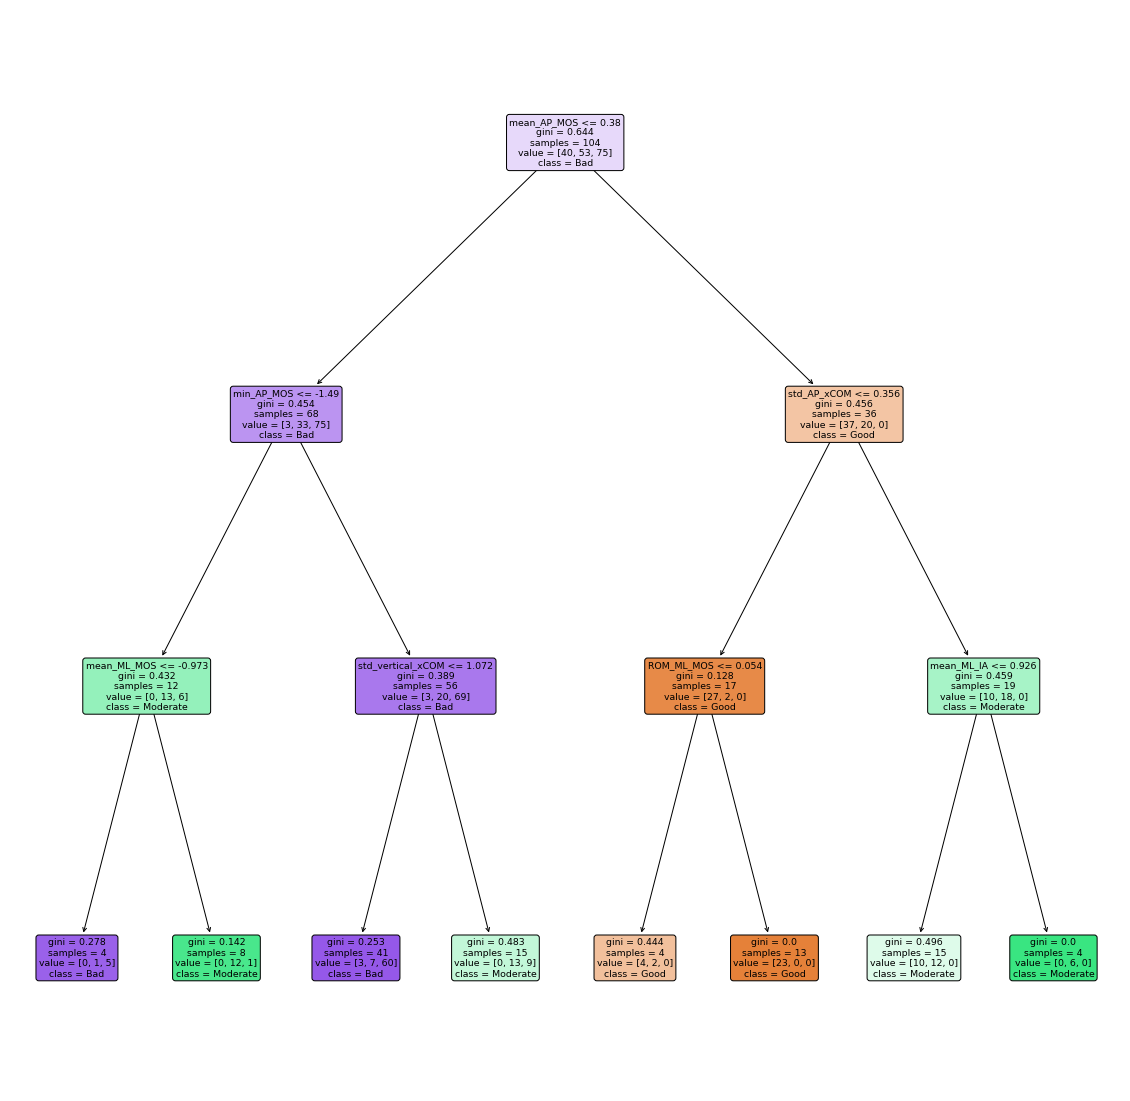

In [441]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(adv_RF_best_reg.estimators_[0], 
              feature_names=list(adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [442]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [443]:
acc_3_t = accuracy_score(y_test.ravel(), adv_SVC_best_reg.predict(adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), adv_SVC_best_reg.predict(adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("advanced SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

advanced SVC
acc: 0.753
recall: 0.699
precision: 0.701


Text(0.5, 1.0, 'SVC confusion matrix')

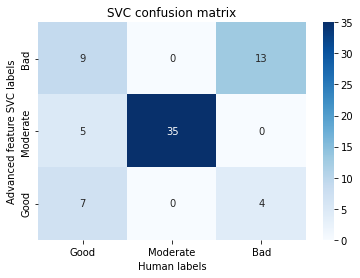

In [444]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), adv_SVC_best_reg.predict(adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), adv_SVC_best_reg.predict(adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Advanced feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [445]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Advanced feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Advanced feature SVC Sensitivity: 
 Good prediction: 33.33333333333333 
 Moderate prediction 100.0 
 Bad prediction 76.47058823529412


In [446]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Advanced feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Advanced feature SVC Precision: 
 Good prediction: 63.63636363636363 
 Moderate prediction 87.5 
 Bad prediction 59.09090909090909


In [447]:
acc_3_t = accuracy_score(y_test.ravel(), adv_DT_best_reg.predict(adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), adv_DT_best_reg.predict(adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("advanced DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

advanced DT
acc: 0.699
recall: 0.677
precision: 0.668


Text(0.5, 1.0, 'DT confusion matrix')

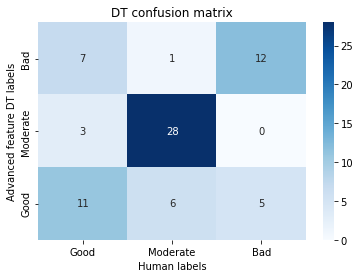

In [448]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), adv_DT_best_reg.predict(adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), adv_DT_best_reg.predict(adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Advanced feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [449]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Advanced feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Advanced feature DT Sensitivity: 
 Good prediction: 52.38095238095239 
 Moderate prediction 80.0 
 Bad prediction 70.58823529411765


In [450]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Advanced feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Advanced feature DT Precision: 
 Good prediction: 50.0 
 Moderate prediction 90.32258064516128 
 Bad prediction 60.0


In [451]:
acc_3_t = accuracy_score(y_test.ravel(), adv_RF_best_reg.predict(adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), adv_RF_best_reg.predict(adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("advanced RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

advanced RF
acc: 0.74
recall: 0.697
precision: 0.693


Text(0.5, 1.0, 'RF confusion matrix')

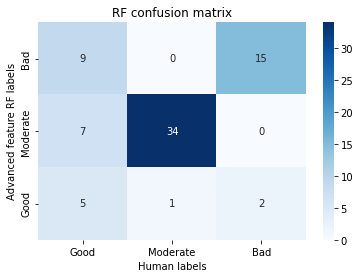

In [452]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), adv_RF_best_reg.predict(adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), adv_RF_best_reg.predict(adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Advanced feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [453]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Advanced feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Advanced feature RF Sensitivity: 
 Good prediction: 23.809523809523807 
 Moderate prediction 97.14285714285714 
 Bad prediction 88.23529411764706


In [454]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Advanced feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Advanced feature RF Precision: 
 Good prediction: 62.5 
 Moderate prediction 82.92682926829268 
 Bad prediction 62.5


### spa cop features

In [455]:
spa_cop_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
spa_cop_SVC_grid_search.fit(spa_cop_x_train, y_train.ravel())
spa_cop_SVC_grid_search.best_params_

{'C': 1.2, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [456]:
spa_cop_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
spa_cop_DT_grid_search.fit(spa_cop_x_train, y_train)
spa_cop_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 15}

In [457]:
spa_cop_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
spa_cop_RF_grid_search.fit(spa_cop_x_train, y_train)
spa_cop_RF_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 8,
 'n_estimators': 100}

In [458]:
spa_cop_SVC_best_reg = spa_cop_SVC_grid_search.best_estimator_
spa_cop_DT_best_reg = spa_cop_DT_grid_search.best_estimator_
spa_cop_RF_best_reg = spa_cop_RF_grid_search.best_estimator_

In [459]:
spa_cop_SVC_best_reg.score(spa_cop_x_test, y_test.ravel())

0.7397260273972602

In [460]:
spa_cop_DT_best_reg.score(spa_cop_x_test, y_test.ravel())

0.6986301369863014

In [461]:
spa_cop_RF_best_reg.score(spa_cop_x_test, y_test.ravel())

0.7808219178082192

[Text(431.1818181818182, 996.6, 'max_AP_aCOM <= -0.261\nentropy = 1.555\nsamples = 168\nvalue = [43, 54, 71]\nclass = Bad'),
 Text(152.1818181818182, 815.4000000000001, 'std_length <= -0.089\nentropy = 0.877\nsamples = 81\nvalue = [1, 19, 61]\nclass = Bad'),
 Text(101.45454545454545, 634.2, 'entropy = 0.0\nsamples = 43\nvalue = [0, 0, 43]\nclass = Bad'),
 Text(202.9090909090909, 634.2, 'DS_duration_ratio <= -0.617\nentropy = 1.149\nsamples = 38\nvalue = [1, 19, 18]\nclass = Moderate'),
 Text(101.45454545454545, 453.0, 'std_AP_vCOM <= 0.388\nentropy = 0.619\nsamples = 13\nvalue = [0, 2, 11]\nclass = Bad'),
 Text(50.72727272727273, 271.79999999999995, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 11]\nclass = Bad'),
 Text(152.1818181818182, 271.79999999999995, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = Moderate'),
 Text(304.3636363636364, 453.0, 'std_AP_aCOP <= -0.217\nentropy = 1.078\nsamples = 25\nvalue = [1, 17, 7]\nclass = Moderate'),
 Text(253.63636363636363, 271.7999999

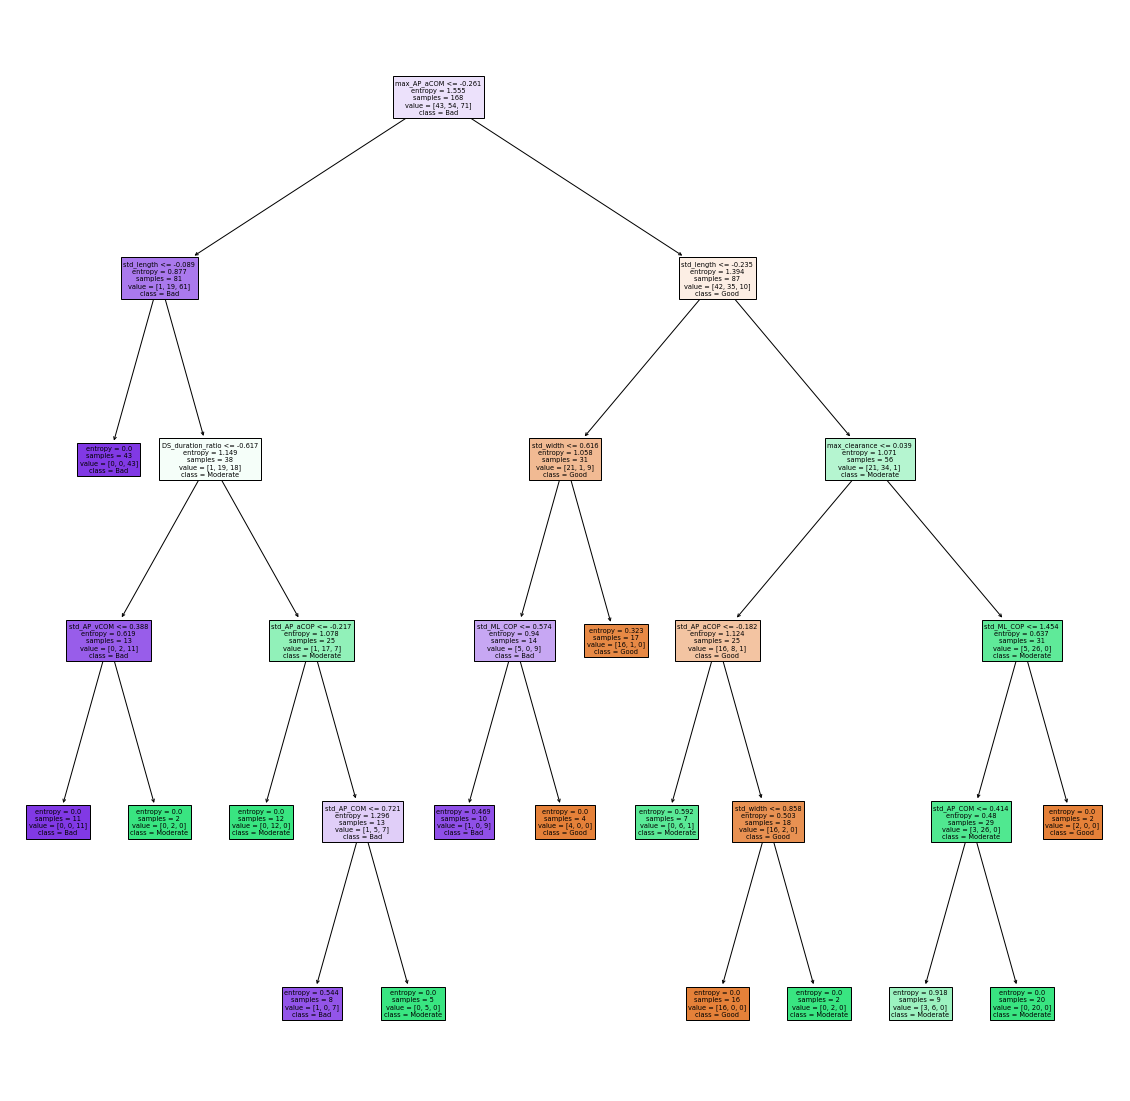

In [462]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_cop_DT_best_reg, 
              feature_names=list(spa_cop_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(643.8461538461538, 951.3000000000001, 'std_vertical_vCOM <= 0.585\nentropy = 1.578\nsamples = 104\nvalue = [50, 55, 63]\nclass = Bad'),
 Text(343.38461538461536, 679.5, 'SS_duration_ratio <= -0.646\nentropy = 1.528\nsamples = 87\nvalue = [46, 31, 63]\nclass = Bad'),
 Text(171.69230769230768, 407.70000000000005, 'std_vertical_COM <= -0.531\nentropy = 0.949\nsamples = 23\nvalue = [0, 14, 24]\nclass = Bad'),
 Text(85.84615384615384, 135.89999999999998, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 17]\nclass = Bad'),
 Text(257.53846153846155, 135.89999999999998, 'entropy = 0.918\nsamples = 11\nvalue = [0, 14, 7]\nclass = Moderate'),
 Text(515.0769230769231, 407.70000000000005, 'std_vertical_aCOM <= -0.089\nentropy = 1.479\nsamples = 64\nvalue = [46, 17, 39]\nclass = Good'),
 Text(429.23076923076917, 135.89999999999998, 'entropy = 1.181\nsamples = 31\nvalue = [13, 4, 34]\nclass = Bad'),
 Text(600.9230769230769, 135.89999999999998, 'entropy = 1.238\nsamples = 33\nvalue = [33, 13, 5]\nc

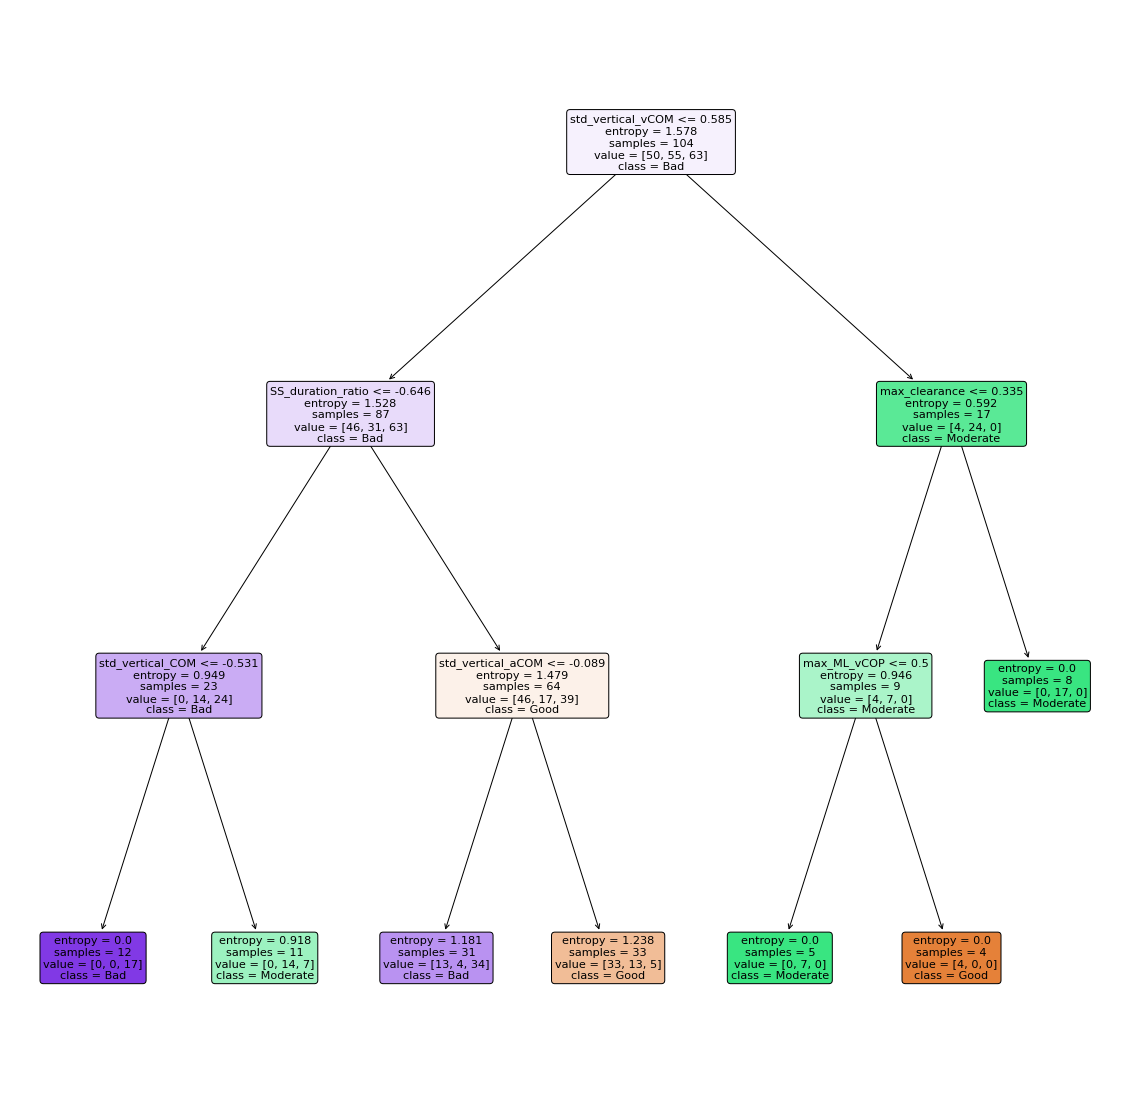

In [463]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_cop_RF_best_reg.estimators_[0], 
              feature_names=list(spa_cop_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [464]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [465]:
acc_3_t = accuracy_score(y_test.ravel(), spa_cop_SVC_best_reg.predict(spa_cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_cop_SVC_best_reg.predict(spa_cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_cop SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_cop SVC
acc: 0.74
recall: 0.677
precision: 0.697


Text(0.5, 1.0, 'SVC confusion matrix')

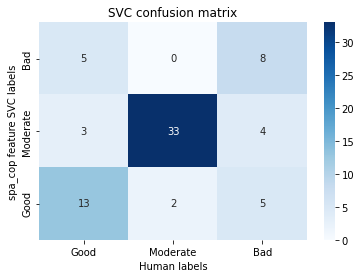

In [466]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_cop_SVC_best_reg.predict(spa_cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_cop_SVC_best_reg.predict(spa_cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_cop feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [467]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_cop feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_cop feature SVC Sensitivity: 
 Good prediction: 61.904761904761905 
 Moderate prediction 94.28571428571428 
 Bad prediction 47.05882352941176


In [468]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_cop feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_cop feature SVC Precision: 
 Good prediction: 65.0 
 Moderate prediction 82.5 
 Bad prediction 61.53846153846154


In [469]:
acc_3_t = accuracy_score(y_test.ravel(), spa_cop_DT_best_reg.predict(spa_cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_cop_DT_best_reg.predict(spa_cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_cop DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_cop DT
acc: 0.699
recall: 0.674
precision: 0.664


Text(0.5, 1.0, 'DT confusion matrix')

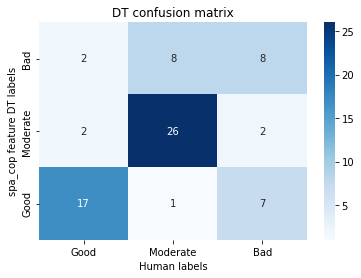

In [470]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_cop_DT_best_reg.predict(spa_cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_cop_DT_best_reg.predict(spa_cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_cop feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [471]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_cop feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_cop feature DT Sensitivity: 
 Good prediction: 80.95238095238095 
 Moderate prediction 74.28571428571429 
 Bad prediction 47.05882352941176


In [472]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_cop feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_cop feature DT Precision: 
 Good prediction: 68.0 
 Moderate prediction 86.66666666666667 
 Bad prediction 44.44444444444444


In [473]:
acc_3_t = accuracy_score(y_test.ravel(), spa_cop_RF_best_reg.predict(spa_cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_cop_RF_best_reg.predict(spa_cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_cop RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_cop RF
acc: 0.781
recall: 0.729
precision: 0.779


Text(0.5, 1.0, 'RF confusion matrix')

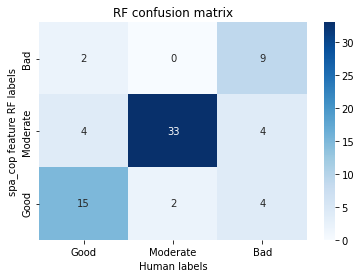

In [474]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_cop_RF_best_reg.predict(spa_cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_cop_RF_best_reg.predict(spa_cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_cop feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [475]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_cop feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_cop feature RF Sensitivity: 
 Good prediction: 71.42857142857143 
 Moderate prediction 94.28571428571428 
 Bad prediction 52.94117647058824


In [476]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_cop feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_cop feature RF Precision: 
 Good prediction: 71.42857142857143 
 Moderate prediction 80.48780487804879 
 Bad prediction 81.81818181818183


### spa adv features

In [477]:
spa_adv_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
spa_adv_SVC_grid_search.fit(spa_adv_x_train, y_train.ravel())
spa_adv_SVC_grid_search.best_params_

{'C': 2.5, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [478]:
spa_adv_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
spa_adv_DT_grid_search.fit(spa_adv_x_train, y_train)
spa_adv_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 9}

In [479]:
spa_adv_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
spa_adv_RF_grid_search.fit(spa_adv_x_train, y_train)
spa_adv_RF_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 15,
 'n_estimators': 100}

In [480]:
spa_adv_SVC_best_reg = spa_adv_SVC_grid_search.best_estimator_
spa_adv_DT_best_reg = spa_adv_DT_grid_search.best_estimator_
spa_adv_RF_best_reg = spa_adv_RF_grid_search.best_estimator_

In [481]:
spa_adv_SVC_best_reg.score(spa_adv_x_test, y_test.ravel())

0.8493150684931506

In [482]:
spa_adv_DT_best_reg.score(spa_adv_x_test, y_test.ravel())

0.8356164383561644

In [483]:
spa_adv_RF_best_reg.score(spa_adv_x_test, y_test.ravel())

0.8356164383561644

[Text(472.15384615384613, 978.48, 'std_vertical_xCOM <= -0.582\nentropy = 1.555\nsamples = 168\nvalue = [43, 54, 71]\nclass = Bad'),
 Text(171.69230769230768, 761.0400000000001, 'max_clearance <= 0.039\nentropy = 0.875\nsamples = 61\nvalue = [43, 18, 0]\nclass = Good'),
 Text(85.84615384615384, 543.6, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0, 0]\nclass = Good'),
 Text(257.53846153846155, 543.6, 'std_length <= -0.072\nentropy = 1.0\nsamples = 36\nvalue = [18, 18, 0]\nclass = Good'),
 Text(171.69230769230768, 326.1600000000001, 'entropy = 0.371\nsamples = 14\nvalue = [13, 1, 0]\nclass = Good'),
 Text(343.38461538461536, 326.1600000000001, 'ROM_ML_MOS <= 0.782\nentropy = 0.773\nsamples = 22\nvalue = [5, 17, 0]\nclass = Moderate'),
 Text(257.53846153846155, 108.72000000000003, 'entropy = 0.31\nsamples = 18\nvalue = [1, 17, 0]\nclass = Moderate'),
 Text(429.23076923076917, 108.72000000000003, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0, 0]\nclass = Good'),
 Text(772.6153846153845, 761.04

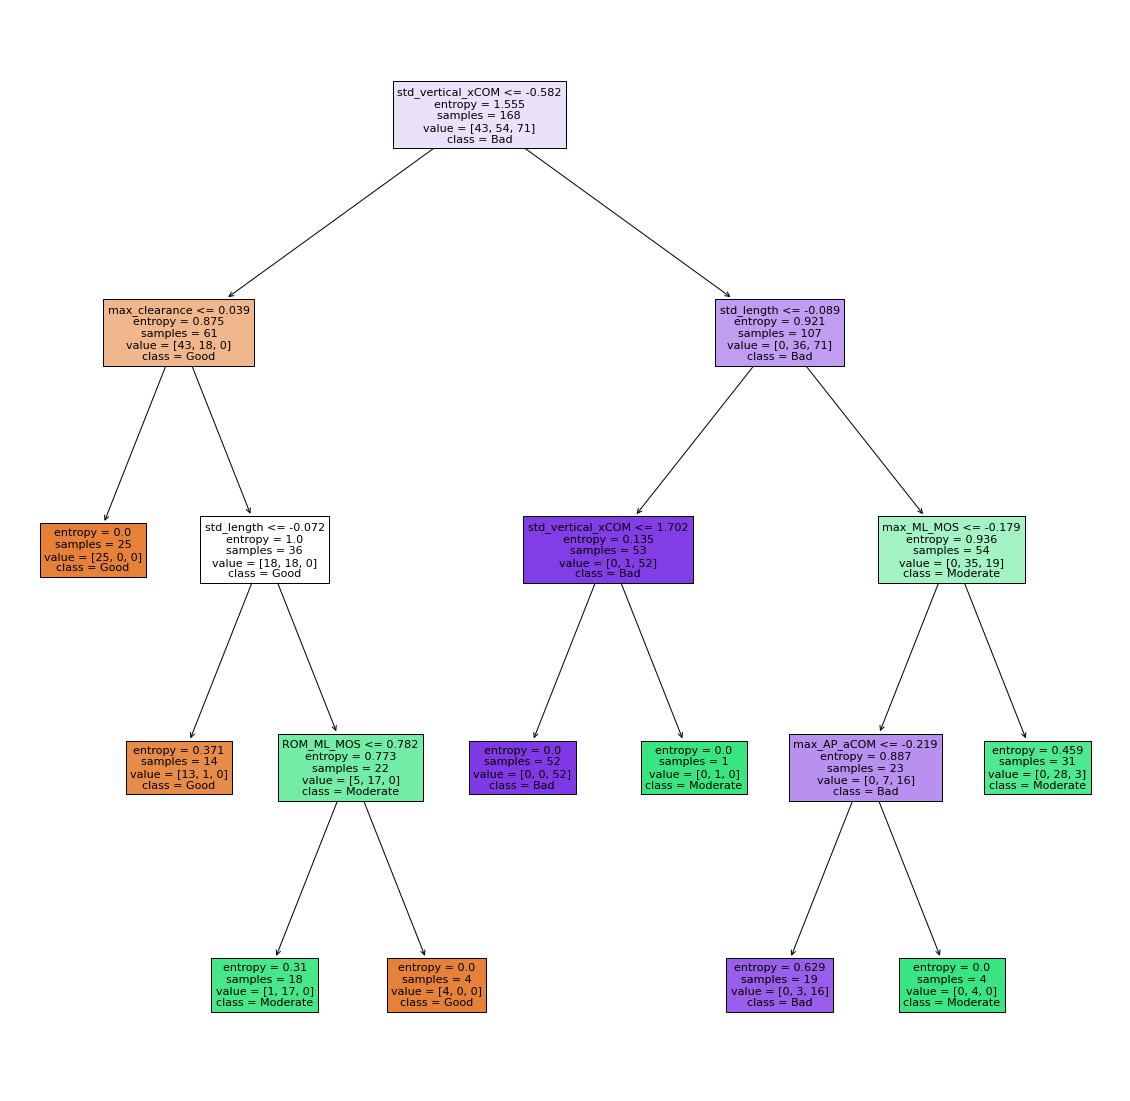

In [484]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_adv_DT_best_reg, 
              feature_names=list(spa_adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'max_ML_aCOM <= -0.183\ngini = 0.652\nsamples = 102\nvalue = [40, 60, 68]\nclass = Bad'),
 Text(279.0, 679.5, 'std_AP_COM <= 0.081\ngini = 0.469\nsamples = 59\nvalue = [3, 29, 62]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'std_vertical_COM <= 0.941\ngini = 0.196\nsamples = 36\nvalue = [2, 4, 50]\nclass = Bad'),
 Text(69.75, 135.89999999999998, 'gini = 0.108\nsamples = 34\nvalue = [2, 1, 50]\nclass = Bad'),
 Text(209.25, 135.89999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 3, 0]\nclass = Moderate'),
 Text(418.5, 407.70000000000005, 'max_ML_MOS <= -0.303\ngini = 0.467\nsamples = 23\nvalue = [1, 25, 12]\nclass = Moderate'),
 Text(348.75, 135.89999999999998, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 11]\nclass = Bad'),
 Text(488.25, 135.89999999999998, 'gini = 0.14\nsamples = 16\nvalue = [1, 25, 1]\nclass = Moderate'),
 Text(837.0, 679.5, 'std_AP_COM <= -0.276\ngini = 0.568\nsamples = 43\nvalue = [37, 31, 6]\nclass = Good'),
 Text(697.5, 407.70000

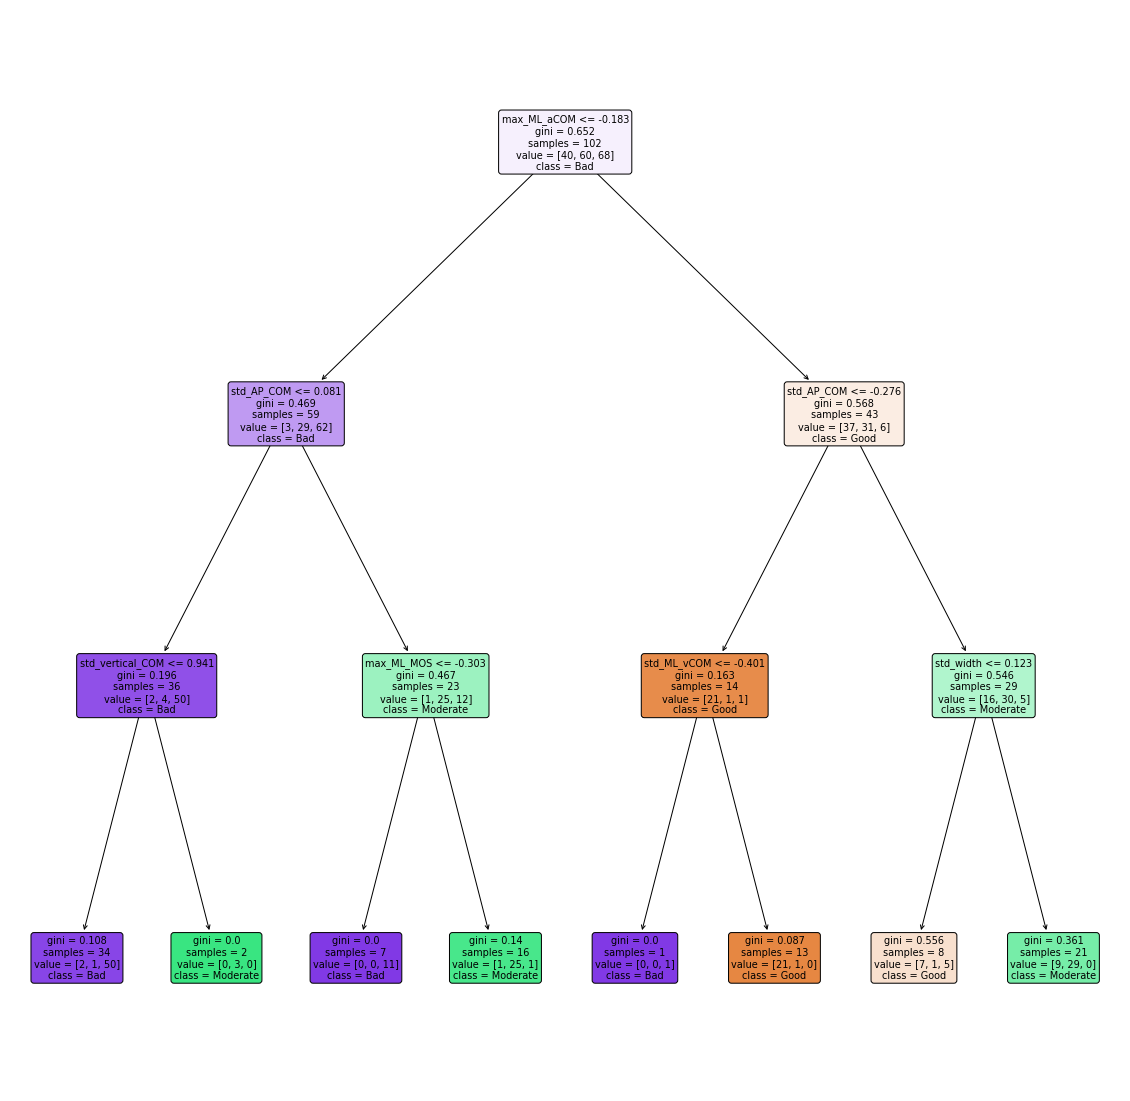

In [485]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_adv_RF_best_reg.estimators_[0], 
              feature_names=list(spa_adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [486]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [487]:
acc_3_t = accuracy_score(y_test.ravel(), spa_adv_SVC_best_reg.predict(spa_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_adv_SVC_best_reg.predict(spa_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_adv SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_adv SVC
acc: 0.849
recall: 0.822
precision: 0.847


Text(0.5, 1.0, 'SVC confusion matrix')

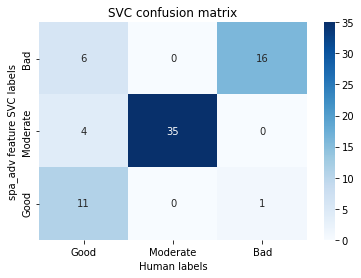

In [488]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_adv_SVC_best_reg.predict(spa_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_adv_SVC_best_reg.predict(spa_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_adv feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [489]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_adv feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_adv feature SVC Sensitivity: 
 Good prediction: 52.38095238095239 
 Moderate prediction 100.0 
 Bad prediction 94.11764705882352


In [490]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_adv feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_adv feature SVC Precision: 
 Good prediction: 91.66666666666666 
 Moderate prediction 89.74358974358975 
 Bad prediction 72.72727272727273


In [491]:
acc_3_t = accuracy_score(y_test.ravel(), spa_adv_DT_best_reg.predict(spa_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_adv_DT_best_reg.predict(spa_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_adv DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_adv DT
acc: 0.836
recall: 0.811
precision: 0.816


Text(0.5, 1.0, 'DT confusion matrix')

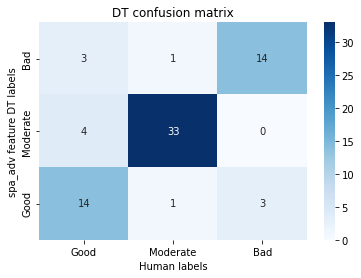

In [492]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_adv_DT_best_reg.predict(spa_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_adv_DT_best_reg.predict(spa_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_adv feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [493]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_adv feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_adv feature DT Sensitivity: 
 Good prediction: 66.66666666666666 
 Moderate prediction 94.28571428571428 
 Bad prediction 82.35294117647058


In [494]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_adv feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_adv feature DT Precision: 
 Good prediction: 77.77777777777779 
 Moderate prediction 89.1891891891892 
 Bad prediction 77.77777777777779


In [495]:
acc_3_t = accuracy_score(y_test.ravel(), spa_adv_RF_best_reg.predict(spa_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_adv_RF_best_reg.predict(spa_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_adv RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_adv RF
acc: 0.836
recall: 0.806
precision: 0.832


Text(0.5, 1.0, 'RF confusion matrix')

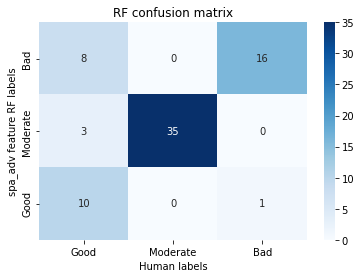

In [496]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_adv_RF_best_reg.predict(spa_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_adv_RF_best_reg.predict(spa_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_adv feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [497]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_adv feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_adv feature RF Sensitivity: 
 Good prediction: 47.61904761904761 
 Moderate prediction 100.0 
 Bad prediction 94.11764705882352


In [498]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_adv feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_adv feature RF Precision: 
 Good prediction: 90.9090909090909 
 Moderate prediction 92.10526315789474 
 Bad prediction 66.66666666666666


### cop adv features

In [499]:
cop_adv_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
cop_adv_SVC_grid_search.fit(cop_adv_x_train, y_train.ravel())
cop_adv_SVC_grid_search.best_params_

{'C': 3, 'degree': 2, 'kernel': 'linear', 'probability': True}

In [500]:
cop_adv_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
cop_adv_DT_grid_search.fit(cop_adv_x_train, y_train)
cop_adv_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 15}

In [501]:
cop_adv_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
cop_adv_RF_grid_search.fit(cop_adv_x_train, y_train)
cop_adv_RF_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 8, 'n_estimators': 300}

In [502]:
cop_adv_SVC_best_reg = cop_adv_SVC_grid_search.best_estimator_
cop_adv_DT_best_reg = cop_adv_DT_grid_search.best_estimator_
cop_adv_RF_best_reg = cop_adv_RF_grid_search.best_estimator_

In [503]:
cop_adv_SVC_best_reg.score(cop_adv_x_test, y_test.ravel())

0.7808219178082192

In [504]:
cop_adv_DT_best_reg.score(cop_adv_x_test, y_test.ravel())

0.7534246575342466

In [505]:
cop_adv_RF_best_reg.score(cop_adv_x_test, y_test.ravel())

0.7671232876712328

[Text(438.4285714285714, 996.6, 'std_vertical_xCOM <= -0.582\nentropy = 1.555\nsamples = 168\nvalue = [43, 54, 71]\nclass = Bad'),
 Text(239.1428571428571, 815.4000000000001, 'ROM_ML_MOS <= 0.705\nentropy = 0.875\nsamples = 61\nvalue = [43, 18, 0]\nclass = Good'),
 Text(159.42857142857142, 634.2, 'std_AP_vCOP <= -0.491\nentropy = 0.971\nsamples = 45\nvalue = [27, 18, 0]\nclass = Good'),
 Text(79.71428571428571, 453.0, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7, 0]\nclass = Moderate'),
 Text(239.1428571428571, 453.0, 'std_AP_xCOM <= 0.686\nentropy = 0.868\nsamples = 38\nvalue = [27, 11, 0]\nclass = Good'),
 Text(159.42857142857142, 271.79999999999995, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0, 0]\nclass = Good'),
 Text(318.85714285714283, 271.79999999999995, 'std_ML_COP <= 0.343\nentropy = 0.993\nsamples = 20\nvalue = [9, 11, 0]\nclass = Moderate'),
 Text(239.1428571428571, 90.59999999999991, 'entropy = 0.684\nsamples = 11\nvalue = [9, 2, 0]\nclass = Good'),
 Text(398.57142857142856,

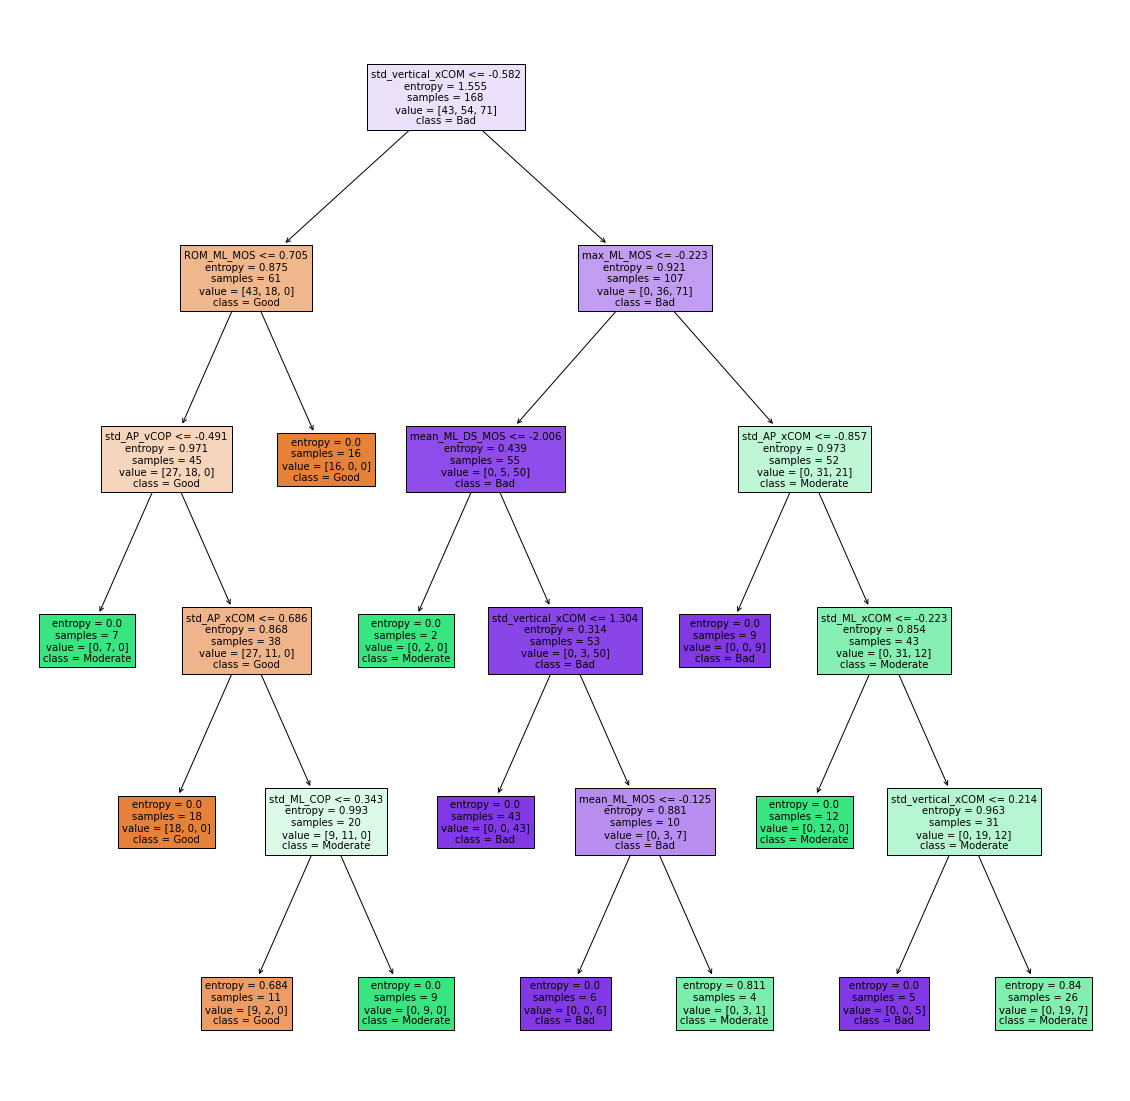

In [506]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(cop_adv_DT_best_reg, 
              feature_names=list(cop_adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(604.5, 951.3000000000001, 'std_vertical_xCOM <= -0.36\ngini = 0.641\nsamples = 111\nvalue = [38, 54, 76]\nclass = Bad'),
 Text(372.0, 679.5, 'std_vertical_xCOM <= -1.078\ngini = 0.464\nsamples = 41\nvalue = [38, 22, 0]\nclass = Good'),
 Text(186.0, 407.70000000000005, 'std_AP_IA <= -2.848\ngini = 0.165\nsamples = 14\nvalue = [20, 2, 0]\nclass = Good'),
 Text(93.0, 135.89999999999998, 'gini = 0.444\nsamples = 3\nvalue = [1, 2, 0]\nclass = Moderate'),
 Text(279.0, 135.89999999999998, 'gini = 0.0\nsamples = 11\nvalue = [19, 0, 0]\nclass = Good'),
 Text(558.0, 407.70000000000005, 'std_ML_xCOM <= -1.15\ngini = 0.499\nsamples = 27\nvalue = [18, 20, 0]\nclass = Moderate'),
 Text(465.0, 135.89999999999998, 'gini = 0.26\nsamples = 10\nvalue = [11, 2, 0]\nclass = Good'),
 Text(651.0, 135.89999999999998, 'gini = 0.403\nsamples = 17\nvalue = [7, 18, 0]\nclass = Moderate'),
 Text(837.0, 679.5, 'std_ML_xCOM <= -0.609\ngini = 0.417\nsamples = 70\nvalue = [0, 32, 76]\nclass = Bad'),
 Text(744.0,

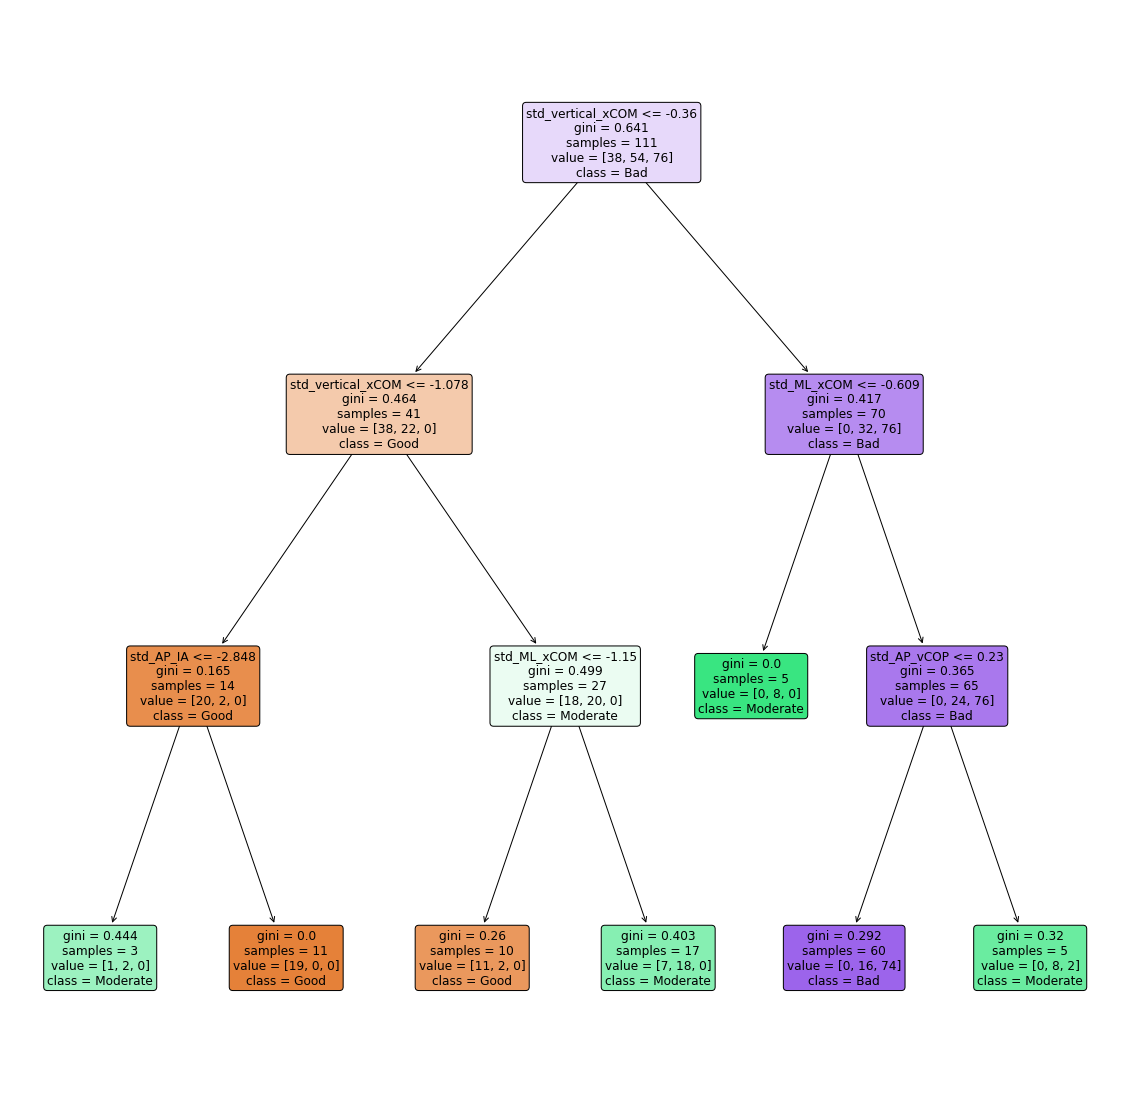

In [507]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(cop_adv_RF_best_reg.estimators_[0], 
              feature_names=list(cop_adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [508]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [509]:
acc_3_t = accuracy_score(y_test.ravel(), cop_adv_SVC_best_reg.predict(cop_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), cop_adv_SVC_best_reg.predict(cop_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("cop_adv SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

cop_adv SVC
acc: 0.781
recall: 0.764
precision: 0.753


Text(0.5, 1.0, 'SVC confusion matrix')

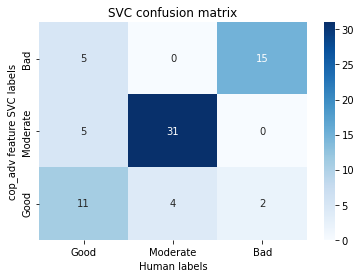

In [510]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), cop_adv_SVC_best_reg.predict(cop_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), cop_adv_SVC_best_reg.predict(cop_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('cop_adv feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [511]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("cop_adv feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

cop_adv feature SVC Sensitivity: 
 Good prediction: 52.38095238095239 
 Moderate prediction 88.57142857142857 
 Bad prediction 88.23529411764706


In [512]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("cop_adv feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


cop_adv feature SVC Precision: 
 Good prediction: 64.70588235294117 
 Moderate prediction 86.11111111111111 
 Bad prediction 75.0


In [513]:
acc_3_t = accuracy_score(y_test.ravel(), cop_adv_DT_best_reg.predict(cop_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), cop_adv_DT_best_reg.predict(cop_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("cop_adv DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

cop_adv DT
acc: 0.753
recall: 0.744
precision: 0.736


Text(0.5, 1.0, 'DT confusion matrix')

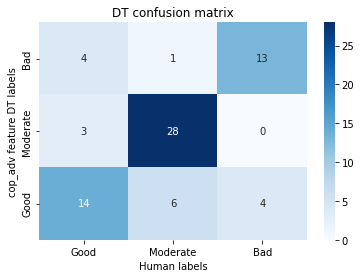

In [514]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), cop_adv_DT_best_reg.predict(cop_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), cop_adv_DT_best_reg.predict(cop_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('cop_adv feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [515]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("cop_adv feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

cop_adv feature DT Sensitivity: 
 Good prediction: 66.66666666666666 
 Moderate prediction 80.0 
 Bad prediction 76.47058823529412


In [516]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("cop_adv feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


cop_adv feature DT Precision: 
 Good prediction: 58.333333333333336 
 Moderate prediction 90.32258064516128 
 Bad prediction 72.22222222222221


In [517]:
acc_3_t = accuracy_score(y_test.ravel(), cop_adv_RF_best_reg.predict(cop_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), cop_adv_RF_best_reg.predict(cop_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("cop_adv RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

cop_adv RF
acc: 0.767
recall: 0.723
precision: 0.743


Text(0.5, 1.0, 'RF confusion matrix')

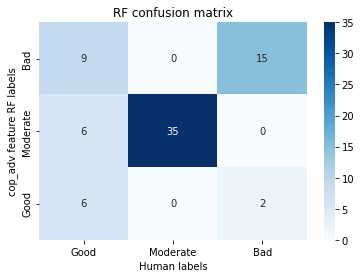

In [518]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), cop_adv_RF_best_reg.predict(cop_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), cop_adv_RF_best_reg.predict(cop_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('cop_adv feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [519]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("cop_adv feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

cop_adv feature RF Sensitivity: 
 Good prediction: 28.57142857142857 
 Moderate prediction 100.0 
 Bad prediction 88.23529411764706


In [520]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("cop_adv feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


cop_adv feature RF Precision: 
 Good prediction: 75.0 
 Moderate prediction 85.36585365853658 
 Bad prediction 62.5


### kinematic features

In [521]:
kine_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
kine_SVC_grid_search.fit(kine_x_train, y_train.ravel())
kine_SVC_grid_search.best_params_

{'C': 2, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [522]:
kine_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
kine_DT_grid_search.fit(kine_x_train, y_train)
kine_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 9}

In [523]:
kine_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
kine_RF_grid_search.fit(kine_x_train, y_train)
kine_RF_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 15,
 'n_estimators': 200}

In [524]:
kine_SVC_best_reg = kine_SVC_grid_search.best_estimator_
kine_DT_best_reg = kine_DT_grid_search.best_estimator_
kine_RF_best_reg = kine_RF_grid_search.best_estimator_

In [525]:
kine_SVC_best_reg.score(kine_x_test, y_test.ravel())

0.8904109589041096

In [526]:
kine_DT_best_reg.score(kine_x_test, y_test.ravel())

0.8356164383561644

In [527]:
kine_RF_best_reg.score(kine_x_test, y_test.ravel())

0.8493150684931506

[Text(472.15384615384613, 978.48, 'std_vertical_xCOM <= -0.582\nentropy = 1.555\nsamples = 168\nvalue = [43, 54, 71]\nclass = Bad'),
 Text(171.69230769230768, 761.0400000000001, 'max_clearance <= 0.039\nentropy = 0.875\nsamples = 61\nvalue = [43, 18, 0]\nclass = Good'),
 Text(85.84615384615384, 543.6, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0, 0]\nclass = Good'),
 Text(257.53846153846155, 543.6, 'std_length <= -0.072\nentropy = 1.0\nsamples = 36\nvalue = [18, 18, 0]\nclass = Good'),
 Text(171.69230769230768, 326.1600000000001, 'entropy = 0.371\nsamples = 14\nvalue = [13, 1, 0]\nclass = Good'),
 Text(343.38461538461536, 326.1600000000001, 'ROM_ML_MOS <= 0.782\nentropy = 0.773\nsamples = 22\nvalue = [5, 17, 0]\nclass = Moderate'),
 Text(257.53846153846155, 108.72000000000003, 'entropy = 0.31\nsamples = 18\nvalue = [1, 17, 0]\nclass = Moderate'),
 Text(429.23076923076917, 108.72000000000003, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0, 0]\nclass = Good'),
 Text(772.6153846153845, 761.04

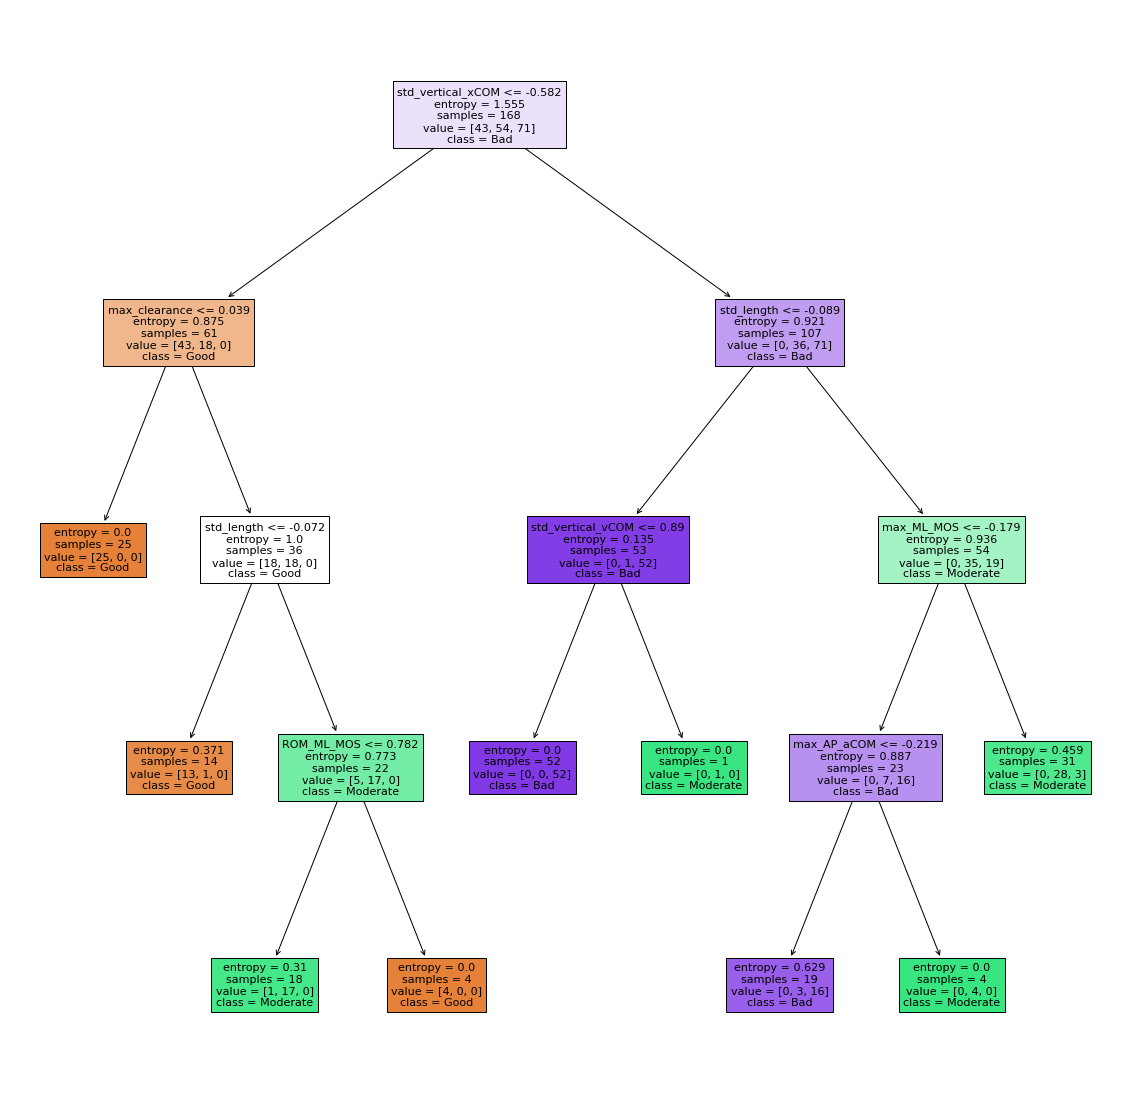

In [528]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(kine_DT_best_reg, 
              feature_names=list(kine_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'std_vertical_xCOM <= -0.451\ngini = 0.647\nsamples = 107\nvalue = [41, 53, 74]\nclass = Bad'),
 Text(279.0, 679.5, 'max_AP_vCOM <= -0.664\ngini = 0.455\nsamples = 38\nvalue = [41, 22, 0]\nclass = Good'),
 Text(139.5, 407.70000000000005, 'std_vertical_COM <= 1.105\ngini = 0.278\nsamples = 3\nvalue = [1, 5, 0]\nclass = Moderate'),
 Text(69.75, 135.89999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 5, 0]\nclass = Moderate'),
 Text(209.25, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = Good'),
 Text(418.5, 407.70000000000005, 'max_clearance <= 0.06\ngini = 0.419\nsamples = 35\nvalue = [40, 17, 0]\nclass = Good'),
 Text(348.75, 135.89999999999998, 'gini = 0.0\nsamples = 14\nvalue = [23, 0, 0]\nclass = Good'),
 Text(488.25, 135.89999999999998, 'gini = 0.5\nsamples = 21\nvalue = [17, 17, 0]\nclass = Good'),
 Text(837.0, 679.5, 'std_vertical_COM <= 0.858\ngini = 0.416\nsamples = 69\nvalue = [0, 31, 74]\nclass = Bad'),
 Text(697.5, 4

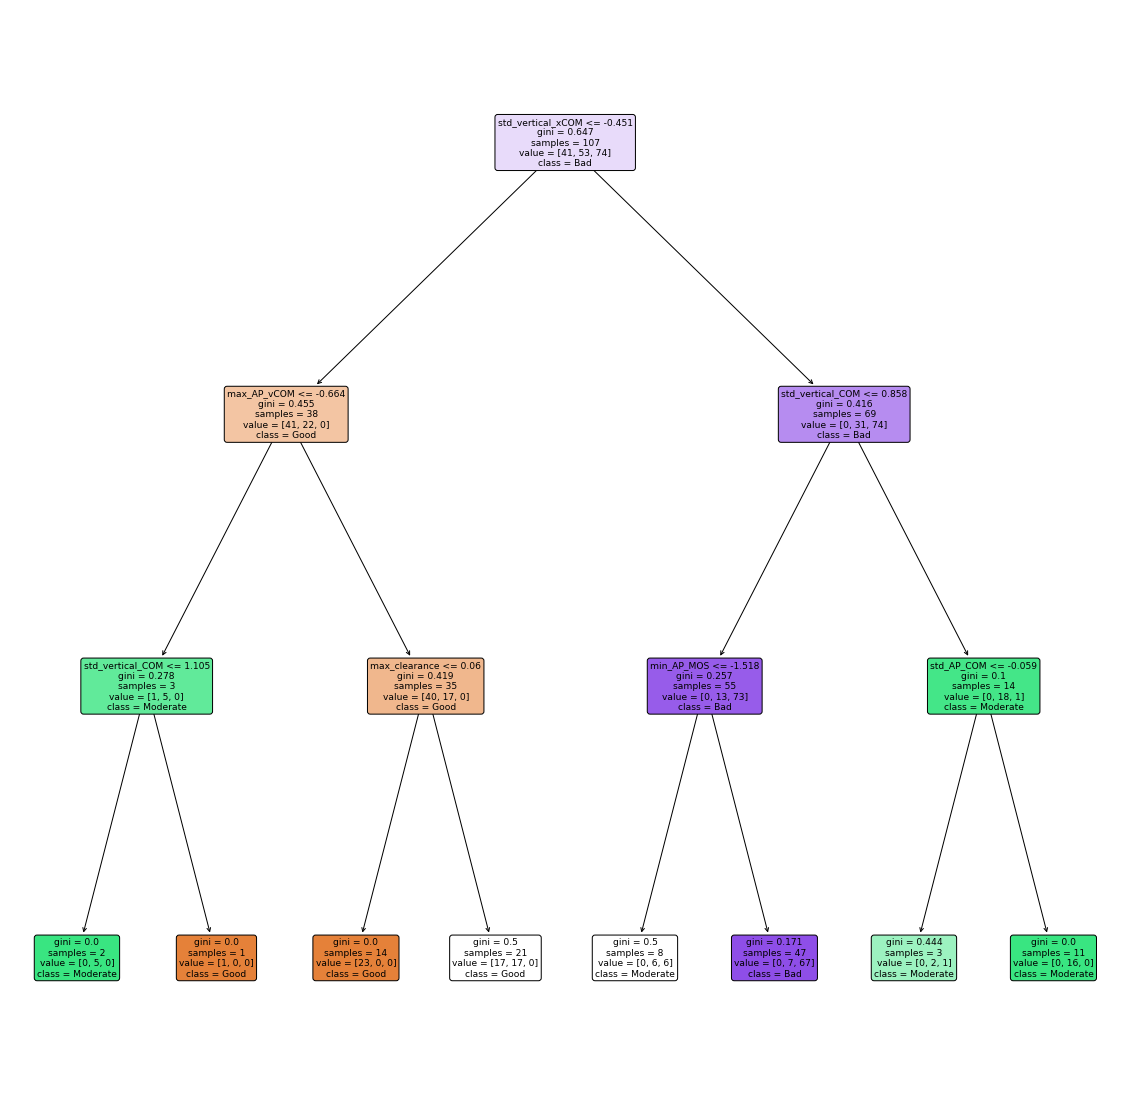

In [529]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(kine_RF_best_reg.estimators_[0], 
              feature_names=list(kine_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [530]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [531]:
acc_3_t = accuracy_score(y_test.ravel(), kine_SVC_best_reg.predict(kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), kine_SVC_best_reg.predict(kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("kine SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

kine SVC
acc: 0.89
recall: 0.869
precision: 0.88


Text(0.5, 1.0, 'SVC confusion matrix')

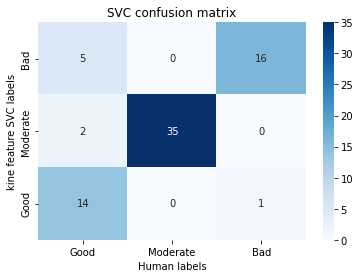

In [532]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), kine_SVC_best_reg.predict(kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), kine_SVC_best_reg.predict(kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('kine feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [533]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("kine feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

kine feature SVC Sensitivity: 
 Good prediction: 66.66666666666666 
 Moderate prediction 100.0 
 Bad prediction 94.11764705882352


In [534]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("kine feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


kine feature SVC Precision: 
 Good prediction: 93.33333333333333 
 Moderate prediction 94.5945945945946 
 Bad prediction 76.19047619047619


In [535]:
acc_3_t = accuracy_score(y_test.ravel(), kine_DT_best_reg.predict(kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), kine_DT_best_reg.predict(kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("kine DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

kine DT
acc: 0.836
recall: 0.811
precision: 0.816


Text(0.5, 1.0, 'DT confusion matrix')

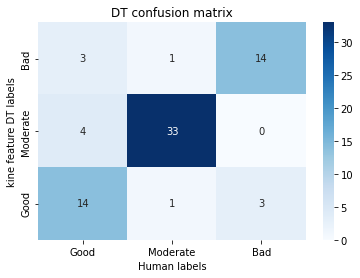

In [536]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), kine_DT_best_reg.predict(kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), kine_DT_best_reg.predict(kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('kine feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [537]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("kine feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

kine feature DT Sensitivity: 
 Good prediction: 66.66666666666666 
 Moderate prediction 94.28571428571428 
 Bad prediction 82.35294117647058


In [538]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("kine feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


kine feature DT Precision: 
 Good prediction: 77.77777777777779 
 Moderate prediction 89.1891891891892 
 Bad prediction 77.77777777777779


In [539]:
acc_3_t = accuracy_score(y_test.ravel(), kine_RF_best_reg.predict(kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), kine_RF_best_reg.predict(kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("kine RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

kine RF
acc: 0.849
recall: 0.822
precision: 0.844


Text(0.5, 1.0, 'RF confusion matrix')

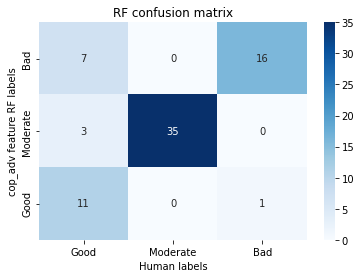

In [540]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), kine_RF_best_reg.predict(kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), kine_RF_best_reg.predict(kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('cop_adv feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [541]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("kine feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

kine feature RF Sensitivity: 
 Good prediction: 52.38095238095239 
 Moderate prediction 100.0 
 Bad prediction 94.11764705882352


In [542]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("kine feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


kine feature RF Precision: 
 Good prediction: 91.66666666666666 
 Moderate prediction 92.10526315789474 
 Bad prediction 69.56521739130434


### non kinematic features

In [543]:
non_kine_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
non_kine_SVC_grid_search.fit(non_kine_x_train, y_train.ravel())
non_kine_SVC_grid_search.best_params_

{'C': 3, 'degree': 2, 'kernel': 'linear', 'probability': True}

In [544]:
non_kine_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
non_kine_DT_grid_search.fit(non_kine_x_train, y_train)
non_kine_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 9}

In [545]:
non_kine_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
non_kine_RF_grid_search.fit(non_kine_x_train, y_train)
non_kine_RF_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 8,
 'n_estimators': 200}

In [546]:
non_kine_SVC_best_reg = non_kine_SVC_grid_search.best_estimator_
non_kine_DT_best_reg = non_kine_DT_grid_search.best_estimator_
non_kine_RF_best_reg = non_kine_RF_grid_search.best_estimator_

In [547]:
non_kine_SVC_best_reg.score(non_kine_x_test, y_test.ravel())

0.6164383561643836

In [548]:
non_kine_DT_best_reg.score(non_kine_x_test, y_test.ravel())

0.6712328767123288

In [549]:
non_kine_RF_best_reg.score(non_kine_x_test, y_test.ravel())

0.6027397260273972

[Text(643.8461538461538, 978.48, 'std_AP_aCOP <= -0.184\nentropy = 1.555\nsamples = 168\nvalue = [43, 54, 71]\nclass = Bad'),
 Text(429.23076923076917, 761.0400000000001, 'std_AP_IA <= 0.345\nentropy = 1.252\nsamples = 96\nvalue = [8, 29, 59]\nclass = Bad'),
 Text(257.53846153846155, 543.6, 'std_AP_IA <= -1.091\nentropy = 1.071\nsamples = 78\nvalue = [4, 19, 55]\nclass = Bad'),
 Text(171.69230769230768, 326.1600000000001, 'max_AP_vCOP <= -0.263\nentropy = 1.436\nsamples = 9\nvalue = [2, 5, 2]\nclass = Moderate'),
 Text(85.84615384615384, 108.72000000000003, 'entropy = 0.863\nsamples = 7\nvalue = [0, 5, 2]\nclass = Moderate'),
 Text(257.53846153846155, 108.72000000000003, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = Good'),
 Text(343.38461538461536, 326.1600000000001, 'entropy = 0.907\nsamples = 69\nvalue = [2, 14, 53]\nclass = Bad'),
 Text(600.9230769230769, 543.6, 'max_AP_vCOP <= -0.169\nentropy = 1.436\nsamples = 18\nvalue = [4, 10, 4]\nclass = Moderate'),
 Text(515.076923

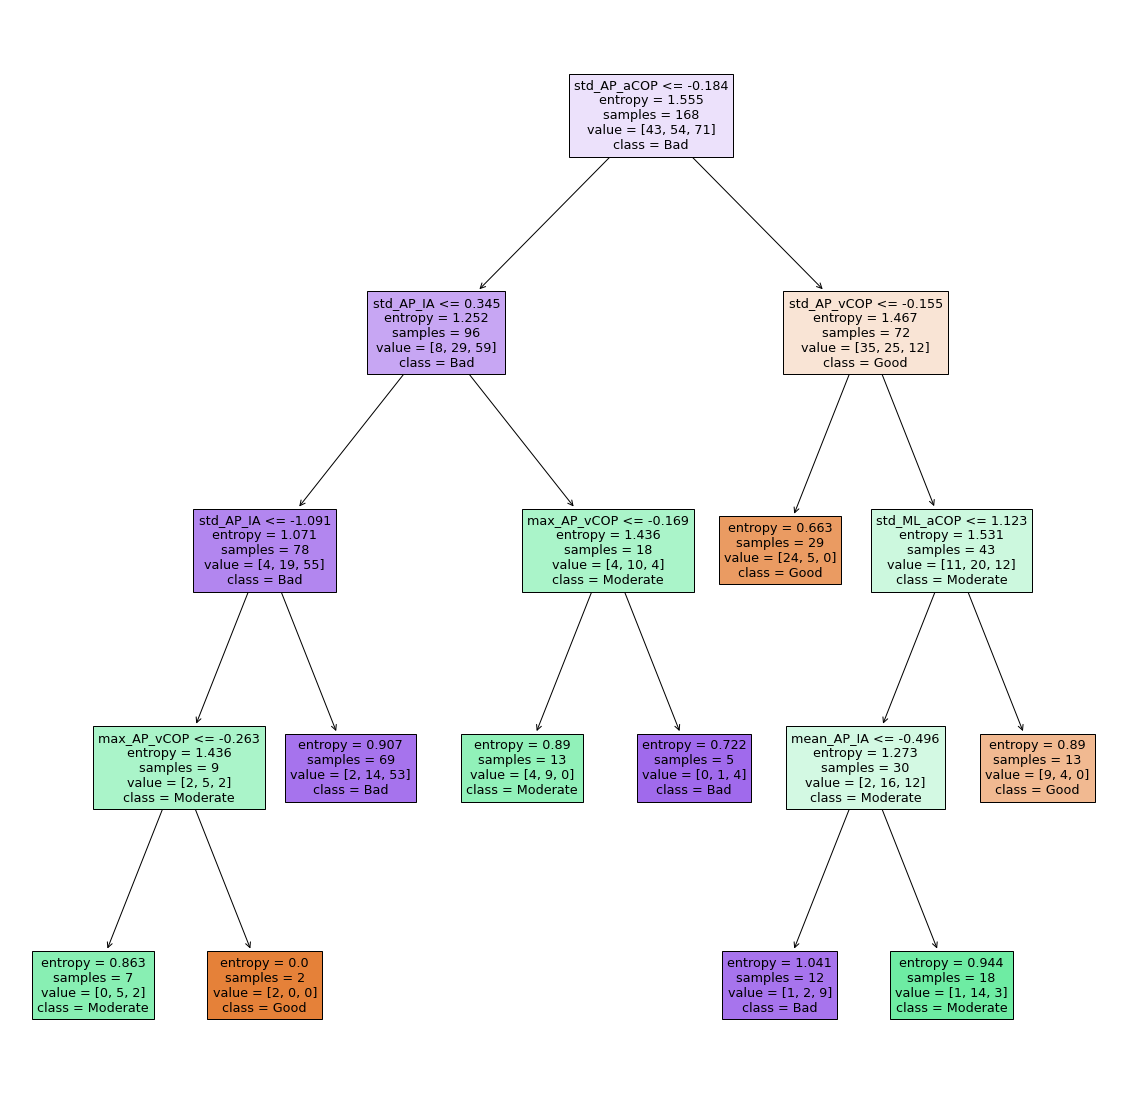

In [550]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(non_kine_DT_best_reg, 
              feature_names=list(non_kine_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(472.15384615384613, 951.3000000000001, 'mean_AP_IA <= -0.591\nentropy = 1.526\nsamples = 108\nvalue = [38, 53, 77]\nclass = Bad'),
 Text(171.69230769230768, 679.5, 'mean_AP_IA <= -0.808\nentropy = 0.852\nsamples = 11\nvalue = [5, 0, 13]\nclass = Bad'),
 Text(85.84615384615384, 407.70000000000005, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 5]\nclass = Bad'),
 Text(257.53846153846155, 407.70000000000005, 'std_AP_COP <= 0.369\nentropy = 0.961\nsamples = 9\nvalue = [5, 0, 8]\nclass = Bad'),
 Text(171.69230769230768, 135.89999999999998, 'entropy = 0.918\nsamples = 3\nvalue = [4, 0, 2]\nclass = Good'),
 Text(343.38461538461536, 135.89999999999998, 'entropy = 0.592\nsamples = 6\nvalue = [1, 0, 6]\nclass = Bad'),
 Text(772.6153846153845, 679.5, 'std_AP_aCOP <= -0.184\nentropy = 1.535\nsamples = 97\nvalue = [33, 53, 64]\nclass = Bad'),
 Text(600.9230769230769, 407.70000000000005, 'mean_AP_IA <= 0.057\nentropy = 1.149\nsamples = 57\nvalue = [4, 28, 55]\nclass = Bad'),
 Text(515.0769230769

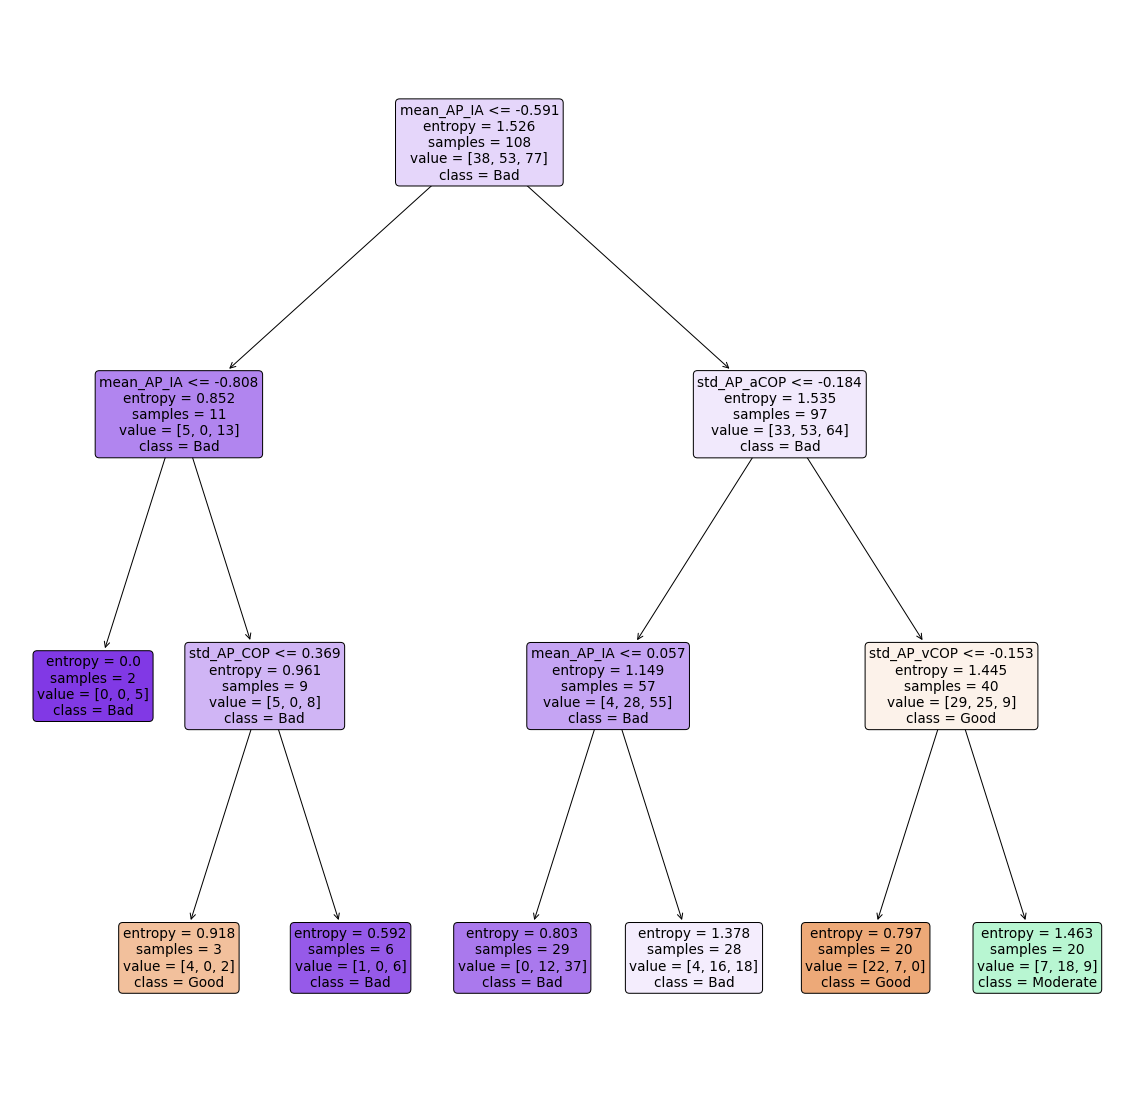

In [551]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(non_kine_RF_best_reg.estimators_[0], 
              feature_names=list(non_kine_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [552]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [553]:
acc_3_t = accuracy_score(y_test.ravel(), non_kine_SVC_best_reg.predict(non_kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), non_kine_SVC_best_reg.predict(non_kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("non_kine SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

non_kine SVC
acc: 0.616
recall: 0.581
precision: 0.552


Text(0.5, 1.0, 'SVC confusion matrix')

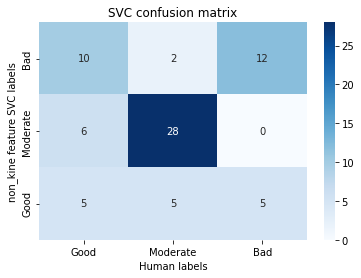

In [554]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), non_kine_SVC_best_reg.predict(non_kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), non_kine_SVC_best_reg.predict(non_kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('non_kine feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [555]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("non_kine feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

non_kine feature SVC Sensitivity: 
 Good prediction: 23.809523809523807 
 Moderate prediction 80.0 
 Bad prediction 70.58823529411765


In [556]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("non_kine feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


non_kine feature SVC Precision: 
 Good prediction: 33.33333333333333 
 Moderate prediction 82.35294117647058 
 Bad prediction 50.0


In [557]:
acc_3_t = accuracy_score(y_test.ravel(), non_kine_DT_best_reg.predict(non_kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), non_kine_DT_best_reg.predict(non_kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("non_kine DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

non_kine DT
acc: 0.671
recall: 0.651
precision: 0.646


Text(0.5, 1.0, 'DT confusion matrix')

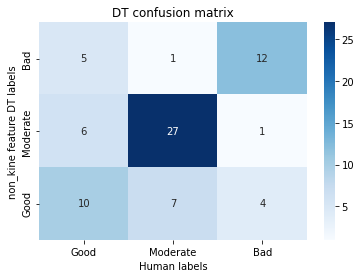

In [558]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), non_kine_DT_best_reg.predict(non_kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), non_kine_DT_best_reg.predict(non_kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('non_kine feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [559]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("non_kine feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

non_kine feature DT Sensitivity: 
 Good prediction: 47.61904761904761 
 Moderate prediction 77.14285714285715 
 Bad prediction 70.58823529411765


In [560]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("non_kine feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


non_kine feature DT Precision: 
 Good prediction: 47.61904761904761 
 Moderate prediction 79.41176470588235 
 Bad prediction 66.66666666666666


In [561]:
acc_3_t = accuracy_score(y_test.ravel(), non_kine_RF_best_reg.predict(non_kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), non_kine_RF_best_reg.predict(non_kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("non_kine RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

non_kine RF
acc: 0.603
recall: 0.554
precision: 0.562


Text(0.5, 1.0, 'RF confusion matrix')

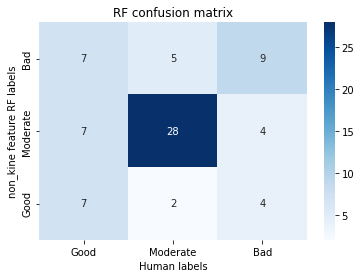

In [562]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), non_kine_RF_best_reg.predict(non_kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), non_kine_RF_best_reg.predict(non_kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('non_kine feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [563]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("non_kine feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

non_kine feature RF Sensitivity: 
 Good prediction: 33.33333333333333 
 Moderate prediction 80.0 
 Bad prediction 52.94117647058824


In [564]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("non_kine feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


non_kine feature RF Precision: 
 Good prediction: 53.84615384615385 
 Moderate prediction 71.7948717948718 
 Bad prediction 42.857142857142854


In [565]:
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn import metrics

In [566]:
onehotencoder = OneHotEncoder()
onehot_targets = onehotencoder.fit_transform(y_test.reshape(-1, 1)).toarray()
targets_bad = onehot_targets[:,0]

In [567]:
targets_bad

array([1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.])

In [568]:
all_predictions = all_RF_best_reg.predict_proba(all_x_test)
all_predictions_bad = all_predictions[:,0]

spa_predictions = spa_RF_best_reg.predict_proba(spa_x_test)
spa_predictions_bad = spa_predictions[:,0]

cop_predictions = COP_RF_best_reg.predict_proba(cop_x_test)
cop_predictions_bad = cop_predictions[:,0]

adv_predictions = adv_RF_best_reg.predict_proba(adv_x_test)
adv_predictions_bad = adv_predictions[:,0]

spa_cop_predictions = spa_cop_RF_best_reg.predict_proba(spa_cop_x_test)
spa_cop_predictions_bad = spa_cop_predictions[:,0]

spa_adv_predictions = spa_adv_RF_best_reg.predict_proba(spa_adv_x_test)
spa_adv_predictions_bad = spa_adv_predictions[:,0]

cop_adv_predictions = cop_adv_RF_best_reg.predict_proba(cop_adv_x_test)
cop_adv_predictions_bad = cop_adv_predictions[:,0]

kine_predictions = kine_RF_best_reg.predict_proba(kine_x_test)
kine_predictions_bad = kine_predictions[:,0]

non_kine_predictions = non_kine_RF_best_reg.predict_proba(non_kine_x_test)
non_kine_predictions_bad = non_kine_predictions[:,0]

In [569]:
all_fpr, all_tpr, all_thresholds = roc_curve(targets_bad, all_predictions_bad)
spa_fpr, spa_tpr, spa_thresholds = roc_curve(targets_bad, spa_predictions_bad)
cop_fpr, cop_tpr, cop_thresholds = roc_curve(targets_bad, cop_predictions_bad)
adv_fpr, adv_tpr, adv_thresholds = roc_curve(targets_bad, adv_predictions_bad)
spa_cop_fpr, spa_cop_tpr, spa_cop_thresholds = roc_curve(targets_bad, spa_cop_predictions_bad)
spa_adv_fpr, spa_adv_tpr, spa_adv_thresholds = roc_curve(targets_bad, spa_adv_predictions_bad)
cop_adv_fpr, cop_adv_tpr, cop_adv_thresholds = roc_curve(targets_bad, cop_adv_predictions_bad)
kine_fpr, kine_tpr, kine_thresholds = roc_curve(targets_bad, kine_predictions_bad)
non_kine_fpr, non_kine_tpr, non_kine_thresholds = roc_curve(targets_bad, non_kine_predictions_bad)

In [570]:
all_auc = metrics.auc(all_fpr, all_tpr)
spa_auc = metrics.auc(spa_fpr, spa_tpr)
cop_auc = metrics.auc(cop_fpr, cop_tpr)
adv_auc = metrics.auc(adv_fpr, adv_tpr)
spa_cop_auc = metrics.auc(spa_adv_fpr, spa_adv_tpr)
spa_adv_auc = metrics.auc(spa_adv_fpr, spa_adv_tpr)
cop_adv_auc = metrics.auc(cop_adv_fpr, cop_adv_tpr)
kine_auc = metrics.auc(kine_fpr, kine_tpr)
non_kine_auc = metrics.auc(non_kine_fpr, non_kine_tpr)

Text(0.5, 1.0, 'RF')

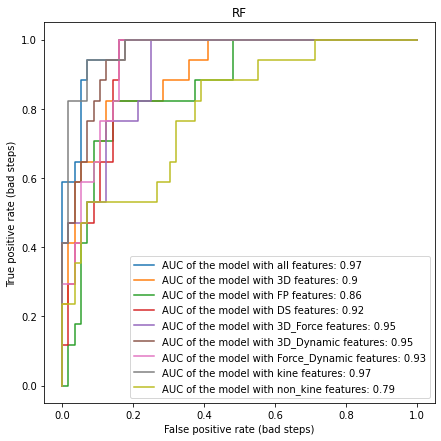

In [571]:
all_label = "AUC of the model with all features: " + str(round(all_auc, 2))
spa_label = "AUC of the model with 3D features: " + str(round(spa_auc, 2))
cop_label = "AUC of the model with FP features: " + str(round(cop_auc, 2))
adv_label = "AUC of the model with DS features: " + str(round(adv_auc, 2))
spa_cop_label = "AUC of the model with 3D_Force features: " + str(round(spa_cop_auc, 2))
spa_adv_label = "AUC of the model with 3D_Dynamic features: " + str(round(spa_adv_auc, 2))
cop_adv_label = "AUC of the model with Force_Dynamic features: " + str(round(cop_adv_auc, 2))
kine_label = "AUC of the model with kine features: " + str(round(kine_auc, 2))
non_kine_label = "AUC of the model with non_kine features: " + str(round(non_kine_auc, 2))

figure = plt.figure(figsize = (7,7))
plt.plot(all_fpr,all_tpr,  label = all_label)
plt.plot(spa_fpr,spa_tpr,  label = spa_label)
plt.plot(cop_fpr,cop_tpr,  label = cop_label)
plt.plot(adv_fpr,adv_tpr,  label = adv_label)
plt.plot(spa_cop_fpr,spa_cop_tpr,  label = spa_cop_label)
plt.plot(spa_adv_fpr,spa_adv_tpr,  label = spa_adv_label)
plt.plot(cop_adv_fpr,cop_adv_tpr,  label = cop_adv_label)
plt.plot(kine_fpr,kine_tpr,  label = kine_label)
plt.plot(non_kine_fpr,non_kine_tpr,  label = non_kine_label)


plt.legend(loc = "lower right")
plt.xlabel("False positive rate (bad steps)")
plt.ylabel("True positive rate (bad steps)")
plt.title("RF")

In [572]:
all_predictions = all_DT_best_reg.predict_proba(all_x_test)
all_predictions_bad = all_predictions[:,0]

spa_predictions = spa_DT_best_reg.predict_proba(spa_x_test)
spa_predictions_bad = spa_predictions[:,0]

cop_predictions = COP_DT_best_reg.predict_proba(cop_x_test)
cop_predictions_bad = cop_predictions[:,0]

adv_predictions = adv_DT_best_reg.predict_proba(adv_x_test)
adv_predictions_bad = adv_predictions[:,0]

spa_cop_predictions = spa_cop_DT_best_reg.predict_proba(spa_cop_x_test)
spa_cop_predictions_bad = spa_cop_predictions[:,0]

spa_adv_predictions = spa_adv_DT_best_reg.predict_proba(spa_adv_x_test)
spa_adv_predictions_bad = spa_adv_predictions[:,0]

cop_adv_predictions = cop_adv_DT_best_reg.predict_proba(cop_adv_x_test)
cop_adv_predictions_bad = cop_adv_predictions[:,0]

kine_predictions = kine_DT_best_reg.predict_proba(kine_x_test)
kine_predictions_bad = kine_predictions[:,0]

non_kine_predictions = non_kine_DT_best_reg.predict_proba(non_kine_x_test)
non_kine_predictions_bad = non_kine_predictions[:,0]

In [573]:
all_fpr, all_tpr, all_thresholds = roc_curve(targets_bad, all_predictions_bad)
spa_fpr, spa_tpr, spa_thresholds = roc_curve(targets_bad, spa_predictions_bad)
cop_fpr, cop_tpr, cop_thresholds = roc_curve(targets_bad, cop_predictions_bad)
adv_fpr, adv_tpr, adv_thresholds = roc_curve(targets_bad, adv_predictions_bad)
spa_cop_fpr, spa_cop_tpr, spa_cop_thresholds = roc_curve(targets_bad, spa_cop_predictions_bad)
spa_adv_fpr, spa_adv_tpr, spa_adv_thresholds = roc_curve(targets_bad, spa_adv_predictions_bad)
cop_adv_fpr, cop_adv_tpr, cop_adv_thresholds = roc_curve(targets_bad, cop_adv_predictions_bad)
kine_fpr, kine_tpr, kine_thresholds = roc_curve(targets_bad, kine_predictions_bad)
non_kine_fpr, non_kine_tpr, non_kine_thresholds = roc_curve(targets_bad, non_kine_predictions_bad)

In [574]:
all_auc = metrics.auc(all_fpr, all_tpr)
spa_auc = metrics.auc(spa_fpr, spa_tpr)
cop_auc = metrics.auc(cop_fpr, cop_tpr)
adv_auc = metrics.auc(adv_fpr, adv_tpr)
spa_cop_auc = metrics.auc(spa_adv_fpr, spa_adv_tpr)
spa_adv_auc = metrics.auc(spa_adv_fpr, spa_adv_tpr)
cop_adv_auc = metrics.auc(cop_adv_fpr, cop_adv_tpr)
kine_auc = metrics.auc(kine_fpr, kine_tpr)
non_kine_auc = metrics.auc(non_kine_fpr, non_kine_tpr)

Text(0.5, 1.0, 'DT')

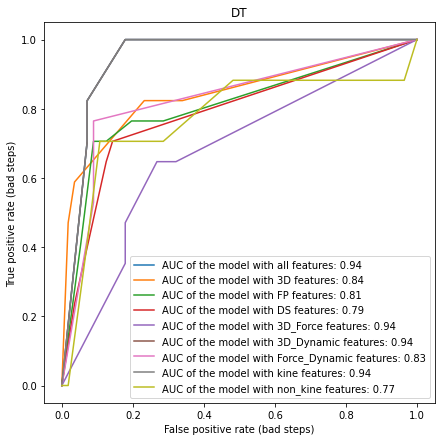

In [575]:
all_label = "AUC of the model with all features: " + str(round(all_auc, 2))
spa_label = "AUC of the model with 3D features: " + str(round(spa_auc, 2))
cop_label = "AUC of the model with FP features: " + str(round(cop_auc, 2))
adv_label = "AUC of the model with DS features: " + str(round(adv_auc, 2))
spa_cop_label = "AUC of the model with 3D_Force features: " + str(round(spa_cop_auc, 2))
spa_adv_label = "AUC of the model with 3D_Dynamic features: " + str(round(spa_adv_auc, 2))
cop_adv_label = "AUC of the model with Force_Dynamic features: " + str(round(cop_adv_auc, 2))
kine_label = "AUC of the model with kine features: " + str(round(kine_auc, 2))
non_kine_label = "AUC of the model with non_kine features: " + str(round(non_kine_auc, 2))

figure = plt.figure(figsize = (7,7))
plt.plot(all_fpr,all_tpr,  label = all_label)
plt.plot(spa_fpr,spa_tpr,  label = spa_label)
plt.plot(cop_fpr,cop_tpr,  label = cop_label)
plt.plot(adv_fpr,adv_tpr,  label = adv_label)
plt.plot(spa_cop_fpr,spa_cop_tpr,  label = spa_cop_label)
plt.plot(spa_adv_fpr,spa_adv_tpr,  label = spa_adv_label)
plt.plot(cop_adv_fpr,cop_adv_tpr,  label = cop_adv_label)
plt.plot(kine_fpr,kine_tpr,  label = kine_label)
plt.plot(non_kine_fpr,non_kine_tpr,  label = non_kine_label)


plt.legend(loc = "lower right")
plt.xlabel("False positive rate (bad steps)")
plt.ylabel("True positive rate (bad steps)")
plt.title("DT")

Text(0.5, 0, 'important')

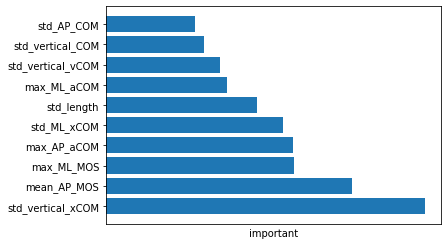

In [576]:
importance = all_RF_best_reg.feature_importances_
features = all_input_df.columns
importance_df = pd.DataFrame({"importance":importance,
                              "features":features
                             })
importance_sorted_df = importance_df.sort_values("importance", ascending = 0)
importance_sorted_df
feature_pos = [1,2,3,4,5,6,7,8,9,10]
plt.barh( feature_pos, importance_sorted_df["importance"].head(10),align='center')
plt.yticks(feature_pos, labels = importance_sorted_df["features"].head(10))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.xlabel("important")

Text(0.5, 0, 'important')

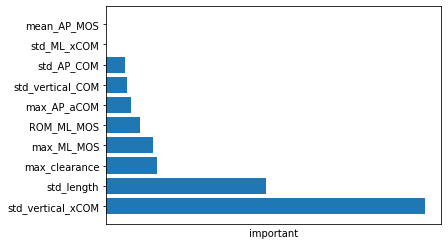

In [577]:
importance = all_DT_best_reg.feature_importances_
features = all_input_df.columns
importance_df = pd.DataFrame({"importance":importance,
                              "features":features
                             })
importance_sorted_df = importance_df.sort_values("importance", ascending = 0)
importance_sorted_df
feature_pos = range(1,11)
plt.barh( feature_pos, importance_sorted_df["importance"].head(10),align='center')
plt.yticks(feature_pos, labels = importance_sorted_df["features"].head(10))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.xlabel("important")

In [578]:
importance_sorted_df.head()

importance           features
26    0.473129  std_vertical_xCOM
13    0.236952         std_length
15    0.075326      max_clearance
33    0.068965         max_ML_MOS
36    0.049558         ROM_ML_MOS

In [579]:
all_DT_best_reg.feature_importances_

array([0.02852301, 0.        , 0.03100599, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03654176, 0.        , 0.        , 0.23695166, 0.        ,
       0.07532563, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.47312903, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.06896473, 0.        ,
       0.        , 0.04955818, 0.        , 0.        , 0.        ,
       0.        ])

In [580]:
df

sub_ID  std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
0    sub01    222.0303     11.5551           13.2731    771.3322     41.2216   
1    sub01    216.8333      7.2496           12.2758    752.0835     26.3500   
2    sub01    213.8804      9.8786           11.8177    742.0267     35.2855   
3    sub01    215.0370      9.1052           13.4473    746.7915     33.7573   
4    sub01    219.4860      9.5536           12.3955    760.9980     33.6603   
..     ...         ...         ...               ...         ...         ...   
236  sub19    206.7571      4.3377           10.7249    711.4905     16.9662   
237  sub19    193.6694      5.3689           11.0584    669.9871     19.6885   
238  sub19    197.2468      4.6048            9.9822    679.0609     16.8941   
239  sub19    199.5872      6.1403           11.8133    689.6112     23.2549   
240  sub19    191.6715      6.5614           11.4309    663.9444     24.7279   

     std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  ...  \
0       152.2738     203.8720           294.1876    2587.0779  ...   
1       159.7622     191.2233           278.3887    2509.5189  ...   
2       160.9655     179.6173           257.9273    2324.6588  ...   
3       133.3705     222.2879           338.7492    3262.7174  ...   
4       177.4913     171.9744           308.4665    3399.5510  ...   
..           ...          ...                ...          ...  ...   
236     109.8383     134.1845           264.4887    2744.4041  ...   
237     183.8536     150.7252           291.8773    2449.8328  ...   
238     136.6945     158.3773           278.9994    3204.8021  ...   
239     164.2497     174.5402           298.2713    3172.3656  ...   
240     160.4662     147.4098           293.0213    3011.7763  ...   

     min_ML_MOS  ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  mean_ML_IA  std_AP_IA  \
0      -96.3895    570.2679    209.1615    -0.54091     4.03670     7.7195   
1      -98.2740    364.0124    209.7202    -0.75006    -4.03700     7.6126   
2     -123.0453    780.4818    212.4239    17.52730    -5.99900     2.4649   
3     -118.8073    392.3153    245.2896    -1.18750     3.79870     6.9206   
4     -121.5907    820.4689    221.1380    -0.32082    -3.99790     7.8221   
..          ...         ...         ...         ...         ...        ...   
236    -91.8519    758.8685    185.7647    11.72820     0.64922    10.4895   
237    -89.8154    749.3407    166.9268     1.00230    -2.73160     6.3889   
238   -104.5790    750.5144    211.9299    -1.97180     2.37270     6.5511   
239   -105.0497    771.0040    195.3653    -1.67620    -3.18890     6.7889   
240   -111.7544    745.7310    125.2722    -1.87890     2.30840     6.4769   

     std_ML_IA  ROM_AP_IA  ROM_ML_IA  target_performance  
0       1.8989    27.3466    10.9849                Good  
1       2.0575    27.0974    10.2275                Good  
2       1.1439     7.6002     3.8675                Good  
3       1.8781    24.8303    10.5839                Good  
4       1.9359    28.0002     9.8822                Good  
..         ...        ...        ...                 ...  
236     1.2546    38.8687     5.7451                 Bad  
237     1.1470    23.2650     6.0469                 Bad  
238     1.6263    23.7315     7.5413                 Bad  
239     1.9763    24.8705     8.0440                 Bad  
240     1.7525    23.2411     7.9216                 Bad  

[241 rows x 71 columns]

## T-test

In [581]:
import scipy.stats as stats

In [582]:
def grouping_columns_infor(targeted_columns):
    col_infor = df[["target_performance", targeted_columns]]
    good_class = col_infor[col_infor["target_performance"] == "Good"][targeted_columns]
    mod_class = col_infor[col_infor["target_performance"] == "Moderate"][targeted_columns]
    bad_class = col_infor[col_infor["target_performance"] == "Bad"][targeted_columns]
    return [good_class, mod_class, bad_class]

### std_length

In [583]:
[good_std_length, mod_std_length, bad_std_length] = grouping_columns_infor(targeted_columns = "std_length")

In [584]:
good_M = round(good_std_length.mean(),3)
mod_M = round(mod_std_length.mean(),3)
bad_M = round(bad_std_length.mean(),3)
good_S = round(good_std_length.std(),3)
mod_S = round(mod_std_length.std(),3)
bad_S = round(bad_std_length.std(),3)
print("Good: M:{}, STD:{} \n Mod: M:{}, STD:{} \n bad: M:{}, STD:{} \n".format(good_M,good_S,mod_M,mod_S,bad_M,bad_S))

Good: M:210.552, STD:7.288 
 Mod: M:194.72, STD:9.796 
 bad: M:204.592, STD:10.009 



In [585]:
good_std_length.mean()

210.55221733333335

In [586]:
t = stats.ttest_ind(good_std_length, mod_std_length).statistic
p = stats.ttest_ind(good_std_length, mod_std_length).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = 11.861820258127535, p = 0.0


In [587]:
t = stats.ttest_ind(good_std_length, bad_std_length).statistic
p = stats.ttest_ind(good_std_length, bad_std_length).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = 4.000602705295138, p = 0.0


In [588]:
t = stats.ttest_ind(mod_std_length, bad_std_length).statistic
p = stats.ttest_ind(mod_std_length, bad_std_length).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = -6.1889803585786245, p = 0.0


### std_vertical_xCOM

In [589]:
[good_std_vertical_xCOM, mod_std_vertical_xCOM, bad_std_vertical_xCOM] = grouping_columns_infor(targeted_columns = "std_vretical_xCOM")

In [590]:
good_M = round(good_std_vertical_xCOM.mean(),3)
mod_M = round(mod_std_vertical_xCOM.mean(),3)
bad_M = round(bad_std_vertical_xCOM.mean(),3)
good_S = round(good_std_vertical_xCOM.std(),3)
mod_S = round(mod_std_vertical_xCOM.std(),3)
bad_S = round(bad_std_vertical_xCOM.std(),3)
print("Good: M:{}, STD:{} \n Mod: M:{}, STD:{} \n bad: M:{}, STD:{} \n".format(good_M,good_S,mod_M,mod_S,bad_M,bad_S))

Good: M:0.065, STD:0.021 
 Mod: M:0.071, STD:0.011 
 bad: M:0.041, STD:0.007 



In [591]:
t = stats.ttest_ind(good_std_vertical_xCOM, mod_std_vertical_xCOM).statistic
p = stats.ttest_ind(good_std_vertical_xCOM, mod_std_vertical_xCOM).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = -2.5350462240100846, p = 0.012


In [592]:
t = stats.ttest_ind(good_std_vertical_xCOM, bad_std_vertical_xCOM).statistic
p = stats.ttest_ind(good_std_vertical_xCOM, bad_std_vertical_xCOM).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = 8.686742577047074, p = 0.0


In [593]:
t = stats.ttest_ind(mod_std_vertical_xCOM, bad_std_vertical_xCOM).statistic
p = stats.ttest_ind(mod_std_vertical_xCOM, bad_std_vertical_xCOM).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = 19.989544954450206, p = 0.0


### max_ML_aCOM

In [594]:
[good_max_ML_aCOM, mod_max_ML_aCOM, bad_max_ML_aCOM] = grouping_columns_infor(targeted_columns = "max_ML_aCOM")

In [595]:
good_M = round(good_max_ML_aCOM.mean(),3)
mod_M = round(mod_max_ML_aCOM.mean(),3)
bad_M = round(bad_max_ML_aCOM.mean(),3)
good_S = round(good_max_ML_aCOM.std(),3)
mod_S = round(mod_max_ML_aCOM.std(),3)
bad_S = round(bad_max_ML_aCOM.std(),3)
print("Good: M:{}, STD:{} \n Mod: M:{}, STD:{} \n bad: M:{}, STD:{} \n".format(good_M,good_S,mod_M,mod_S,bad_M,bad_S))

Good: M:62295.448, STD:95319.018 
 Mod: M:30585.361, STD:19953.881 
 bad: M:99397.199, STD:103089.98 



In [596]:
t = stats.ttest_ind(good_max_ML_aCOM, mod_max_ML_aCOM).statistic
p = stats.ttest_ind(good_max_ML_aCOM, mod_max_ML_aCOM).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = 3.3271599002575094, p = 0.001


In [597]:
t = stats.ttest_ind(good_max_ML_aCOM, bad_max_ML_aCOM).statistic
p = stats.ttest_ind(good_max_ML_aCOM, bad_max_ML_aCOM).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = -2.1671726737549153, p = 0.032


In [598]:
t = stats.ttest_ind(mod_max_ML_aCOM, bad_max_ML_aCOM).statistic
p = stats.ttest_ind(mod_max_ML_aCOM, bad_max_ML_aCOM).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = -6.669621663993526, p = 0.0


### mean_ML_MOS

In [599]:
[good_mean_ML_MOS, mod_mean_ML_MOS, bad_mean_ML_MOS] = grouping_columns_infor(targeted_columns = "mean_ML_MOS")

In [600]:
good_M = round(good_mean_ML_MOS.mean(),3)
mod_M = round(mod_mean_ML_MOS.mean(),3)
bad_M = round(bad_mean_ML_MOS.mean(),3)
good_S = round(good_mean_ML_MOS.std(),3)
mod_S = round(mod_mean_ML_MOS.std(),3)
bad_S = round(bad_mean_ML_MOS.std(),3)
print("Good: M:{}, STD:{} \n Mod: M:{}, STD:{} \n bad: M:{}, STD:{} \n".format(good_M,good_S,mod_M,mod_S,bad_M,bad_S))

Good: M:-11.564, STD:14.887 
 Mod: M:-9.763, STD:15.327 
 bad: M:-20.341, STD:19.311 



In [601]:
t = stats.ttest_ind(good_mean_ML_MOS, mod_mean_ML_MOS).statistic
p = stats.ttest_ind(good_mean_ML_MOS, mod_mean_ML_MOS).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = -0.7881703836962753, p = 0.432


In [602]:
t = stats.ttest_ind(good_mean_ML_MOS, bad_mean_ML_MOS).statistic
p = stats.ttest_ind(good_mean_ML_MOS, bad_mean_ML_MOS).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = 2.982245196223136, p = 0.003


In [603]:
t = stats.ttest_ind(mod_mean_ML_MOS, bad_mean_ML_MOS).statistic
p = stats.ttest_ind(mod_mean_ML_MOS, bad_mean_ML_MOS).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = 3.8816390273389323, p = 0.0


In [604]:
all_clear_corr_df.columns = ['std_AP_COM', 'std_ML_COM', 'std_vertical_COM', 'std_AP_vCOM',
       'std_ML_vCOM', 'std_vertical_vCOM', 'max_AP_vCOM', 'max_ML_vCOM',
       'std_vertical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance',
       'std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP',
       'max_AP_vCOP', 'std_AP_aCOP', 'std_ML_aCOP', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vertical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS',
       'std_AP_MOS', 'std_ML_MOS', 'mean_ML_SS_MOS', 'mean_ML_DS_MOS',
       'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA',
       'mean_ML_IA', 'std_AP_IA', 'std_ML_IA', 'target_performance']

In [605]:
all_clear_corr_df.to_csv("C:/Users/a1003/OneDrive/桌面/Thesis/feature_comparison/13_markers_df.csv")

In [606]:
all_clear_corr_df

std_AP_COM  std_ML_COM  std_vertical_COM  std_AP_vCOM  std_ML_vCOM  \
0      222.0303     11.5551           13.2731     152.2738     203.8720   
1      216.8333      7.2496           12.2758     159.7622     191.2233   
2      213.8804      9.8786           11.8177     160.9655     179.6173   
3      215.0370      9.1052           13.4473     133.3705     222.2879   
4      219.4860      9.5536           12.3955     177.4913     171.9744   
..          ...         ...               ...          ...          ...   
236    206.7571      4.3377           10.7249     109.8383     134.1845   
237    193.6694      5.3689           11.0584     183.8536     150.7252   
238    197.2468      4.6048            9.9822     136.6945     158.3773   
239    199.5872      6.1403           11.8133     164.2497     174.5402   
240    191.6715      6.5614           11.4309     160.4662     147.4098   

     std_vertical_vCOM  max_AP_vCOM  max_ML_vCOM  std_vertical_aCOM  \
0             294.1876    2587.0779     458.1384         10199.4981   
1             278.3887    2509.5189     300.0074         10517.8307   
2             257.9273    2324.6588     377.4080         10771.0045   
3             338.7492    3262.7174     448.7920         13966.4973   
4             308.4665    3399.5510     245.5337         10836.4643   
..                 ...          ...          ...                ...   
236           264.4887    2744.4041     358.2958         12866.3708   
237           291.8773    2449.8328     364.8209         15826.9576   
238           278.9994    3204.8021     398.9802         12824.0475   
239           298.2713    3172.3656     290.5272         10725.4704   
240           293.0213    3011.7763     397.7839         12614.7164   

     max_ML_aCOM  ...  mean_ML_DS_MOS  max_ML_MOS  min_AP_MOS  min_ML_MOS  \
0     27753.1411  ...       88.167200    112.7720   -650.5723    -96.3895   
1     85178.3067  ...       75.388100    111.4461   -447.3214    -98.2740   
2     44527.4685  ...       54.262600     89.3786   -861.3398   -123.0453   
3     55445.0267  ...       69.314400    126.4823   -490.4111   -118.8073   
4     87733.9978  ...       63.876500     99.5473   -916.1620   -121.5907   
..           ...  ...             ...         ...         ...         ...   
236   75768.8542  ...       57.267700     93.9128   -870.0910    -91.8519   
237  183214.8142  ...       36.707300     77.1114   -859.4932    -89.8154   
238   55794.5899  ...       66.444300    107.3510   -866.8413   -104.5790   
239   43049.5217  ...       55.789600     90.3156   -860.0072   -105.0497   
240  100666.8557  ...       52.285739     13.5178   -819.6606   -111.7544   

     ROM_ML_MOS  mean_AP_IA  mean_ML_IA  std_AP_IA  std_ML_IA  \
0      209.1615    -0.54091     4.03670     7.7195     1.8989   
1      209.7202    -0.75006    -4.03700     7.6126     2.0575   
2      212.4239    17.52730    -5.99900     2.4649     1.1439   
3      245.2896    -1.18750     3.79870     6.9206     1.8781   
4      221.1380    -0.32082    -3.99790     7.8221     1.9359   
..          ...         ...         ...        ...        ...   
236    185.7647    11.72820     0.64922    10.4895     1.2546   
237    166.9268     1.00230    -2.73160     6.3889     1.1470   
238    211.9299    -1.97180     2.37270     6.5511     1.6263   
239    195.3653    -1.67620    -3.18890     6.7889     1.9763   
240    125.2722    -1.87890     2.30840     6.4769     1.7525   

     target_performance  
0                  Good  
1                  Good  
2                  Good  
3                  Good  
4                  Good  
..                  ...  
236                 Bad  
237                 Bad  
238                 Bad  
239                 Bad  
240                 Bad  

[241 rows x 42 columns]